### Basic Imports

In [1]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
import math

#StatsModels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

#SkLearn
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, r2_score, silhouette_score

#NLP
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from collections import Counter
from textblob import TextBlob

# FinBERT NLP Model
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from scipy.special import softmax
import torch
 

# Import the vader class SentimentIntensityAnalyser.
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Note: Indicates situations that aren’t necessarily exceptions.
import warnings
warnings.filterwarnings('ignore')

c:\Users\sujit\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Data Load and Prep

<div style="
    background-color: #fffbea;
    border: 1px solid #d6d6d6;
    border-left: 20px solid #ffcc00;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Initial cleanup of deleting articles based on subsections have been performed in Excel - <b>51 articles were removed.</b></li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Example: Articles classified under Sections - Food, Recipe, Briefings, Movie were removed</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Character encoding issues were resolved in the Excel file </li>    
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Articles available in password protected excel file has been saved in a password-free CSV file.</li>
    </ul>
</div>


In [2]:
# Load the encoded data
VP_SD = pd.read_csv('LSE_DA_EP_VPA_SD_cleaned.csv')

# Display first few rows
print("\nFirst few rows of the dataset:")
VP_SD.head()


First few rows of the dataset:


,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,pub_date,document_type,news_desk,section_name,byline,type_of_material,word_count,subsection_name
0,Apple and Qualcomm said they had agreed to dis...,https://www.nytimes.com/2019/04/16/technology/...,Apple and Qualcomm said they had agreed to dis...,"SAN FRANCISCO -For the past two years, Apple a...",B,1.0,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Apple and Qualcomm Settle All Disput...,"[{'name': 'organizations', 'value': 'Apple Inc...",2019-04-16T19:20:36+0000,article,Business,Technology,{'original': 'By Don Clark and Daisuke Wakabay...,News,1121,NaN
1,"Last year, with much fanfare, the tech giant u...",https://www.nytimes.com/2019/04/27/technology/...,"Last year, with much fanfare, the tech giant u...",SAN FRANCISCO -They all tell a similar story: ...,B,1.0,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Apple Cracks Down on Apps That Fight...,"[{'name': 'subject', 'value': 'Mobile Applicat...",2019-04-27T09:00:09+0000,article,Business,Technology,"{'original': 'By Jack Nicas', 'person': [{'fir...",News,1554,NaN
2,The company said it would add to its record re...,https://www.nytimes.com/2019/04/30/technology/...,The company said it would add to its record re...,SAN FRANCISCO -Shortly after Apple used a new ...,B,3.0,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Apple's Plan to Buy $75 Billion of I...,"[{'name': 'organizations', 'value': 'Apple Inc...",2019-04-30T23:18:37+0000,article,Business,Technology,"{'original': 'By Jack Nicas', 'person': [{'fir...",News,946,NaN
3,After two years of bitter patent battles acros...,https://www.nytimes.com/2019/04/17/business/de...,After two years of bitter patent battles acros...,Good Wednesday. (Want this by email? Sign up h...,NaN,NaN,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'DealBook Briefing: Apple and Qualcom...,"[{'name': 'organizations', 'value': 'Apple Inc...",2019-04-17T10:30:28+0000,article,Business,Business Day,"{'original': None, 'person': [], 'organization...",News,2038,DealBook
4,"Plus, The National Enquirer is for sale, and E...",https://www.nytimes.com/2019/04/13/business/th...,"Plus, The National Enquirer is for sale, and E...","You're a busy person, so here's your quick and...",BU,2.0,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'The Week in Business: Uber's Bumpy R...,"[{'name': 'subject', 'value': 'Car Services an...",2019-04-13T18:03:14+0000,article,SundayBusiness,Business Day,"{'original': 'By Charlotte Cowles', 'person': ...",News,799,NaN


In [3]:
# Display dataset dimensions
print('\n\nNumber of instances = %d' % (VP_SD.shape[0]))
print('\nNumber of attributes = %d' % (VP_SD.shape[1]))

# Get basic information about the dataset
print("\nDataset Info:")
print(VP_SD.info())



Number of instances = 1423

Number of attributes = 18

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423 entries, 0 to 1422
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   abstract          1423 non-null   object 
 1   web_url           1423 non-null   object 
 2   snippet           1416 non-null   object 
 3   lead_paragraph    1421 non-null   object 
 4   print_section     975 non-null    object 
 5   print_page        975 non-null    float64
 6   source            1422 non-null   object 
 7   multimedia        1423 non-null   object 
 8   headline          1423 non-null   object 
 9   keywords          1423 non-null   object 
 10  pub_date          1423 non-null   object 
 11  document_type     1423 non-null   object 
 12  news_desk         1402 non-null   object 
 13  section_name      1415 non-null   object 
 14  byline            1423 non-null   object 
 15  type_of_material  

In [4]:
# Drop unnecessary columns.
VP_SD.drop(columns=['web_url', 'snippet','print_section','print_page','source','multimedia','document_type','byline','word_count'], inplace=True)

#converting Date and time as two column
VP_SD['pub_date'] = pd.to_datetime(VP_SD['pub_date'], format='%Y-%m-%dT%H:%M:%S%z')

# Create separate day and time columns
VP_SD['day'] = VP_SD['pub_date'].dt.date  # Extract the date
VP_SD['time'] = VP_SD['pub_date'].dt.time  # Extract the time

VP_SD['day'] = pd.to_datetime(VP_SD['day'])
VP_SD['year'] = VP_SD['day'].dt.to_period('Y')
VP_SD['year-month'] = VP_SD['day'].dt.strftime('%Y.%m')


# Display cleaned up columns
print('Updated list of columns:')
for col in VP_SD.columns:
    print(col)

Updated list of columns:
abstract
lead_paragraph
headline
keywords
pub_date
news_desk
section_name
type_of_material
subsection_name
day
time
year
year-month


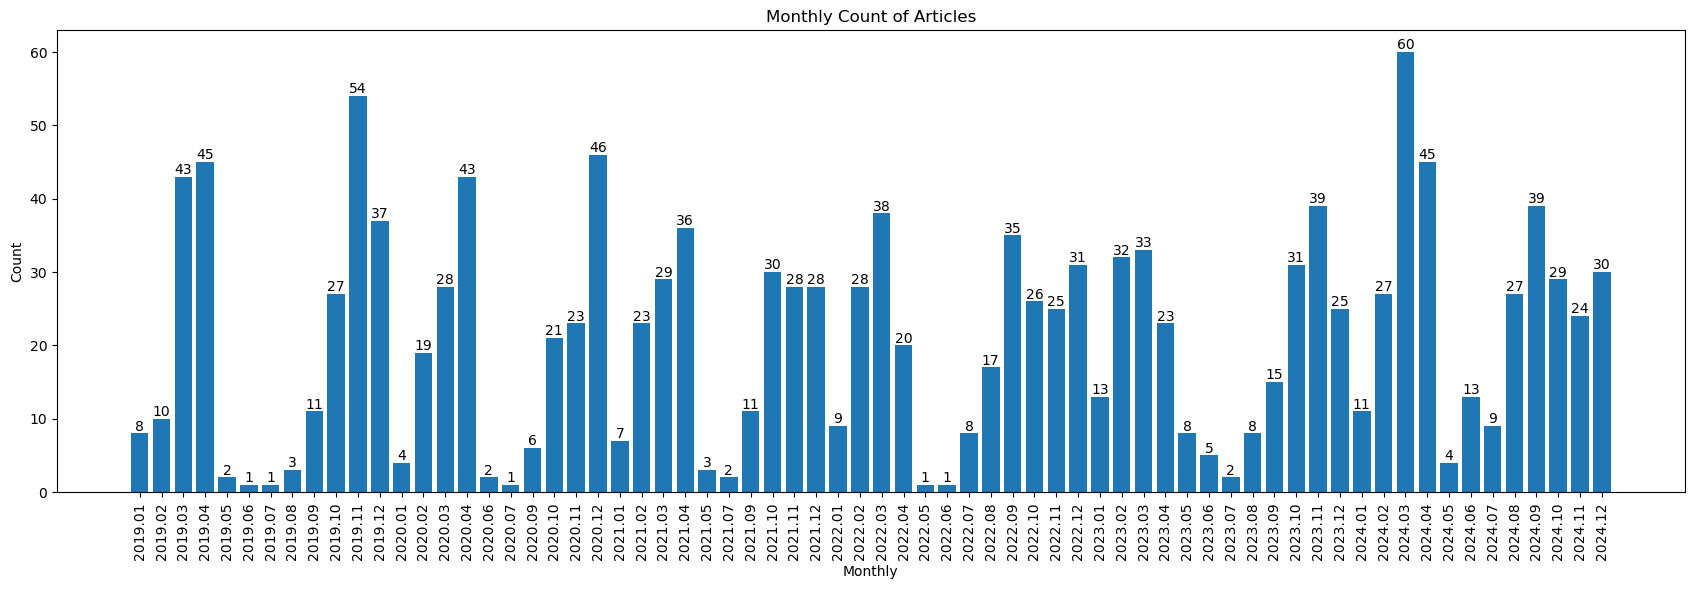

In [5]:
year_month_counts = VP_SD['year-month'].value_counts().sort_index()

# Plot the bar chart for yearly counts
plt.figure(figsize=(21, 6))
bars = plt.bar(year_month_counts.index.astype(str), year_month_counts.values)

# Add the count values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center the text horizontally
        height,  # Position the text just above the bar
        str(height),  # Display the height as text
        ha='center', va='bottom', fontsize=10  # Alignment and font size
    )

plt.xlabel('Monthly')
plt.ylabel('Count')
plt.title('Monthly Count of Articles')
plt.xticks(rotation=90)
plt.show()

<div style="
    background-color: #fffbea;
    border: 1px solid #d6d6d6;
    border-left: 20px solid #ffcc00;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> A basic investigation around the trend of low articles in May-Aug every year was done. A probable reason for the gap in articles could be because the dataset focuses on tech companies and tech market primarily.</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Major tech companies typically schedule their biggest product launches and events in fall (Sept-Oct) and spring (Feb-March)</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Silicon Valley and other tech hubs often have an unofficial slowdown during summer months</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span>Less product launches and corporate announcements during this period.</li>
        <li> Sources: https://www.nytimes.com/wirecutter/blog/understanding-the-product-cycle-when-to-expect-new-releases-updates-deals-and-discounts/</li>
    </ul>
</div>

In [6]:
import ast  # To safely evaluate JSON-like strings

# Function to extract 'main' and 'print_headline' from the 'headlines' column
def extract_values(json_str):
    try:
        # Convert the JSON-like string to a dictionary
        json_dict = ast.literal_eval(json_str)
        # Extract 'main' and 'print_headline' values
        return pd.Series([json_dict.get('main'), json_dict.get('print_headline')])
    except Exception as e:
        # Handle parsing errors
        return pd.Series([None, None])

# Apply the function to all rows in the 'headlines' column
VP_SD[['main', 'print_headline']] = VP_SD['headline'].apply(extract_values)

# Display the resulting DataFrame
display(VP_SD)

,abstract,lead_paragraph,headline,keywords,pub_date,news_desk,section_name,type_of_material,subsection_name,day,time,year,year-month,main,print_headline
0,Apple and Qualcomm said they had agreed to dis...,"SAN FRANCISCO -For the past two years, Apple a...",{'main': 'Apple and Qualcomm Settle All Disput...,"[{'name': 'organizations', 'value': 'Apple Inc...",2019-04-16 19:20:36+00:00,Business,Technology,News,NaN,2019-04-16,19:20:36,2019,2019.04,Apple and Qualcomm Settle All Disputes Worldwide,"Qualcomm Vs. Apple Is Settled, Worldwide"
1,"Last year, with much fanfare, the tech giant u...",SAN FRANCISCO -They all tell a similar story: ...,{'main': 'Apple Cracks Down on Apps That Fight...,"[{'name': 'subject', 'value': 'Mobile Applicat...",2019-04-27 09:00:09+00:00,Business,Technology,News,NaN,2019-04-27,09:00:09,2019,2019.04,Apple Cracks Down on Apps That Fight iPhone Ad...,Purging Rivals
2,The company said it would add to its record re...,SAN FRANCISCO -Shortly after Apple used a new ...,{'main': 'Apple's Plan to Buy $75 Billion of I...,"[{'name': 'organizations', 'value': 'Apple Inc...",2019-04-30 23:18:37+00:00,Business,Technology,News,NaN,2019-04-30,23:18:37,2019,2019.04,None,None
3,After two years of bitter patent battles acros...,Good Wednesday. (Want this by email? Sign up h...,{'main': 'DealBook Briefing: Apple and Qualcom...,"[{'name': 'organizations', 'value': 'Apple Inc...",2019-04-17 10:30:28+00:00,Business,Business Day,News,DealBook,2019-04-17,10:30:28,2019,2019.04,DealBook Briefing: Apple and Qualcomm Kiss and...,None
4,"Plus, The National Enquirer is for sale, and E...","You're a busy person, so here's your quick and...",{'main': 'The Week in Business: Uber's Bumpy R...,"[{'name': 'subject', 'value': 'Car Services an...",2019-04-13 18:03:14+00:00,SundayBusiness,Business Day,News,NaN,2019-04-13,18:03:14,2019,2019.04,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,Did you follow the news this week? Take our qu...,Did you follow the news this week? Take our qu...,"{'main': 'The New York Times News Quiz, June 2...","[{'name': 'subject', 'value': 'Content Type: Q...",2024-06-21 09:04:12+00:00,Briefing,Briefing,Interactive Feature,NaN,2024-06-21,09:04:12,2024,2024.06,"The New York Times News Quiz, June 21, 2024",None
1419,Elon Musk and Vivek Ramaswamy have unveiled th...,Donald Trump picked Elon Musk and the financie...,"{'main': 'Dissecting the DOGE Playbook', 'kick...","[{'name': 'subject', 'value': 'internal-storyl...",2024-11-21 12:53:37+00:00,Business,Business Day,News,DealBook,2024-11-21,12:53:37,2024,2024.11,Dissecting the DOGE Playbook,None
1420,"The prospects for future commerce, and peace, ...","If you follow the news, you know that tensions...",{'main': 'The Business Ties That Bind the U.S....,"[{'name': 'subject', 'value': 'United States I...",2024-05-24 13:00:14+00:00,SundayBusiness,Business Day,News,NaN,2024-05-24,13:00:14,2024,2024.05,The Business Ties That Bind the U.S. and China...,"Ties Binding the U.S. and China Are Strong, bu..."
1421,The S&P 500 had its worst day since April. The...,Shares of some of the world's biggest chipmake...,"{'main': 'Chip Shares Tumble, Dragging Wall St...","[{'name': 'subject', 'value': 'International R...",2024-07-17 19:09:53+00:00,Business,Business Day,News,NaN,2024-07-17,19:09:53,2024,2024.07,"Chip Shares Tumble, Dragging Wall Street to It...",None


<div style="
    background-color: #fffbea;
    border: 1px solid #d6d6d6;
    border-left: 20px solid #ffcc00;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Extracting organizations, subjects and persons from Keywords column to segregate articles and classify them into Company or Macro topic.</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> A rules-based Classification logic was applied based on a manual analysis of the unique values available for organizations and subjects. </li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Example: Apple Inc, Apple TV, Apple TV Plus were unique organization values - the rules based logic would categorize them all under Apple.</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Similarly - multiple relevant and important topics under organizations and subjects were identified to get a classification under 3 possible Macro topics: Tech-AI, Tech-Macro, Market-Macro.</li>
    </ul>
</div>

In [7]:
def extract_top_values(content_list, category, top_n=3):
    filtered = [item['value'] for item in sorted(content_list, key=lambda x: x['rank']) if item['name'] == category]
    return filtered[:top_n] if filtered else None

# Extracting values
VP_SD['organizations'] = VP_SD['keywords'].apply(lambda x: extract_top_values(ast.literal_eval(x), 'organizations'))
VP_SD['subjects'] = VP_SD['keywords'].apply(lambda x: extract_top_values(ast.literal_eval(x), 'subject'))
VP_SD['persons'] = VP_SD['keywords'].apply(lambda x: extract_top_values(ast.literal_eval(x), 'persons'))

# Handle Nulls
VP_SD['organizations'] = VP_SD['organizations'].apply(lambda x: x if x is not None else [None] * 3)
VP_SD['subjects'] = VP_SD['subjects'].apply(lambda x: x if x is not None else [None] * 3)
VP_SD['persons'] = VP_SD['persons'].apply(lambda x: x if x is not None else [None] * 3)

# Breakdown to separate values
VP_SD[['org_1', 'org_2', 'org_3']] = pd.DataFrame(VP_SD['organizations'].tolist(), index=VP_SD.index)
VP_SD[['subject_1', 'subject_2', 'subject_3']] = pd.DataFrame(VP_SD['subjects'].tolist(), index=VP_SD.index)
VP_SD[['person_1', 'person_2', 'person_3']] = pd.DataFrame(VP_SD['persons'].tolist(), index=VP_SD.index)

display(VP_SD)

,abstract,lead_paragraph,headline,keywords,pub_date,news_desk,section_name,type_of_material,subsection_name,day,...,persons,org_1,org_2,org_3,subject_1,subject_2,subject_3,person_1,person_2,person_3
0,Apple and Qualcomm said they had agreed to dis...,"SAN FRANCISCO -For the past two years, Apple a...",{'main': 'Apple and Qualcomm Settle All Disput...,"[{'name': 'organizations', 'value': 'Apple Inc...",2019-04-16 19:20:36+00:00,Business,Technology,News,NaN,2019-04-16,...,"[None, None, None]",Apple Inc,Qualcomm Inc,None,Suits and Litigation (Civil),Computer Chips,Antitrust Laws and Competition Issues,None,None,None
1,"Last year, with much fanfare, the tech giant u...",SAN FRANCISCO -They all tell a similar story: ...,{'main': 'Apple Cracks Down on Apps That Fight...,"[{'name': 'subject', 'value': 'Mobile Applicat...",2019-04-27 09:00:09+00:00,Business,Technology,News,NaN,2019-04-27,...,"[None, None, None]",Apple Inc,Mobicip.com,None,Mobile Applications,Smartphones,iPhone,None,None,None
2,The company said it would add to its record re...,SAN FRANCISCO -Shortly after Apple used a new ...,{'main': 'Apple's Plan to Buy $75 Billion of I...,"[{'name': 'organizations', 'value': 'Apple Inc...",2019-04-30 23:18:37+00:00,Business,Technology,News,NaN,2019-04-30,...,"[Cook, Timothy D]",Apple Inc,None,None,Stock Buybacks,Corporate Taxes,Stocks and Bonds,"Cook, Timothy D",None,None
3,After two years of bitter patent battles acros...,Good Wednesday. (Want this by email? Sign up h...,{'main': 'DealBook Briefing: Apple and Qualcom...,"[{'name': 'organizations', 'value': 'Apple Inc...",2019-04-17 10:30:28+00:00,Business,Business Day,News,DealBook,2019-04-17,...,"[None, None, None]",Apple Inc,Qualcomm Inc,Intel Corporation,None,None,None,None,None,None
4,"Plus, The National Enquirer is for sale, and E...","You're a busy person, so here's your quick and...",{'main': 'The Week in Business: Uber's Bumpy R...,"[{'name': 'subject', 'value': 'Car Services an...",2019-04-13 18:03:14+00:00,SundayBusiness,Business Day,News,NaN,2019-04-13,...,"[Bezos, Jeffrey P, Cook, Timothy D, Mollenkopf...",Apple Inc,Boeing Company,European Union,Car Services and Livery Cabs,Initial Public Offerings,Regulation and Deregulation of Industry,"Bezos, Jeffrey P","Cook, Timothy D","Mollenkopf, Steven M"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,Did you follow the news this week? Take our qu...,Did you follow the news this week? Take our qu...,"{'main': 'The New York Times News Quiz, June 2...","[{'name': 'subject', 'value': 'Content Type: Q...",2024-06-21 09:04:12+00:00,Briefing,Briefing,Interactive Feature,NaN,2024-06-21,...,"[None, None, None]",None,None,None,Content Type: Quiz,internal-truncator,None,None,None,None
1419,Elon Musk and Vivek Ramaswamy have unveiled th...,Donald Trump picked Elon Musk and the financie...,"{'main': 'Dissecting the DOGE Playbook', 'kick...","[{'name': 'subject', 'value': 'internal-storyl...",2024-11-21 12:53:37+00:00,Business,Business Day,News,DealBook,2024-11-21,...,"[Bezos, Jeffrey P, Musk, Elon, Ramaswamy, Vive...",Corp for Public Broadcasting,Government Efficiency Department (US),None,internal-storyline-no,Presidential Election of 2024,Layoffs and Job Reductions,"Bezos, Jeffrey P","Musk, Elon","Ramaswamy, Vivek (1985- )"
1420,"The prospects for future commerce, and peace, ...","If you follow the news, you know that tensions...",{'main': 'The Business Ties That Bind the U.S....,"[{'name': 'subject', 'value': 'United States I...",2024-05-24 13:00:14+00:00,SundayBusiness,Business Day,News,NaN,2024-05-24,...,"[None, None, None]",None,None,None,United States International Relations,International Trade and World Market,United States Economy,None,None,None
1421,The S&P 500 had its worst day since April. The...,Shares of some of the world's biggest chipmake...,"{'main': 'Chip Shares Tumble, Dragging Wall St...","[{'name': 'subject', 'value': 'International R...",2024-07-17 19:09:53+00:00,Business,Bu

In [8]:
def categorize_company(row):
    apple_keywords = ['Apple Inc', 'Apple TV', 'Apple Music', 'Apple Pay', 'Apple TV Plus', 'Foxconn Technology']
    google_keywords = ['Google Inc', 'Alphabet Inc', 'Youtube.com', 'YouTube.com', 'Google', 'Fitbit', 'Google Maps', 'Google News', 'Google Play', 'Google Stadia', 'Google Street View']
    nvidia_keywords = ['NVIDIA Corporation']
    
    companies = set()
    
    for col in ['org_1', 'org_2', 'org_3']:
        if any(keyword in str(row[col]) for keyword in apple_keywords):
            companies.add('Apple')
        if any(keyword in str(row[col]) for keyword in google_keywords):
            companies.add('Google')
        if any(keyword in str(row[col]) for keyword in nvidia_keywords):
            companies.add('Nvidia')
    
    if not companies:
        return 'Other'
    return ' and '.join(sorted(companies))


def categorize_macro(row):
    tech_ai_keywords = ['Artificial Intelligence','ChatGPT','Center for AI Safety (CAIS)','Character.AI','Inflection AI Inc','Midjourney Inc','Mistral AI SAS','OpenAI Labs','Perplexity AI Inc',
                        'Runway AI','Stability AI Ltd']
    tech_macro_keywords = ['Cloud Computing','Computer Chips','Computer Network Outages','Cyberattacks and Hackers','Cyberwarfare and Defense','Data Centers','Data Storage',
                           'Driverless and Semiautonomous Vehicles','Facial Recognition Software', 'Quantum Computing','Blockchain (Technology)','CrowdStrike Inc','Intel Corporation',
                           'Silicon Valley Bank','SOFTBANK Corporation','Tesla Motors Inc','The Blackstone Group','Amazon.com Inc','Microsoft Corp','Computers and the Internet'
                           ]
    market_macro_keywords = ['Coronavirus (2019-nCoV)','Coronavirus Return to Office','Corporate Taxes','Economic Conditions and Trends','Elections','Executive Compensation',
                             'Federal Taxes (US)','Israel-Gaza War (2023- )','Presidential Election of 2020','Presidential Election of 2024','Pro-Palestinian Campus Protests (2023- )',
                             'Russian Invasion of Ukraine (2022)', 'Stock Buybacks','Stocks and Bonds','Storming of the US Capitol (Jan','Trump-Ukraine Whistle-blower Complaint and Impeachment Inquiry',
                             'United States Economy','United States International Relations','United States Politics and Government','Taxation','Coronavirus Reopenings','Epidemics',
                             'Masks','Quarantines','Vaccination and Immunization','Tax Shelters','Defense Production Act', 'Midterm Elections (2022)','Gross Domestic Product','Coronavirus Aid',
                             'Presidential Transition (US)','Attack (March 2019)','Dow Jones Stock Average','Federal Aid (US)','Misconduct and Shootings','First Amendment (US Constitution)',
                             'Assassinations and Attempted Assassinations','Absentee Voting','Visas','Energy and Power','Antitrust Laws and Competition Issues','Standard & Poors 500-Stock Index','Justice Department',
                             'Treasury Department','Centers for Disease Control and Prevention','Treasury Department','Centers for Disease Control and Prevention','Border Patrol (US)',
                             'Immigration and Customs Enforcement (US)','Commerce Department','State Department',"Standard & Poor's 500-Stock Index",]
    
    companies = set()
    
    for col in ['subject_1', 'subject_2', 'subject_3','org_1', 'org_2', 'org_3']:
        if any(keyword in str(row[col]) for keyword in tech_ai_keywords):
            companies.add('Tech-AI')
        if any(keyword in str(row[col]) for keyword in tech_macro_keywords):
            companies.add('Tech-Macro')
        if any(keyword in str(row[col]) for keyword in market_macro_keywords):
            companies.add('Market-Macro')
    
    if not companies:
        return 'Other'
    return ' and '.join(sorted(companies))


VP_SD['Company'] = VP_SD.apply(categorize_company, axis=1)
VP_SD['Market'] = VP_SD.apply(categorize_macro, axis=1)


# Display the updated DataFrame
display(VP_SD[['org_1', 'org_2', 'org_3', 'Company','Market']].head(50))

,org_1,org_2,org_3,Company,Market
0,Apple Inc,Qualcomm Inc,None,Apple,Market-Macro and Tech-Macro
1,Apple Inc,Mobicip.com,None,Apple,Other
2,Apple Inc,None,None,Apple,Market-Macro
3,Apple Inc,Qualcomm Inc,Intel Corporation,Apple,Tech-Macro
4,Apple Inc,Boeing Company,European Union,Apple,Other
5,Apple Inc,Qualcomm Inc,Federal Trade Commission,Apple,Tech-Macro
6,Apple Inc,None,None,Apple,Tech-Macro
7,Apple Inc,None,None,Apple,Other
8,Apple Inc,Conde Nast Publications Inc,Dow Jones & Co,Apple,Other
9,Spotify,Apple Music,Gimlet Media,Apple,Other


<div style="
    background-color: #e8f8e8;
    border: 1px solid #efffe8;
    border-left: 20px solid #7dbf7d;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> A pipeline flow of adding company and macro categories (a rules based classification logic) was created based on customer's feedback on the initial feedback session.</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> While this will work for any new headlines in the source file - the keywords_df's datasource sentiment_keywords.csv needs to be updated with more classification mapping (keywords from Org,Subjects).</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span>This flow can be customized easily with the changes in the Keywords file and is maintainable. </li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> A robust version of the keywords datasource could be obtained with more data from the same source or directly from the data-dictionary of NYTimes if possible.  </li>
    </ul>
</div>

In [9]:
#Pipeline flow
#keywords_df = pd.read_csv('sentiment_keywords.csv')
#keywords_df = keywords_df.fillna('').astype(str)

# Categorize function to get Company and Macro values
#def categorize(row, keywords_df, columns, value_column):
#    categories = set()
    
#    for col in columns:
        # Convert row value to string and handle NaN/None
#        row_value = str(row[col]) if pd.notna(row[col]) else ''
        
#        for keyword, value in zip(keywords_df['keyword'], keywords_df[value_column]):
#            # Skip empty keywords or values
#            if keyword and value and keyword in row_value:
#                categories.add(value)
    
#    return ' and '.join(sorted(categories)) if categories else 'Other'

# Apply the modified function
#VP_SD['Company'] = VP_SD.apply(lambda row: categorize(row, keywords_df, ['org_1', 'org_2', 'org_3'], 'Company_value'), axis=1)
#VP_SD['Market'] = VP_SD.apply(lambda row: categorize(row, keywords_df, ['subject_1', 'subject_2', 'subject_3', 'org_1', 'org_2', 'org_3'], 'Macro_value'), axis=1)

# Display the updated DataFrame
#display(VP_SD[['org_1', 'org_2', 'org_3', 'Company', 'Market']].head(50))

In [10]:
# Keep necessary columns. Drop unnecessary columns.
VP_SD_Cropped = VP_SD[['abstract','lead_paragraph', 'day','time','main','print_headline','Company','Market']]

# View DataFrame.
VP_SD_Cropped.head()

,abstract,lead_paragraph,day,time,main,print_headline,Company,Market
0,Apple and Qualcomm said they had agreed to dis...,"SAN FRANCISCO -For the past two years, Apple a...",2019-04-16,19:20:36,Apple and Qualcomm Settle All Disputes Worldwide,"Qualcomm Vs. Apple Is Settled, Worldwide",Apple,Market-Macro and Tech-Macro
1,"Last year, with much fanfare, the tech giant u...",SAN FRANCISCO -They all tell a similar story: ...,2019-04-27,09:00:09,Apple Cracks Down on Apps That Fight iPhone Ad...,Purging Rivals,Apple,Other
2,The company said it would add to its record re...,SAN FRANCISCO -Shortly after Apple used a new ...,2019-04-30,23:18:37,None,None,Apple,Market-Macro
3,After two years of bitter patent battles acros...,Good Wednesday. (Want this by email? Sign up h...,2019-04-17,10:30:28,DealBook Briefing: Apple and Qualcomm Kiss and...,None,Apple,Tech-Macro
4,"Plus, The National Enquirer is for sale, and E...","You're a busy person, so here's your quick and...",2019-04-13,18:03:14,None,None,Apple,Other


In [11]:
VP_SD_Cropped.isna().sum()

abstract            0
lead_paragraph      2
day                 0
time                0
main              552
print_headline    875
Company             0
Market              0
dtype: int64

<div style="
    background-color: #fffbea;
    border: 1px solid #d6d6d6;
    border-left: 20px solid #ffcc00;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Print headline has the most empty rows.</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Abstract and Lead Paragraph have very less empty rows.</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Main has 33% empty rows.</li>
    </ul>
</div>

In [12]:
# Convert specific columns to lowercase
columns_to_lowercase = ['abstract','lead_paragraph','main','print_headline']
VP_SD_Cropped[columns_to_lowercase] = VP_SD_Cropped[columns_to_lowercase].apply(lambda col: col.str.lower())
VP_SD_Cropped.head()

,abstract,lead_paragraph,day,time,main,print_headline,Company,Market
0,apple and qualcomm said they had agreed to dis...,"san francisco -for the past two years, apple a...",2019-04-16,19:20:36,apple and qualcomm settle all disputes worldwide,"qualcomm vs. apple is settled, worldwide",Apple,Market-Macro and Tech-Macro
1,"last year, with much fanfare, the tech giant u...",san francisco -they all tell a similar story: ...,2019-04-27,09:00:09,apple cracks down on apps that fight iphone ad...,purging rivals,Apple,Other
2,the company said it would add to its record re...,san francisco -shortly after apple used a new ...,2019-04-30,23:18:37,None,None,Apple,Market-Macro
3,after two years of bitter patent battles acros...,good wednesday. (want this by email? sign up h...,2019-04-17,10:30:28,dealbook briefing: apple and qualcomm kiss and...,None,Apple,Tech-Macro
4,"plus, the national enquirer is for sale, and e...","you're a busy person, so here's your quick and...",2019-04-13,18:03:14,None,None,Apple,Other


In [13]:
# Remove punctuation from specific columns
columns_to_lowercase = ['abstract','lead_paragraph','main','print_headline']
VP_SD_Cropped[columns_to_lowercase] = VP_SD_Cropped[columns_to_lowercase].apply(
    lambda col: col.str.replace('[^\w\s]', '', regex=True)
)
# View the first 5 rows

VP_SD_Cropped.head()

,abstract,lead_paragraph,day,time,main,print_headline,Company,Market
0,apple and qualcomm said they had agreed to dis...,san francisco for the past two years apple and...,2019-04-16,19:20:36,apple and qualcomm settle all disputes worldwide,qualcomm vs apple is settled worldwide,Apple,Market-Macro and Tech-Macro
1,last year with much fanfare the tech giant unv...,san francisco they all tell a similar story th...,2019-04-27,09:00:09,apple cracks down on apps that fight iphone ad...,purging rivals,Apple,Other
2,the company said it would add to its record re...,san francisco shortly after apple used a new t...,2019-04-30,23:18:37,None,None,Apple,Market-Macro
3,after two years of bitter patent battles acros...,good wednesday want this by email sign up here,2019-04-17,10:30:28,dealbook briefing apple and qualcomm kiss and ...,None,Apple,Tech-Macro
4,plus the national enquirer is for sale and elo...,youre a busy person so heres your quick and br...,2019-04-13,18:03:14,None,None,Apple,Other


### Data Prep for Event Analysis and Modeling

<div style="
    background-color: #e8f8e8;
    border: 1px solid #efffe8;
    border-left: 20px solid #7dbf7d;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li style="margin-bottom: 7px;font-weight: bold">
        Copying articles dataset that has been cleaned and classified into Company and Market segments based on Keywords metadata column for Sentiment Analysis
    </ul>
</div>

In [14]:
Sentiment = VP_SD_Cropped.copy()
Sentiment.head()

,abstract,lead_paragraph,day,time,main,print_headline,Company,Market
0,apple and qualcomm said they had agreed to dis...,san francisco for the past two years apple and...,2019-04-16,19:20:36,apple and qualcomm settle all disputes worldwide,qualcomm vs apple is settled worldwide,Apple,Market-Macro and Tech-Macro
1,last year with much fanfare the tech giant unv...,san francisco they all tell a similar story th...,2019-04-27,09:00:09,apple cracks down on apps that fight iphone ad...,purging rivals,Apple,Other
2,the company said it would add to its record re...,san francisco shortly after apple used a new t...,2019-04-30,23:18:37,None,None,Apple,Market-Macro
3,after two years of bitter patent battles acros...,good wednesday want this by email sign up here,2019-04-17,10:30:28,dealbook briefing apple and qualcomm kiss and ...,None,Apple,Tech-Macro
4,plus the national enquirer is for sale and elo...,youre a busy person so heres your quick and br...,2019-04-13,18:03:14,None,None,Apple,Other


In [15]:
print(Sentiment.columns)

Index(['abstract', 'lead_paragraph', 'day', 'time', 'main', 'print_headline',
       'Company', 'Market'],
      dtype='object')


<div style="
    background-color: #e8f8e8;
    border: 1px solid #efffe8;
    border-left: 20px solid #7dbf7d;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li style="margin-bottom: 7px;font-weight: bold">
        Adding Adjusted-day : a calculated date column based on publishing time to attribute sentiment score to the appropriate trading day
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> If article was published post trading hours (3PM), then assign next day as adjusted date</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Else, published date will be the adjusted date</li>
    </ul>
</div>

In [16]:
# Convert 'day' column to datetime
Sentiment['day'] = pd.to_datetime(Sentiment['day'], errors='coerce')

# Clean the 'time' column by removing invalid characters and spaces
Sentiment['time'] = Sentiment['time'].astype(str).str.strip()

# Attempt to convert 'time' column, handling errors
def parse_time(value):
    try:
        return pd.to_datetime(value, format='%H:%M:%S', errors='coerce').time()
    except ValueError:
        return None  # Assign None to invalid entries

Sentiment['time'] = Sentiment['time'].apply(parse_time)

# Identify problematic values (NaT or None indicate invalid formats)
invalid_times = Sentiment[Sentiment['time'].isna()]
if not invalid_times.empty:
    print("Warning: Some time values are invalid. Review these entries:\n", invalid_times)

# Define the threshold time (3:00 PM)
threshold_time = pd.to_datetime('15:00:00', format='%H:%M:%S').time()

# Correctly apply timedelta by converting boolean to integer (1 day shift for times > 3 PM)
Sentiment['adjusted_day'] = Sentiment['day'] + pd.to_timedelta((Sentiment['time'] > threshold_time).astype(int), unit='d')
Sentiment.head()

,abstract,lead_paragraph,day,time,main,print_headline,Company,Market,adjusted_day
0,apple and qualcomm said they had agreed to dis...,san francisco for the past two years apple and...,2019-04-16,19:20:36,apple and qualcomm settle all disputes worldwide,qualcomm vs apple is settled worldwide,Apple,Market-Macro and Tech-Macro,2019-04-17
1,last year with much fanfare the tech giant unv...,san francisco they all tell a similar story th...,2019-04-27,09:00:09,apple cracks down on apps that fight iphone ad...,purging rivals,Apple,Other,2019-04-27
2,the company said it would add to its record re...,san francisco shortly after apple used a new t...,2019-04-30,23:18:37,None,None,Apple,Market-Macro,2019-05-01
3,after two years of bitter patent battles acros...,good wednesday want this by email sign up here,2019-04-17,10:30:28,dealbook briefing apple and qualcomm kiss and ...,None,Apple,Tech-Macro,2019-04-17
4,plus the national enquirer is for sale and elo...,youre a busy person so heres your quick and br...,2019-04-13,18:03:14,None,None,Apple,Other,2019-04-14


In [17]:
column_order = ['day','time','adjusted_day','Company','Market','abstract','lead_paragraph','main','print_headline']
Sentiment = Sentiment[column_order]
# Convert columns to strings to handle NaN values
Sentiment['abstract'] = Sentiment['abstract'].astype(str)
Sentiment['lead_paragraph'] = Sentiment['lead_paragraph'].astype(str)
Sentiment['main'] = Sentiment['main'].astype(str)
Sentiment.head()

,day,time,adjusted_day,Company,Market,abstract,lead_paragraph,main,print_headline
0,2019-04-16,19:20:36,2019-04-17,Apple,Market-Macro and Tech-Macro,apple and qualcomm said they had agreed to dis...,san francisco for the past two years apple and...,apple and qualcomm settle all disputes worldwide,qualcomm vs apple is settled worldwide
1,2019-04-27,09:00:09,2019-04-27,Apple,Other,last year with much fanfare the tech giant unv...,san francisco they all tell a similar story th...,apple cracks down on apps that fight iphone ad...,purging rivals
2,2019-04-30,23:18:37,2019-05-01,Apple,Market-Macro,the company said it would add to its record re...,san francisco shortly after apple used a new t...,None,None
3,2019-04-17,10:30:28,2019-04-17,Apple,Tech-Macro,after two years of bitter patent battles acros...,good wednesday want this by email sign up here,dealbook briefing apple and qualcomm kiss and ...,None
4,2019-04-13,18:03:14,2019-04-14,Apple,Other,plus the national enquirer is for sale and elo...,youre a busy person so heres your quick and br...,None,None


In [18]:
Sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423 entries, 0 to 1422
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   day             1423 non-null   datetime64[ns]
 1   time            1423 non-null   object        
 2   adjusted_day    1423 non-null   datetime64[ns]
 3   Company         1423 non-null   object        
 4   Market          1423 non-null   object        
 5   abstract        1423 non-null   object        
 6   lead_paragraph  1423 non-null   object        
 7   main            1423 non-null   object        
 8   print_headline  548 non-null    object        
dtypes: datetime64[ns](2), object(7)
memory usage: 100.2+ KB


### Sentiment Analysis

<div style="
    background-color: #fffbea;
    border: 1px solid #d6d6d6;
    border-left: 20px solid #ffcc00;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li style="margin-bottom: 1px;">
         <b>Applying Textblob across different columns and obtaining a weighted textblob sentiment based on manual sample-set review.</b></li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Main and Lead Paragraph have been verified to be displayed in Online links</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Abstract is assumed to be available in RSS Feeds or app-based popups</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Print headline is not considered as this would be the headline on next day's printed NYTimes newspaper - publishing date could be different which we cannot ascertain</li>
    </ul>
</div>

In [19]:
#Applying Textblob Sentiment Analysis for Polarity and Subjectivity
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

Sentiment['abs_polarity_Tx'] = Sentiment['abstract'].apply(generate_polarity)
Sentiment['abs_subjectivity_Tx'] = Sentiment['abstract'].apply(generate_subjectivity)

Sentiment['lp_polarity_Tx'] = Sentiment['lead_paragraph'].apply(generate_polarity)
Sentiment['lp_subjectivity_Tx'] = Sentiment['lead_paragraph'].apply(generate_subjectivity)

Sentiment['main_polarity_Tx'] = Sentiment['main'].apply(generate_polarity)
Sentiment['main_subjectivity_Tx'] = Sentiment['main'].apply(generate_subjectivity)

Sentiment.head(5)

,day,time,adjusted_day,Company,Market,abstract,lead_paragraph,main,print_headline,abs_polarity_Tx,abs_subjectivity_Tx,lp_polarity_Tx,lp_subjectivity_Tx,main_polarity_Tx,main_subjectivity_Tx
0,2019-04-16,19:20:36,2019-04-17,Apple,Market-Macro and Tech-Macro,apple and qualcomm said they had agreed to dis...,san francisco for the past two years apple and...,apple and qualcomm settle all disputes worldwide,qualcomm vs apple is settled worldwide,0.000000,0.00,-0.025000,0.225000,0.000000,0.000000
1,2019-04-27,09:00:09,2019-04-27,Apple,Other,last year with much fanfare the tech giant unv...,san francisco they all tell a similar story th...,apple cracks down on apps that fight iphone ad...,purging rivals,0.160000,0.52,-0.037500,0.625000,-0.155556,0.288889
2,2019-04-30,23:18:37,2019-05-01,Apple,Market-Macro,the company said it would add to its record re...,san francisco shortly after apple used a new t...,None,None,0.166667,0.50,0.106061,0.220202,0.000000,0.000000
3,2019-04-17,10:30:28,2019-04-17,Apple,Tech-Macro,after two years of bitter patent battles acros...,good wednesday want this by email sign up here,dealbook briefing apple and qualcomm kiss and ...,None,-0.100000,0.50,0.700000,0.600000,0.000000,0.000000
4,2019-04-13,18:03:14,2019-04-14,Apple,Other,plus the national enquirer is for sale and elo...,youre a busy person so heres your quick and br...,None,None,0.250000,0.80,0.358333,0.550000,0.000000,0.000000


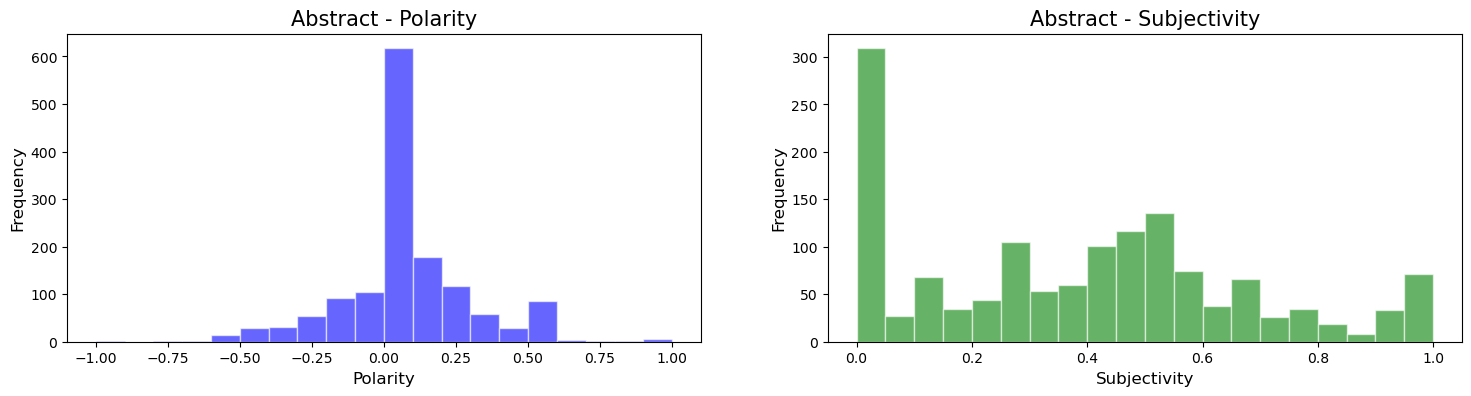

In [20]:
plt.figure(figsize=(18,4))

plt.subplot(1, 2, 1)
plt.hist(Sentiment['abs_polarity_Tx'], bins=20, color='blue', edgecolor='white', alpha=0.6)
plt.xlabel('Polarity', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Abstract - Polarity', fontsize = 15)

plt.subplot(1, 2, 2)
plt.hist(Sentiment['abs_subjectivity_Tx'], bins=20, color='green', edgecolor='white', alpha=0.6)
plt.xlabel('Subjectivity', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Abstract - Subjectivity', fontsize = 15)
plt.show()

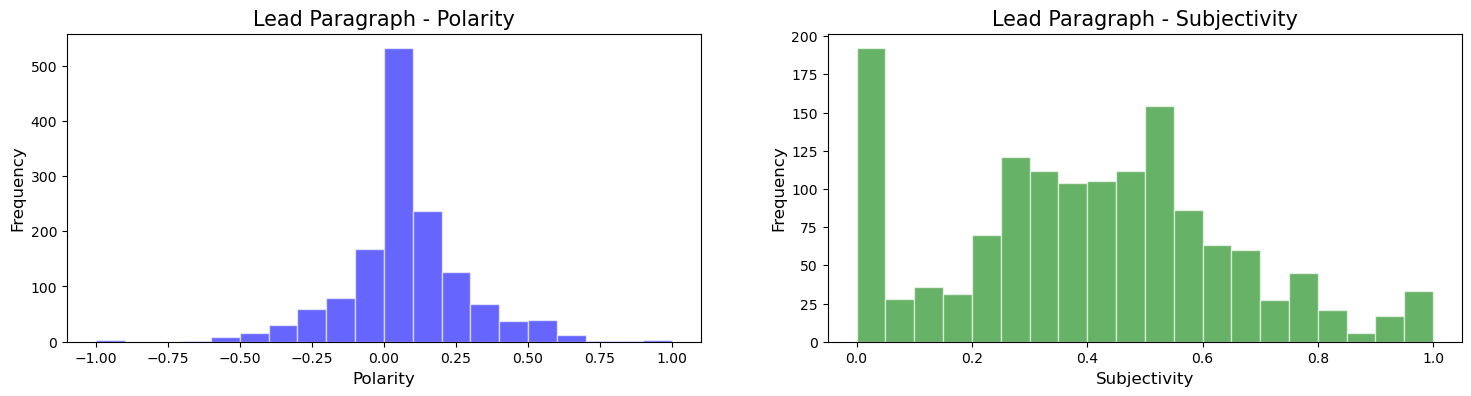

In [21]:
plt.figure(figsize=(18, 4))

plt.subplot(1, 2, 1)
plt.hist(Sentiment['lp_polarity_Tx'], bins=20, color='blue', edgecolor='white', alpha=0.6)
plt.xlabel('Polarity', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Lead Paragraph - Polarity', fontsize = 15)

plt.subplot(1, 2, 2)
plt.hist(Sentiment['lp_subjectivity_Tx'], bins=20, color='green', edgecolor='white', alpha=0.6)
plt.xlabel('Subjectivity', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Lead Paragraph - Subjectivity', fontsize = 15)
plt.show()

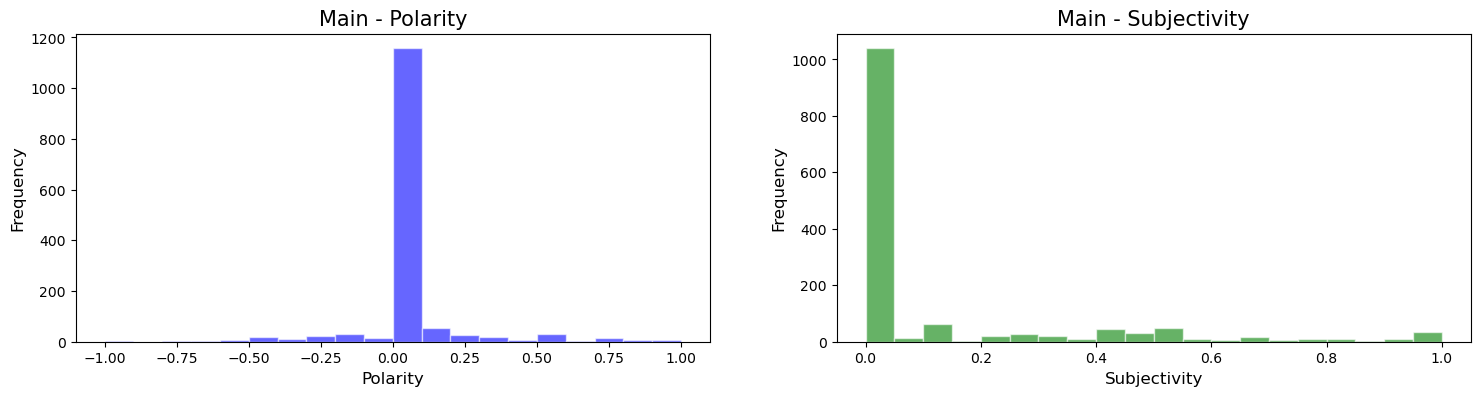

In [22]:
plt.figure(figsize=(18, 4))

plt.subplot(1, 2, 1)
plt.hist(Sentiment['main_polarity_Tx'], bins=20, color='blue', edgecolor='white', alpha=0.6)
plt.xlabel('Polarity', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Main - Polarity', fontsize = 15)

plt.subplot(1, 2, 2)
plt.hist(Sentiment['main_subjectivity_Tx'], bins=20, color='green', edgecolor='white', alpha=0.6)
plt.xlabel('Subjectivity', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Main - Subjectivity', fontsize = 15)
plt.show()

<div style="
    background-color: #e8f8e8;
    border: 1px solid #efffe8;
    border-left: 20px solid #7dbf7d;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Abstract & Lead Paragraph have similar polarity and subjectivity distribution, while Main have mostly 0s.
        </li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Abstract and Lead Paragraph also have 0 polarity and subjectivity as the highest frequency (Mostly Neutral) - which is agreeable as these are news articles reporting objective facts rep</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> A weighted TextBlob Polarity of Abstract and Lead Paragraph could be considered as the TextBlob sentiment score.
        </li>              
    </ul>
</div>

Text(0.5, 1.0, 'Weighted TextBlob Polarity')

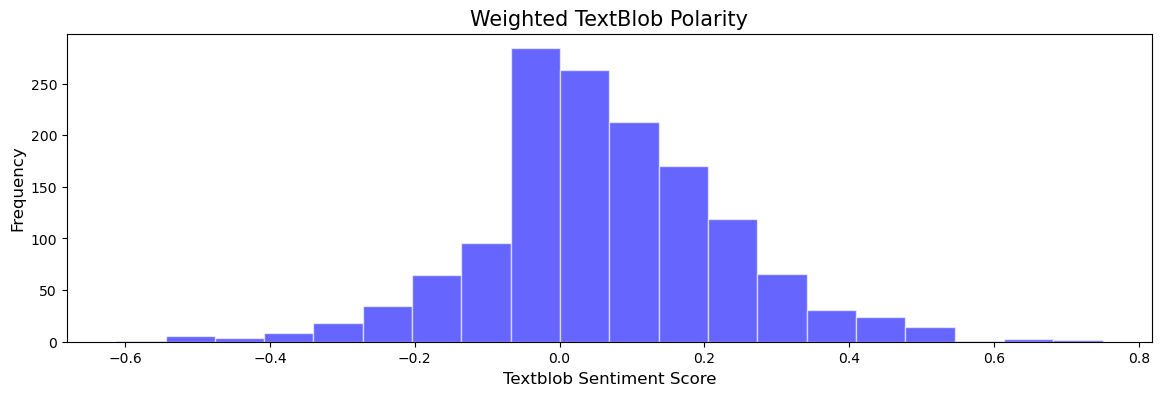

In [23]:
# Define weights
weights = {'lp_polarity_Tx': 0.5,'abs_polarity_Tx': 0.50}

# Calculate weighted average score
Sentiment['TB_Wt_Avg_Score'] = (
    (Sentiment['lp_polarity_Tx'] * weights['lp_polarity_Tx']) +
    (Sentiment['abs_polarity_Tx'] * weights['abs_polarity_Tx'])
)

plt.figure(figsize=(14, 4))

plt.hist(Sentiment['TB_Wt_Avg_Score'], bins=20, color='blue', edgecolor='white', alpha=0.6)
plt.xlabel('Textblob Sentiment Score', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Weighted TextBlob Polarity', fontsize = 15)

<div style="
    background-color: #fffbea;
    border: 1px solid #d6d6d6;
    border-left: 20px solid #ffcc00;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li style="margin-bottom: 1px;">
         <b>Applying FinBERT NLP Sentiment analysis - specialized BERT model pre-trained on Financial news items.</b></li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Abstract, Lead Para and Main are still considered</li> 
    </ul>
</div>

In [24]:
# Load FinBERT model trained for sentiment analysis
model_name = "ProsusAI/finbert"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [25]:
def get_finbert_sentiment(text):
    # Tokenize input text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)

    # Get model output
    with torch.no_grad():
        output = model(**inputs)

    # Convert logits to probabilities
    scores = softmax(output.logits.numpy()[0])

    # Assign scores to sentiment labels
    sentiment = {"negative": scores[0], "neutral": scores[1], "positive": scores[2]}

    # Compute compound score: (+1 * positive) + (0 * neutral) + (-1 * negative)
    compound_score = sentiment["positive"] - sentiment["negative"]

    return compound_score, sentiment

def get_finbert_score(text):
    # Tokenize input text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)

    # Get model output
    with torch.no_grad():
        output = model(**inputs)

    # Convert logits to probabilities
    scores = softmax(output.logits.numpy()[0])

    # Assign scores to sentiment labels
    sentiment = {"negative": scores[0], "neutral": scores[1], "positive": scores[2]}

    # Compute compound score: (+1 * positive) + (0 * neutral) + (-1 * negative)
    compound_score = sentiment["positive"] - sentiment["negative"]

    return compound_score

In [26]:
abs_text1 = "a milestone for the music streaming giant coincides with a bumpy entry into india"
lp_text2 = "spotify now has 100 million paying users around the world the company said on monday but the musicstreaming giant stumbled slightly in its recent entry into india and its profit margins narrowed partly because of an aggressive investment in podcasts"
m_text3 = "spotify reaches 100 million subscribers but not without some dissonance"

combined = abs_text1+ " " + lp_text2 + " " + m_text3

score1, sentiment_breakdown1 = get_finbert_sentiment(abs_text1)
score2, sentiment_breakdown2 = get_finbert_sentiment(lp_text2)
score3, sentiment_breakdown3 = get_finbert_sentiment(m_text3)

avg_sentiment = (score1 + score2 + score3) / 3
weighted_score = (score3 * 0.5) + (score1 * 0.25) + (score2 * 0.25)

score1 = round(score1, 4)
score2 = round(score2, 4)
score3 = round(score3, 4)
avg_sentiment = round(avg_sentiment, 4)
weighted_score = round(weighted_score, 4)
print(f"Compound Score for Abstract: {score1}")
print(f"Sentiment Breakdown for Abstract: {sentiment_breakdown1}")
print("\n\n")

print(f"Compound Score for Lead Para: {score2}")
print(f"Sentiment Breakdown for Lead Para: {sentiment_breakdown2}")
print("\n\n")

print(f"Compound Score for Main: {score3}")
print(f"Sentiment Breakdown for Main: {sentiment_breakdown3}")
print("\n\n")

print(f"Avg Sentiment score: {avg_sentiment}")
print(f"Weighted Avg Sentiment score: {weighted_score}")

Compound Score for Abstract: -0.47099998593330383
Sentiment Breakdown for Abstract: {'negative': 0.71668714, 'neutral': 0.037606373, 'positive': 0.24570647}



Compound Score for Lead Para: -0.015699999406933784
Sentiment Breakdown for Lead Para: {'negative': 0.02794281, 'neutral': 0.95986164, 'positive': 0.012195563}



Compound Score for Main: 0.27790001034736633
Sentiment Breakdown for Main: {'negative': 0.19880092, 'neutral': 0.32446185, 'positive': 0.47673726}



Avg Sentiment score: -0.0696
Weighted Avg Sentiment score: 0.0173


<div style="
    background-color: #e8f8e8;
    border: 1px solid #efffe8;
    border-left: 20px solid #7dbf7d;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Manual checks for different rows shows Main capturing the sentiment more accurately, followed by Abstract & Lead Paragraph.
        </li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Accounting for this, weighted average would be a metric, but the value is diluted a lot (averaging out for across a stock, across a timeframe might make it very close to 0).</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> So, we will run it on Main primarily and for rows where main is empty, we will replace with the score for Abstract</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Chose Abstract as Lead Paragaraph contains News papaer subscription ads in multiple rows</li>               
    </ul>
</div>

In [27]:
def calculate_fin_senti_score(row):
    if pd.notna(row['main']) and row['main'].lower() != 'nan':
        return get_finbert_score(row['main'])
    else:
        return  get_finbert_score(row['abstract'])

Sentiment['Fin_senti_score'] = Sentiment.apply(calculate_fin_senti_score, axis=1)

Sentiment.head(5)

,day,time,adjusted_day,Company,Market,abstract,lead_paragraph,main,print_headline,abs_polarity_Tx,abs_subjectivity_Tx,lp_polarity_Tx,lp_subjectivity_Tx,main_polarity_Tx,main_subjectivity_Tx,TB_Wt_Avg_Score,Fin_senti_score
0,2019-04-16,19:20:36,2019-04-17,Apple,Market-Macro and Tech-Macro,apple and qualcomm said they had agreed to dis...,san francisco for the past two years apple and...,apple and qualcomm settle all disputes worldwide,qualcomm vs apple is settled worldwide,0.000000,0.00,-0.025000,0.225000,0.000000,0.000000,-0.012500,0.672844
1,2019-04-27,09:00:09,2019-04-27,Apple,Other,last year with much fanfare the tech giant unv...,san francisco they all tell a similar story th...,apple cracks down on apps that fight iphone ad...,purging rivals,0.160000,0.52,-0.037500,0.625000,-0.155556,0.288889,0.061250,0.026304
2,2019-04-30,23:18:37,2019-05-01,Apple,Market-Macro,the company said it would add to its record re...,san francisco shortly after apple used a new t...,None,None,0.166667,0.50,0.106061,0.220202,0.000000,0.000000,0.136364,0.858061
3,2019-04-17,10:30:28,2019-04-17,Apple,Tech-Macro,after two years of bitter patent battles acros...,good wednesday want this by email sign up here,dealbook briefing apple and qualcomm kiss and ...,None,-0.100000,0.50,0.700000,0.600000,0.000000,0.000000,0.300000,0.871348
4,2019-04-13,18:03:14,2019-04-14,Apple,Other,plus the national enquirer is for sale and elo...,youre a busy person so heres your quick and br...,None,None,0.250000,0.80,0.358333,0.550000,0.000000,0.000000,0.304167,0.858061


In [28]:
Sentiment.drop(columns=['abs_polarity_Tx','lp_polarity_Tx','main_polarity_Tx',
                        'abs_subjectivity_Tx','lp_subjectivity_Tx','main_subjectivity_Tx'],inplace=True)

In [29]:
# View DataFrame.
Sentiment.head()

,day,time,adjusted_day,Company,Market,abstract,lead_paragraph,main,print_headline,TB_Wt_Avg_Score,Fin_senti_score
0,2019-04-16,19:20:36,2019-04-17,Apple,Market-Macro and Tech-Macro,apple and qualcomm said they had agreed to dis...,san francisco for the past two years apple and...,apple and qualcomm settle all disputes worldwide,qualcomm vs apple is settled worldwide,-0.012500,0.672844
1,2019-04-27,09:00:09,2019-04-27,Apple,Other,last year with much fanfare the tech giant unv...,san francisco they all tell a similar story th...,apple cracks down on apps that fight iphone ad...,purging rivals,0.061250,0.026304
2,2019-04-30,23:18:37,2019-05-01,Apple,Market-Macro,the company said it would add to its record re...,san francisco shortly after apple used a new t...,None,None,0.136364,0.858061
3,2019-04-17,10:30:28,2019-04-17,Apple,Tech-Macro,after two years of bitter patent battles acros...,good wednesday want this by email sign up here,dealbook briefing apple and qualcomm kiss and ...,None,0.300000,0.871348
4,2019-04-13,18:03:14,2019-04-14,Apple,Other,plus the national enquirer is for sale and elo...,youre a busy person so heres your quick and br...,None,None,0.304167,0.858061


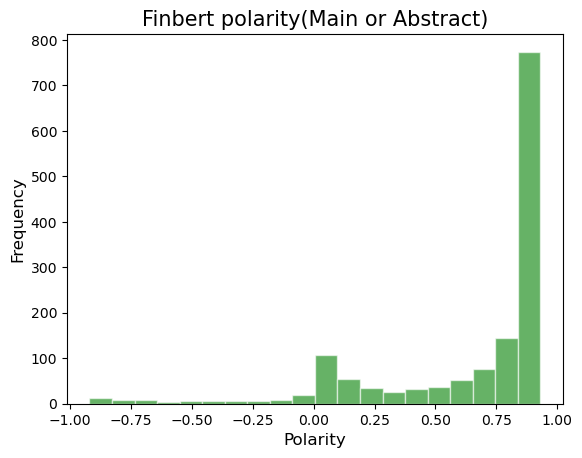

In [30]:
plt.hist(Sentiment['Fin_senti_score'], bins=20, color='green', edgecolor='white', alpha=0.6)
plt.xlabel('Polarity', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Finbert polarity(Main or Abstract)', fontsize = 15)
plt.show()

<div style="
    background-color: #fffbea;
    border: 1px solid #d6d6d6;
    border-left: 20px solid #ffcc00;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li style="margin-bottom: 1px;">
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span>Textblob and FinBERT weighted averages are showing a difference in how they are scoring the sentiments</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span>Textblob is more neutral, FinBERT scores are more on the positive side</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span>A weighted average of both scores can be trialled to see if they account for both sentiments or if it dilutes signals</li>
    </ul>
</div>

In [31]:
# Define weights
Calibration = {'TB_Wt_Avg_Score': 0.40,'Fin_senti_score': 0.60}

# Calculate weighted average score
Sentiment['Fin_TB_Cal_Score'] = (
    (Sentiment['TB_Wt_Avg_Score'] * Calibration['TB_Wt_Avg_Score']) +
    (Sentiment['Fin_senti_score'] * Calibration['Fin_senti_score'])
)

Sentiment.head()

,day,time,adjusted_day,Company,Market,abstract,lead_paragraph,main,print_headline,TB_Wt_Avg_Score,Fin_senti_score,Fin_TB_Cal_Score
0,2019-04-16,19:20:36,2019-04-17,Apple,Market-Macro and Tech-Macro,apple and qualcomm said they had agreed to dis...,san francisco for the past two years apple and...,apple and qualcomm settle all disputes worldwide,qualcomm vs apple is settled worldwide,-0.012500,0.672844,0.398706
1,2019-04-27,09:00:09,2019-04-27,Apple,Other,last year with much fanfare the tech giant unv...,san francisco they all tell a similar story th...,apple cracks down on apps that fight iphone ad...,purging rivals,0.061250,0.026304,0.040282
2,2019-04-30,23:18:37,2019-05-01,Apple,Market-Macro,the company said it would add to its record re...,san francisco shortly after apple used a new t...,None,None,0.136364,0.858061,0.569382
3,2019-04-17,10:30:28,2019-04-17,Apple,Tech-Macro,after two years of bitter patent battles acros...,good wednesday want this by email sign up here,dealbook briefing apple and qualcomm kiss and ...,None,0.300000,0.871348,0.642809
4,2019-04-13,18:03:14,2019-04-14,Apple,Other,plus the national enquirer is for sale and elo...,youre a busy person so heres your quick and br...,None,None,0.304167,0.858061,0.636503


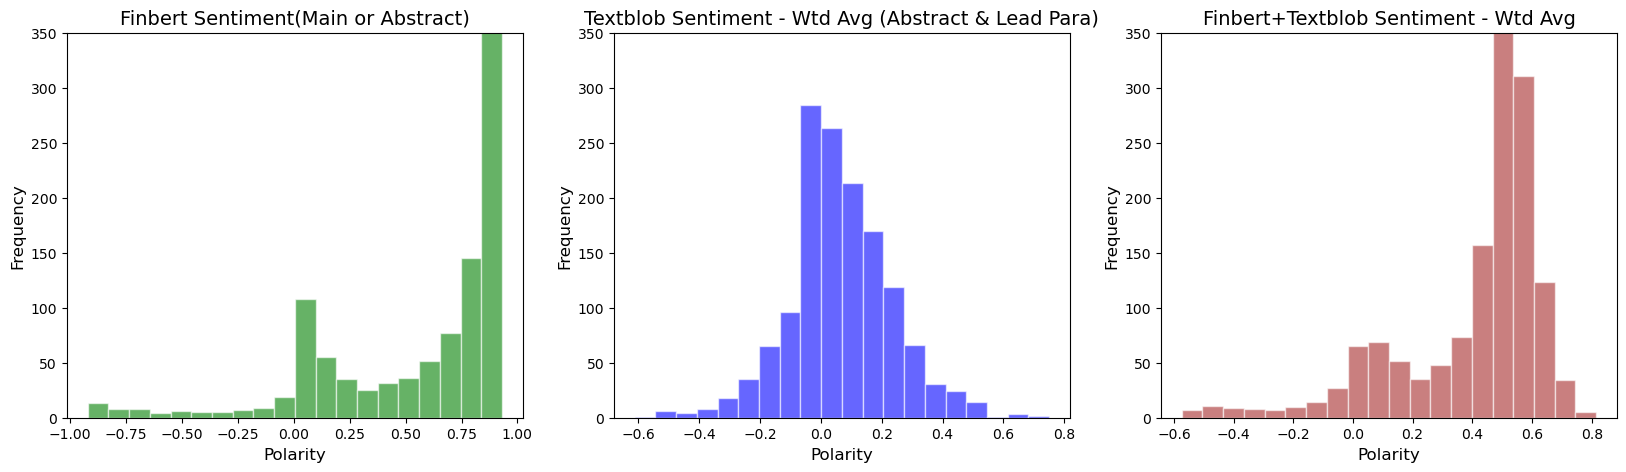

In [32]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.hist(Sentiment['Fin_senti_score'], bins=20, color='green', edgecolor='white', alpha=0.6)
plt.xlabel('Polarity', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Finbert Sentiment(Main or Abstract)', fontsize = 14)
plt.ylim(0, 350)  # Set the same Y axis limit for all plots

plt.subplot(1, 3, 2)
plt.hist(Sentiment['TB_Wt_Avg_Score'], bins=20, color='blue', edgecolor='white', alpha=0.6)
plt.xlabel('Polarity', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Textblob Sentiment - Wtd Avg (Abstract & Lead Para)', fontsize = 14)
plt.ylim(0, 350) 

plt.subplot(1, 3, 3)
plt.hist(Sentiment['Fin_TB_Cal_Score'], bins=20, color='brown', edgecolor='white', alpha=0.6)
plt.xlabel('Polarity', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Finbert+Textblob Sentiment - Wtd Avg', fontsize = 14)
plt.ylim(0, 350) 

plt.show()

In [33]:
Sentiment.head(5).style.set_properties(subset=['abstract', 'lead_paragraph','main'], **{'width': '1200px'})

,day,time,adjusted_day,Company,Market,abstract,lead_paragraph,main,print_headline,TB_Wt_Avg_Score,Fin_senti_score,Fin_TB_Cal_Score
0,2019-04-16 00:00:00,19:20:36,2019-04-17 00:00:00,Apple,Market-Macro and Tech-Macro,apple and qualcomm said they had agreed to dismiss all litigation between them worldwide,san francisco for the past two years apple and qualcomm have dueled on three continents over the division of billions of dollars of smartphone profits and even how much consumers pay for their phones,apple and qualcomm settle all disputes worldwide,qualcomm vs apple is settled worldwide,-0.012500,0.672844,0.398706
1,2019-04-27 00:00:00,09:00:09,2019-04-27 00:00:00,Apple,Other,last year with much fanfare the tech giant unveiled a screentime tracker of its own then it quietly began purging competitors from its store,san francisco they all tell a similar story they ran apps that helped people limit the time they and their children spent on iphones then apple created its own screentime tracker and then apple made staying in business very very difficult,apple cracks down on apps that fight iphone addiction,purging rivals,0.061250,0.026304,0.040282
2,2019-04-30 00:00:00,23:18:37,2019-05-01 00:00:00,Apple,Market-Macro,the company said it would add to its record returns to shareholders most likely fueling an intensifying debate over corporate spending,san francisco shortly after apple used a new tax law last year to bring back most of the 252 billion it had held abroad the company said it would buy back 100 billion of its stock,None,None,0.136364,0.858061,0.569382
3,2019-04-17 00:00:00,10:30:28,2019-04-17 00:00:00,Apple,Tech-Macro,after two years of bitter patent battles across three continents apple and the chip maker qualcomm have settled all of their disputes,good wednesday want this by email sign up here,dealbook briefing apple and qualcomm kiss and make up,None,0.300000,0.871348,0.642809
4,2019-04-13 00:00:00,18:03:14,2019-04-14 00:00:00,Apple,Other,plus the national enquirer is for sale and elon musk must make nice with the sec,youre a busy person so heres your quick and breezy catchup on the latest in tech and business news plus what to know for the week ahead your monday self will be better for it,None,None,0.304167,0.858061,0.636503


<div style="
    background-color: #e8f8e8;
    border: 1px solid #efffe8;
    border-left: 20px solid #7dbf7d;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Based on manual review of a sample dataset, <b>Fin_senti_score is retained as the sentiment score.</b></li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Fin_TB_Cal_score is averaging the positive and negative sentiments, TB is not capturing the sentiment swings properly</li>     
    </ul>
</div>

In [34]:
Sentiment = Sentiment[['day','time','adjusted_day','Company','Market','abstract','lead_paragraph','main','Fin_senti_score']]

In [35]:
Sentiment.head(5).style.set_properties(subset=['abstract', 'lead_paragraph','main'], **{'width': '1200px'})

,day,time,adjusted_day,Company,Market,abstract,lead_paragraph,main,Fin_senti_score
0,2019-04-16 00:00:00,19:20:36,2019-04-17 00:00:00,Apple,Market-Macro and Tech-Macro,apple and qualcomm said they had agreed to dismiss all litigation between them worldwide,san francisco for the past two years apple and qualcomm have dueled on three continents over the division of billions of dollars of smartphone profits and even how much consumers pay for their phones,apple and qualcomm settle all disputes worldwide,0.672844
1,2019-04-27 00:00:00,09:00:09,2019-04-27 00:00:00,Apple,Other,last year with much fanfare the tech giant unveiled a screentime tracker of its own then it quietly began purging competitors from its store,san francisco they all tell a similar story they ran apps that helped people limit the time they and their children spent on iphones then apple created its own screentime tracker and then apple made staying in business very very difficult,apple cracks down on apps that fight iphone addiction,0.026304
2,2019-04-30 00:00:00,23:18:37,2019-05-01 00:00:00,Apple,Market-Macro,the company said it would add to its record returns to shareholders most likely fueling an intensifying debate over corporate spending,san francisco shortly after apple used a new tax law last year to bring back most of the 252 billion it had held abroad the company said it would buy back 100 billion of its stock,None,0.858061
3,2019-04-17 00:00:00,10:30:28,2019-04-17 00:00:00,Apple,Tech-Macro,after two years of bitter patent battles across three continents apple and the chip maker qualcomm have settled all of their disputes,good wednesday want this by email sign up here,dealbook briefing apple and qualcomm kiss and make up,0.871348
4,2019-04-13 00:00:00,18:03:14,2019-04-14 00:00:00,Apple,Other,plus the national enquirer is for sale and elon musk must make nice with the sec,youre a busy person so heres your quick and breezy catchup on the latest in tech and business news plus what to know for the week ahead your monday self will be better for it,None,0.858061


### Merging Sentiment scores with daily stock data (OHLCV)

In [36]:
# Get distinct values in 'Company' column
distinct_companies = Sentiment['Company'].unique()
print("Distinct Companies:")
print(distinct_companies)

# Get distinct values in 'Market' column
distinct_markets = Sentiment['Market'].unique()
print("\nDistinct Markets:")
print(distinct_markets)

Distinct Companies:
['Apple' 'Apple and Google' 'Other' 'Google' 'Apple and Nvidia'
 'Google and Nvidia' 'Nvidia']

Distinct Markets:
['Market-Macro and Tech-Macro' 'Other' 'Market-Macro' 'Tech-Macro'
 'Tech-AI and Tech-Macro' 'Tech-AI' 'Market-Macro and Tech-AI'
 'Market-Macro and Tech-AI and Tech-Macro']


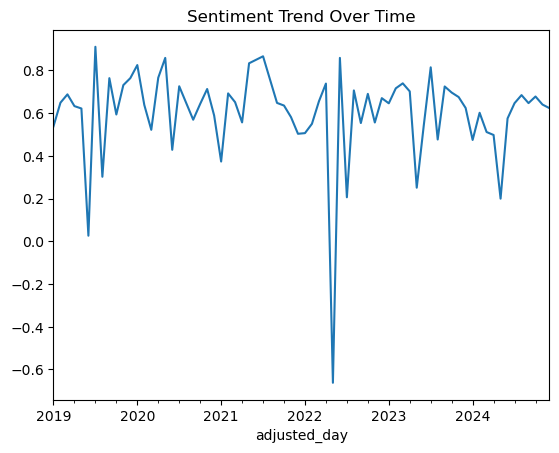

In [37]:
Sentiment['adjusted_day'] = pd.to_datetime(Sentiment['adjusted_day'])
Sentiment.groupby(Sentiment['adjusted_day'].dt.to_period('M'))['Fin_senti_score'].mean().plot(kind='line', title="Sentiment Trend Over Time")
plt.show()

<div style="
    background-color: #e8f8e8;
    border: 1px solid #efffe8;
    border-left: 20px solid #7dbf7d;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> <b>Importing Stock OHLCV data with earnings flag marked</b></li>    
    </ul>
</div>

In [38]:
stock_df = pd.read_csv('stock_macro_data_with_earningsflag.csv')
stock_df = stock_df[stock_df['Date']>='2019-01-01']
stock_df.reset_index(inplace=True)
stock_df = stock_df[['Date','Ticker','Close','High','Low','Open','Volume','earnings_reported_flag']]
stock_df.head()

,Date,Ticker,Close,High,Low,Open,Volume,earnings_reported_flag
0,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2019-01-02,AAPL,37.71,37.93,36.83,36.99,148158800.0,0
2,2019-01-02,GOOGL,52.54,52.85,51.08,51.17,31868000.0,0
3,2019-01-02,NVDA,3.38,3.43,3.23,3.24,508752000.0,0
4,2019-01-03,AAPL,33.95,34.80,33.91,34.38,365248800.0,0


In [39]:
stock_df = stock_df[(stock_df['Date']>='2019-01-01') & (stock_df['Date']<='2024-12-31')]
apple_stock_df = stock_df[stock_df['Ticker']=='AAPL']
nvda_stock_df = stock_df[stock_df['Ticker']=='NVDA']
goog_stock_df = stock_df[stock_df['Ticker']=='GOOGL']

apple_stock_df['Date'] = pd.to_datetime(apple_stock_df['Date'],format='%Y-%m-%d', dayfirst=True)
goog_stock_df['Date'] = pd.to_datetime(goog_stock_df['Date'],format='%Y-%m-%d', dayfirst=True)
nvda_stock_df['Date'] = pd.to_datetime(nvda_stock_df['Date'],format='%Y-%m-%d', dayfirst=True)

In [40]:
Sentiment['adjusted_day'] = pd.to_datetime(Sentiment['adjusted_day'])
Sentiment = Sentiment.sort_values("adjusted_day",ascending=True)

#### Company-wise Sentiment datasets

<div style="
    background-color: #fffbea;
    border: 1px solid #d6d6d6;
    border-left: 20px solid #ffcc00;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li style="margin-bottom: 1px;">
        <li><b> 1. Sentiment dataset is being subsetted into company-wise articles based on company column values and macro column values </b></li>
        <li><b> 2. Each stock will have 2 sentiment subsets - Company and Macro</b></li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Company (companyname_sentiment) - will contain articles that have been classified to be associated with a specific stock (article with relevant Company value)</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Macro (companyname_macro) - will contain all articles that have been classified to be NOT associated with the specific stock, thereby considered as Market-Macro sentiments impacting the company </li>
        <li><b> 3. Further Macro level analysis can be performed if required (AI, Tech, Market Macro)</b></li>
    </ul>
</div>

In [41]:
# Articles that have been classified to be associated with a specific stock 
apple_sentiment = Sentiment[Sentiment['Company'].isin(['Apple', 'Apple and Google', 'Apple and Nvidia'])][['adjusted_day','Company','Market','Fin_senti_score']]
goog_sentiment = Sentiment[Sentiment['Company'].isin(['Google', 'Google and Nvidia', 'Apple and Google'])][['adjusted_day','Company','Market','Fin_senti_score']]
nvda_sentiment = Sentiment[Sentiment['Company'].isin(['Nvidia', 'Google and Nvidia', 'Apple and Nvidia'])][['adjusted_day','Company','Market','Fin_senti_score']]

# Articles that have been classified to be NOT associated with a specific stock
apple_macro = Sentiment[~Sentiment['Company'].isin(['Apple', 'Apple and Google', 'Apple and Nvidia'])][['adjusted_day','Company','Market','Fin_senti_score']]
apple_macro = apple_macro[~((apple_macro['Company']=='Other') & (apple_macro['Market']=='Other'))]
goog_macro = Sentiment[~Sentiment['Company'].isin(['Google', 'Google and Nvidia', 'Apple and Google'])][['adjusted_day','Company','Market','Fin_senti_score']]
goog_macro = goog_macro[~((goog_macro['Company']=='Other') & (goog_macro['Market']=='Other'))]
nvda_macro = Sentiment[~Sentiment['Company'].isin(['Nvidia', 'Google and Nvidia', 'Apple and Nvidia'])][['adjusted_day','Company','Market','Fin_senti_score']]
nvda_macro = nvda_macro[~((nvda_macro['Company']=='Other') & (nvda_macro['Market']=='Other'))]

# Ensure the date columns are datetime objects
apple_sentiment['adjusted_day'] = pd.to_datetime(apple_sentiment['adjusted_day'],format='%Y-%d-%m', dayfirst=True)
goog_sentiment['adjusted_day'] = pd.to_datetime(goog_sentiment['adjusted_day'],format='%Y-%d-%m', dayfirst=True)
nvda_sentiment['adjusted_day'] = pd.to_datetime(nvda_sentiment['adjusted_day'],format='%Y-%d-%m', dayfirst=True)

apple_macro['adjusted_day'] = pd.to_datetime(apple_macro['adjusted_day'],format='%Y-%d-%m', dayfirst=True)
goog_macro['adjusted_day'] = pd.to_datetime(goog_macro['adjusted_day'],format='%Y-%d-%m', dayfirst=True)
nvda_macro['adjusted_day'] = pd.to_datetime(nvda_macro['adjusted_day'],format='%Y-%d-%m', dayfirst=True)


In [42]:
apple_macro.head()

,adjusted_day,Company,Market,Fin_senti_score
1189,2019-01-23,Google,Market-Macro and Tech-Macro,0.022957
1195,2019-01-25,Other,Tech-Macro,0.912767
1186,2019-01-29,Nvidia,Market-Macro,0.016831
1198,2019-01-29,Other,Market-Macro,0.212829
1190,2019-01-29,Other,Market-Macro,0.858061


<div style="
    background-color: #fffbea;
    border: 1px solid #d6d6d6;
    border-left: 20px solid #ffcc00;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li style="margin-bottom: 1px;">
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Articles publishing date is checked if they are on trading days or on holidays.</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> If they are published on holidays, the sentiment should be associated with the next available trading day (assigned to weekday-date column) to ensure that we don't miss out on sentiment impact</li>
    </ul>
</div>

In [43]:
# Function to find the next available trading date
def get_next_trading_date(event_date, valid_dates):
    for date in valid_dates:
        if date >= event_date:
            return date
    return None

# Create a list of valid trading dates from apple_stock_df
valid_dates = list(sorted(apple_stock_df['Date'].unique()))
valid_dates_1 = list(sorted(goog_stock_df['Date'].unique()))
valid_dates_2 = list(sorted(nvda_stock_df['Date'].unique()))

# Apply the function to create the new column - Company_sentiment datasets
apple_sentiment['weekday-date'] = apple_sentiment['adjusted_day'].apply(lambda x: get_next_trading_date(x, valid_dates))
goog_sentiment['weekday-date'] = goog_sentiment['adjusted_day'].apply(lambda x: get_next_trading_date(x, valid_dates_1))
nvda_sentiment['weekday-date'] = nvda_sentiment['adjusted_day'].apply(lambda x: get_next_trading_date(x, valid_dates_2))

# Apply the function to create the new column - Macro_sentiment datasets
apple_macro['weekday-date'] = apple_macro['adjusted_day'].apply(lambda x: get_next_trading_date(x, valid_dates))
goog_macro['weekday-date'] = goog_macro['adjusted_day'].apply(lambda x: get_next_trading_date(x, valid_dates_1))
nvda_macro['weekday-date'] = nvda_macro['adjusted_day'].apply(lambda x: get_next_trading_date(x, valid_dates_2))

<div style="
    background-color: #fffbea;
    border: 1px solid #d6d6d6;
    border-left: 20px solid #ffcc00;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li style="margin-bottom: 1px;">
        <li><b>A groupby aggregation is performed based on weekday-date column to avoid duplicates before merging with the dailys stock data.</b></li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> The sentiment score is averaged (mean)</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> The Company and Market categories are concatenated.</li>
    </ul>
</div>

In [44]:
apple_sentiment = apple_sentiment.groupby('weekday-date').agg({
    'Company': lambda x: ' - '.join(x.unique()),
    'Market': lambda x: ' - '.join(x.unique()),
    'Fin_senti_score': 'mean'
    }).reset_index()

goog_sentiment = goog_sentiment.groupby('weekday-date').agg({
    'Company': lambda x: ' - '.join(x.unique()),
    'Market': lambda x: ' - '.join(x.unique()),
    'Fin_senti_score': 'mean'
    }).reset_index()

nvda_sentiment = nvda_sentiment.groupby('weekday-date').agg({
    'Company': lambda x: ' - '.join(x.unique()),
    'Market': lambda x: ' - '.join(x.unique()),
    'Fin_senti_score': 'mean'
    }).reset_index()

apple_macro = apple_macro.groupby('weekday-date').agg({
    'Company': lambda x: ' - '.join(x.unique()),
    'Market': lambda x: ' - '.join(x.unique()),
    'Fin_senti_score': 'mean'
    }).reset_index()

goog_macro = goog_macro.groupby('weekday-date').agg({
    'Company': lambda x: ' - '.join(x.unique()),
    'Market': lambda x: ' - '.join(x.unique()),
    'Fin_senti_score': 'mean'
    }).reset_index()

nvda_macro = nvda_macro.groupby('weekday-date').agg({
    'Company': lambda x: ' - '.join(x.unique()),
    'Market': lambda x: ' - '.join(x.unique()),
    'Fin_senti_score': 'mean'
    }).reset_index()

In [45]:
print(apple_sentiment.count())
print(goog_sentiment.count())
print(nvda_sentiment.count())

weekday-date       413
Company            413
Market             413
Fin_senti_score    413
dtype: int64
weekday-date       406
Company            406
Market             406
Fin_senti_score    406
dtype: int64
weekday-date       67
Company            67
Market             67
Fin_senti_score    67
dtype: int64


In [46]:
print(apple_macro.count())
print(goog_macro.count())
print(nvda_macro.count())

weekday-date       478
Company            478
Market             478
Fin_senti_score    478
dtype: int64
weekday-date       486
Company            486
Market             486
Fin_senti_score    486
dtype: int64
weekday-date       663
Company            663
Market             663
Fin_senti_score    663
dtype: int64


In [47]:
display(apple_stock_df.head(10))
display(apple_sentiment.head(10))
display(apple_macro.head(10))

,Date,Ticker,Close,High,Low,Open,Volume,earnings_reported_flag
1,2019-01-02,AAPL,37.71,37.93,36.83,36.99,148158800.0,0
4,2019-01-03,AAPL,33.95,34.80,33.91,34.38,365248800.0,0
7,2019-01-04,AAPL,35.40,35.47,34.34,34.51,234428400.0,0
12,2019-01-07,AAPL,35.32,35.54,34.84,35.51,219111200.0,0
15,2019-01-08,AAPL,36.00,36.25,35.46,35.71,164101200.0,0
18,2019-01-09,AAPL,36.61,36.90,35.73,36.13,180396400.0,0
21,2019-01-10,AAPL,36.72,36.77,36.02,36.41,143122800.0,0
24,2019-01-11,AAPL,36.36,36.70,36.18,36.51,108092800.0,0
29,2019-01-14,AAPL,35.82,36.12,35.63,36.02,129756800.0,0
32,2019-01-15,AAPL,36.55,36.63,35.83,35.88,114843600.0,0


,weekday-date,Company,Market,Fin_senti_score
0,2019-02-04,Apple and Nvidia,Tech-Macro,0.858061
1,2019-02-06,Apple,Market-Macro and Tech-Macro - Other,0.863074
2,2019-02-14,Apple and Google - Apple,Other - Market-Macro,0.306129
3,2019-02-19,Apple,Market-Macro and Tech-Macro - Tech-Macro,0.407256
4,2019-02-27,Apple,Other,0.858061
5,2019-03-07,Apple and Google,Market-Macro and Tech-Macro,0.858061
6,2019-03-11,Apple and Google,Tech-Macro,0.895931
7,2019-03-13,Apple,Market-Macro and Tech-Macro,0.046180
8,2019-03-14,Apple - Apple and Google,Tech-Macro,0.771650
9,2019-03-15,Apple,Market-Macro,0.858061


,weekday-date,Company,Market,Fin_senti_score
0,2019-01-23,Google,Market-Macro and Tech-Macro,0.022957
1,2019-01-25,Other,Tech-Macro,0.912767
2,2019-01-29,Nvidia - Other,Market-Macro,0.362574
3,2019-01-31,Other,Tech-Macro,0.858061
4,2019-02-04,Other,Market-Macro and Tech-Macro,0.883678
5,2019-03-05,Google,Market-Macro and Tech-Macro,0.858061
6,2019-03-06,Google,Tech-Macro,0.858061
7,2019-03-07,Google,Other,0.858061
8,2019-03-08,Google,Tech-Macro - Market-Macro and Tech-Macro,0.817685
9,2019-03-11,Google - Other,Tech-Macro - Tech-AI,0.582288


In [48]:
display(goog_stock_df.head(10))
display(goog_sentiment.head(10))
display(goog_macro.head(10))

,Date,Ticker,Close,High,Low,Open,Volume,earnings_reported_flag
2,2019-01-02,GOOGL,52.54,52.85,51.08,51.17,31868000.0,0
5,2019-01-03,GOOGL,51.09,53.12,50.93,52.34,41960000.0,0
8,2019-01-04,GOOGL,53.71,53.80,51.66,51.94,46022000.0,0
13,2019-01-07,GOOGL,53.60,53.94,52.94,53.85,47446000.0,0
16,2019-01-08,GOOGL,54.07,54.47,53.22,54.10,35414000.0,0
19,2019-01-09,GOOGL,53.89,54.38,53.52,54.20,26998000.0,0
22,2019-01-10,GOOGL,53.75,53.80,53.04,53.55,26598000.0,0
25,2019-01-11,GOOGL,53.03,53.47,52.63,53.30,30864000.0,0
30,2019-01-14,GOOGL,52.39,52.73,52.24,52.48,28490000.0,0
33,2019-01-15,GOOGL,54.13,54.22,52.53,52.71,37518000.0,0


,weekday-date,Company,Market,Fin_senti_score
0,2019-01-23,Google,Market-Macro and Tech-Macro,0.022957
1,2019-02-14,Apple and Google,Other,0.343873
2,2019-03-05,Google,Market-Macro and Tech-Macro,0.858061
3,2019-03-06,Google,Tech-Macro,0.858061
4,2019-03-07,Google - Apple and Google,Other - Market-Macro and Tech-Macro,0.858061
5,2019-03-08,Google,Tech-Macro - Market-Macro and Tech-Macro,0.817685
6,2019-03-11,Apple and Google - Google,Tech-Macro - Tech-AI,0.594912
7,2019-03-12,Google,Market-Macro and Tech-Macro,-0.467062
8,2019-03-14,Apple and Google,Tech-Macro,0.685240
9,2019-03-15,Google,Market-Macro and Tech-AI and Tech-Macro,0.693353


,weekday-date,Company,Market,Fin_senti_score
0,2019-01-25,Other,Tech-Macro,0.912767
1,2019-01-29,Nvidia - Other,Market-Macro,0.362574
2,2019-01-31,Other,Tech-Macro,0.858061
3,2019-02-04,Apple and Nvidia - Other,Tech-Macro - Market-Macro and Tech-Macro,0.870869
4,2019-02-06,Apple,Market-Macro and Tech-Macro - Other,0.863074
5,2019-02-14,Apple,Market-Macro,0.268385
6,2019-02-19,Apple,Market-Macro and Tech-Macro - Tech-Macro,0.407256
7,2019-02-27,Apple,Other,0.858061
8,2019-03-11,Other,Tech-Macro,0.858061
9,2019-03-13,Apple,Market-Macro and Tech-Macro,0.046180


In [49]:
display(nvda_stock_df.head(10))
display(nvda_sentiment.head(10))
display(nvda_macro.head(10))

,Date,Ticker,Close,High,Low,Open,Volume,earnings_reported_flag
3,2019-01-02,NVDA,3.38,3.43,3.23,3.24,508752000.0,0
6,2019-01-03,NVDA,3.17,3.35,3.17,3.32,705552000.0,0
9,2019-01-04,NVDA,3.38,3.42,3.22,3.25,585620000.0,0
14,2019-01-07,NVDA,3.56,3.59,3.38,3.43,709160000.0,0
17,2019-01-08,NVDA,3.47,3.64,3.39,3.64,786016000.0,0
20,2019-01-09,NVDA,3.54,3.58,3.47,3.52,617260000.0,0
23,2019-01-10,NVDA,3.60,3.61,3.46,3.52,523156000.0,0
26,2019-01-11,NVDA,3.69,3.71,3.55,3.58,874764000.0,0
31,2019-01-14,NVDA,3.73,3.76,3.61,3.64,730168000.0,0
34,2019-01-15,NVDA,3.72,3.80,3.70,3.76,617012000.0,0


,weekday-date,Company,Market,Fin_senti_score
0,2019-01-29,Nvidia,Market-Macro,0.016831
1,2019-02-04,Apple and Nvidia,Tech-Macro,0.858061
2,2019-05-24,Nvidia,Tech-Macro,0.039208
3,2020-09-14,Nvidia,Market-Macro and Tech-Macro - Tech-Macro,0.733928
4,2020-11-23,Nvidia,Tech-Macro,0.858061
5,2021-05-11,Nvidia,Tech-Macro,0.759646
6,2021-05-17,Apple and Nvidia,Tech-Macro,0.858061
7,2021-12-03,Nvidia,Market-Macro and Tech-Macro,0.041872
8,2022-02-08,Nvidia,Market-Macro,0.180445
9,2022-02-11,Nvidia,Market-Macro and Tech-Macro,0.858061


,weekday-date,Company,Market,Fin_senti_score
0,2019-01-23,Google,Market-Macro and Tech-Macro,0.022957
1,2019-01-25,Other,Tech-Macro,0.912767
2,2019-01-29,Other,Market-Macro,0.535445
3,2019-01-31,Other,Tech-Macro,0.858061
4,2019-02-04,Other,Market-Macro and Tech-Macro,0.883678
5,2019-02-06,Apple,Market-Macro and Tech-Macro - Other,0.863074
6,2019-02-14,Apple and Google - Apple,Other - Market-Macro,0.306129
7,2019-02-19,Apple,Market-Macro and Tech-Macro - Tech-Macro,0.407256
8,2019-02-27,Apple,Other,0.858061
9,2019-03-05,Google,Market-Macro and Tech-Macro,0.858061


In [50]:
apple_macro.rename(columns={'Fin_senti_score':'Macro_Fin_senti_score'},inplace=True)
goog_macro.rename(columns={'Fin_senti_score':'Macro_Fin_senti_score'},inplace=True)
nvda_macro.rename(columns={'Fin_senti_score':'Macro_Fin_senti_score'},inplace=True)

apple_sentiment.rename(columns={'Fin_senti_score':'Company_Fin_senti_score'},inplace=True)
goog_sentiment.rename(columns={'Fin_senti_score':'Company_Fin_senti_score'},inplace=True)
nvda_sentiment.rename(columns={'Fin_senti_score':'Company_Fin_senti_score'},inplace=True)

In [51]:
apple_stock_df.info()
apple_sentiment.info()
apple_macro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1510 entries, 1 to 5209
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    1510 non-null   datetime64[ns]
 1   Ticker                  1510 non-null   object        
 2   Close                   1510 non-null   float64       
 3   High                    1510 non-null   float64       
 4   Low                     1510 non-null   float64       
 5   Open                    1510 non-null   float64       
 6   Volume                  1510 non-null   float64       
 7   earnings_reported_flag  1510 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 106.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----

In [52]:
goog_stock_df.info()
goog_sentiment.info()
goog_macro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1510 entries, 2 to 5210
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    1510 non-null   datetime64[ns]
 1   Ticker                  1510 non-null   object        
 2   Close                   1510 non-null   float64       
 3   High                    1510 non-null   float64       
 4   Low                     1510 non-null   float64       
 5   Open                    1510 non-null   float64       
 6   Volume                  1510 non-null   float64       
 7   earnings_reported_flag  1510 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 106.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----

In [53]:
nvda_stock_df.info()
nvda_sentiment.info()
nvda_macro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1510 entries, 3 to 5211
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    1510 non-null   datetime64[ns]
 1   Ticker                  1510 non-null   object        
 2   Close                   1510 non-null   float64       
 3   High                    1510 non-null   float64       
 4   Low                     1510 non-null   float64       
 5   Open                    1510 non-null   float64       
 6   Volume                  1510 non-null   float64       
 7   earnings_reported_flag  1510 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 106.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----  

<div style="
    background-color: #e8f8e8;
    border: 1px solid #efffe8;
    border-left: 20px solid #7dbf7d;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li style="margin-bottom: 7px;font-weight: bold">
        Merging Daily stock data, Company level sentiment data and Company's Macro data (any articles that are not associated with the particular company) into a single dataframe</li>
    </ul>
</div>

In [54]:
apple_merged_df = pd.merge(apple_stock_df,apple_sentiment,left_on='Date',right_on='weekday-date',how='left')
apple_merged_df = pd.merge(apple_merged_df,apple_macro[['weekday-date','Macro_Fin_senti_score']],left_on='Date',right_on='weekday-date',how='left')
apple_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     1510 non-null   datetime64[ns]
 1   Ticker                   1510 non-null   object        
 2   Close                    1510 non-null   float64       
 3   High                     1510 non-null   float64       
 4   Low                      1510 non-null   float64       
 5   Open                     1510 non-null   float64       
 6   Volume                   1510 non-null   float64       
 7   earnings_reported_flag   1510 non-null   int64         
 8   weekday-date_x           413 non-null    datetime64[ns]
 9   Company                  413 non-null    object        
 10  Market                   413 non-null    object        
 11  Company_Fin_senti_score  413 non-null    float32       
 12  weekday-date_y           478 non-n

<div style="
    background-color: #e8f8e8;
    border: 1px solid #efffe8;
    border-left: 20px solid #7dbf7d;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li style="margin-bottom: 7px;">
        Counts before and after merge are matching confirming that the merge has not created any duplicate data entries</li>
    </ul>
</div>

In [55]:
apple_merged_df.rename(columns={'weekday-date_x':'Company_weekday-date','weekday-date_y':'Macro_weekday-date'},inplace=True)
apple_merged_df

,Date,Ticker,Close,High,Low,Open,Volume,earnings_reported_flag,Company_weekday-date,Company,Market,Company_Fin_senti_score,Macro_weekday-date,Macro_Fin_senti_score
0,2019-01-02,AAPL,37.71,37.93,36.83,36.99,148158800.0,0,NaT,NaN,NaN,NaN,NaT,NaN
1,2019-01-03,AAPL,33.95,34.80,33.91,34.38,365248800.0,0,NaT,NaN,NaN,NaN,NaT,NaN
2,2019-01-04,AAPL,35.40,35.47,34.34,34.51,234428400.0,0,NaT,NaN,NaN,NaN,NaT,NaN
3,2019-01-07,AAPL,35.32,35.54,34.84,35.51,219111200.0,0,NaT,NaN,NaN,NaN,NaT,NaN
4,2019-01-08,AAPL,36.00,36.25,35.46,35.71,164101200.0,0,NaT,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,2024-12-24,AAPL,258.20,258.21,255.29,255.49,23234700.0,0,NaT,NaN,NaN,NaN,NaT,NaN
1506,2024-12-26,AAPL,259.02,260.10,257.63,258.19,27237100.0,0,NaT,NaN,NaN,NaN,NaT,NaN
1507,2024-12-27,AAPL,255.59,258.70,253.06,257.83,42355300.0,0,NaT,NaN,NaN,NaN,NaT,NaN
1508,2024-12-30,AAPL,252.20,253.50,250.75,252.23,35557500.0,0,NaT,NaN,NaN,NaN,NaT,NaN


In [56]:
goog_merged_df = pd.merge(goog_stock_df,goog_sentiment,left_on='Date',right_on='weekday-date',how='left')
goog_merged_df = pd.merge(goog_merged_df,goog_macro[['weekday-date','Macro_Fin_senti_score']],left_on='Date',right_on='weekday-date',how='left')
goog_merged_df.rename(columns={'weekday-date_x':'Company_weekday-date','weekday-date_y':'Macro_weekday-date'},inplace=True)

In [57]:
goog_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     1510 non-null   datetime64[ns]
 1   Ticker                   1510 non-null   object        
 2   Close                    1510 non-null   float64       
 3   High                     1510 non-null   float64       
 4   Low                      1510 non-null   float64       
 5   Open                     1510 non-null   float64       
 6   Volume                   1510 non-null   float64       
 7   earnings_reported_flag   1510 non-null   int64         
 8   Company_weekday-date     406 non-null    datetime64[ns]
 9   Company                  406 non-null    object        
 10  Market                   406 non-null    object        
 11  Company_Fin_senti_score  406 non-null    float32       
 12  Macro_weekday-date       486 non-n

In [58]:
goog_merged_df

,Date,Ticker,Close,High,Low,Open,Volume,earnings_reported_flag,Company_weekday-date,Company,Market,Company_Fin_senti_score,Macro_weekday-date,Macro_Fin_senti_score
0,2019-01-02,GOOGL,52.54,52.85,51.08,51.17,31868000.0,0,NaT,NaN,NaN,NaN,NaT,NaN
1,2019-01-03,GOOGL,51.09,53.12,50.93,52.34,41960000.0,0,NaT,NaN,NaN,NaN,NaT,NaN
2,2019-01-04,GOOGL,53.71,53.80,51.66,51.94,46022000.0,0,NaT,NaN,NaN,NaN,NaT,NaN
3,2019-01-07,GOOGL,53.60,53.94,52.94,53.85,47446000.0,0,NaT,NaN,NaN,NaN,NaT,NaN
4,2019-01-08,GOOGL,54.07,54.47,53.22,54.10,35414000.0,0,NaT,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,2024-12-24,GOOGL,196.11,196.11,193.78,194.84,10403300.0,0,NaT,NaN,NaN,NaN,NaT,NaN
1506,2024-12-26,GOOGL,195.60,196.75,194.38,195.15,12046600.0,0,NaT,NaN,NaN,NaN,NaT,NaN
1507,2024-12-27,GOOGL,192.76,195.32,190.65,194.95,18891400.0,0,NaT,NaN,NaN,NaN,NaT,NaN
1508,2024-12-30,GOOGL,191.24,192.55,189.12,189.80,14264700.0,0,NaT,NaN,NaN,NaN,NaT,NaN


In [59]:
nvda_merged_df = pd.merge(nvda_stock_df,nvda_sentiment,left_on='Date',right_on='weekday-date',how='left')
nvda_merged_df = pd.merge(nvda_merged_df,nvda_macro[['weekday-date','Macro_Fin_senti_score']],left_on='Date',right_on='weekday-date',how='left')
nvda_merged_df.rename(columns={'weekday-date_x':'Company_weekday-date','weekday-date_y':'Macro_weekday-date'},inplace=True)

In [60]:
nvda_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     1510 non-null   datetime64[ns]
 1   Ticker                   1510 non-null   object        
 2   Close                    1510 non-null   float64       
 3   High                     1510 non-null   float64       
 4   Low                      1510 non-null   float64       
 5   Open                     1510 non-null   float64       
 6   Volume                   1510 non-null   float64       
 7   earnings_reported_flag   1510 non-null   int64         
 8   Company_weekday-date     67 non-null     datetime64[ns]
 9   Company                  67 non-null     object        
 10  Market                   67 non-null     object        
 11  Company_Fin_senti_score  67 non-null     float32       
 12  Macro_weekday-date       663 non-n

In [61]:
nvda_merged_df

,Date,Ticker,Close,High,Low,Open,Volume,earnings_reported_flag,Company_weekday-date,Company,Market,Company_Fin_senti_score,Macro_weekday-date,Macro_Fin_senti_score
0,2019-01-02,NVDA,3.38,3.43,3.23,3.24,508752000.0,0,NaT,NaN,NaN,NaN,NaT,NaN
1,2019-01-03,NVDA,3.17,3.35,3.17,3.32,705552000.0,0,NaT,NaN,NaN,NaN,NaT,NaN
2,2019-01-04,NVDA,3.38,3.42,3.22,3.25,585620000.0,0,NaT,NaN,NaN,NaN,NaT,NaN
3,2019-01-07,NVDA,3.56,3.59,3.38,3.43,709160000.0,0,NaT,NaN,NaN,NaN,NaT,NaN
4,2019-01-08,NVDA,3.47,3.64,3.39,3.64,786016000.0,0,NaT,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,2024-12-24,NVDA,140.22,141.90,138.65,140.00,105157000.0,0,NaT,NaN,NaN,NaN,NaT,NaN
1506,2024-12-26,NVDA,139.93,140.85,137.73,139.70,116205600.0,0,NaT,NaN,NaN,NaN,NaT,NaN
1507,2024-12-27,NVDA,137.01,139.02,134.71,138.55,170582600.0,0,NaT,NaN,NaN,NaN,NaT,NaN
1508,2024-12-30,NVDA,137.49,140.27,134.02,134.83,167734700.0,0,NaT,NaN,NaN,NaN,NaT,NaN


<div style="
   background-color: #fffbea;
    border: 1px solid #d6d6d6;
    border-left: 20px solid #ffcc00;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li style="margin-bottom: 7px;">
        Creating a dataframe around earnings events for each company (from 2019-2024)</li>
    </ul>
</div>

In [62]:
apple_earng_df = apple_merged_df[apple_merged_df['earnings_reported_flag'] == 1]
apple_earng_df.head(24)

,Date,Ticker,Close,High,Low,Open,Volume,earnings_reported_flag,Company_weekday-date,Company,Market,Company_Fin_senti_score,Macro_weekday-date,Macro_Fin_senti_score
18,2019-01-29,AAPL,36.93,37.76,36.80,37.31,166348800.0,1,NaT,NaN,NaN,NaN,2019-01-29,0.362574
81,2019-04-30,AAPL,48.12,48.78,47.75,48.70,186139600.0,1,2019-04-30,Apple,Other,0.277936,2019-04-30,-0.022092
144,2019-07-30,AAPL,50.26,50.59,49.91,50.25,135742800.0,1,NaT,NaN,NaN,NaN,NaT,NaN
209,2019-10-30,AAPL,58.78,59.28,58.29,59.15,124522000.0,1,2019-10-30,Apple,Other,0.858061,2019-10-30,0.858061
269,2020-01-28,AAPL,77.00,77.17,75.67,75.77,162234000.0,1,NaT,NaN,NaN,NaN,NaT,NaN
334,2020-04-30,AAPL,71.38,71.55,70.05,70.44,183064000.0,1,2020-04-30,Apple,Market-Macro and Tech-Macro,0.858061,2020-04-30,0.858061
397,2020-07-30,AAPL,93.73,93.83,91.37,91.78,158130000.0,1,NaT,NaN,NaN,NaN,NaT,NaN
461,2020-10-29,AAPL,112.57,114.14,109.53,109.69,146129200.0,1,2020-10-29,Apple and Google,Market-Macro and Tech-Macro,0.858061,2020-10-29,0.888068
521,2021-01-27,AAPL,138.91,141.10,137.30,140.25,140843800.0,1,2021-01-27,Apple,Other,0.858061,NaT,NaN
584,2021-04-28,AAPL,130.82,132.23,130.33,131.53,107760100.0,1,2021-04-28,Apple,Other - Tech-Macro,0.774319,2021-04-28,0.437270


In [63]:
goog_earng_df = goog_merged_df[goog_merged_df['earnings_reported_flag'] == 1]
goog_earng_df.head(24)

,Date,Ticker,Close,High,Low,Open,Volume,earnings_reported_flag,Company_weekday-date,Company,Market,Company_Fin_senti_score,Macro_weekday-date,Macro_Fin_senti_score
22,2019-02-04,GOOGL,56.86,56.91,55.67,55.75,78408000.0,1,NaT,NaN,NaN,NaN,2019-02-04,0.870869
80,2019-04-29,GOOGL,64.58,64.61,63.36,63.79,72368000.0,1,2019-04-29,Google,Other,0.858061,2019-04-29,0.442183
141,2019-07-25,GOOGL,56.59,56.97,55.98,56.74,54762000.0,1,NaT,NaN,NaN,NaN,NaT,NaN
207,2019-10-28,GOOGL,64.22,64.73,63.39,63.52,65428000.0,1,NaT,NaN,NaN,NaN,NaT,NaN
273,2020-02-03,GOOGL,73.86,74.05,72.57,72.82,71636000.0,1,NaT,NaN,NaN,NaN,2020-02-03,-0.080807
332,2020-04-28,GOOGL,61.41,64.01,61.30,63.93,80700000.0,1,NaT,NaN,NaN,NaN,NaT,NaN
397,2020-07-30,GOOGL,76.64,76.77,74.49,74.63,36042000.0,1,NaT,NaN,NaN,NaN,NaT,NaN
461,2020-10-29,GOOGL,77.56,79.15,75.55,75.58,55406000.0,1,2020-10-29,Apple and Google - Google,Market-Macro and Tech-Macro - Tech-Macro,0.873065,NaT,NaN
525,2021-02-02,GOOGL,95.61,97.12,94.97,95.31,66332000.0,1,NaT,NaN,NaN,NaN,NaT,NaN
583,2021-04-27,GOOGL,114.14,115.50,113.90,115.46,44386000.0,1,NaT,NaN,NaN,NaN,2021-04-27,-0.012076


In [64]:
nvda_earng_df = nvda_merged_df[nvda_merged_df['earnings_reported_flag'] == 1]
nvda_earng_df.head(24)

,Date,Ticker,Close,High,Low,Open,Volume,earnings_reported_flag,Company_weekday-date,Company,Market,Company_Fin_senti_score,Macro_weekday-date,Macro_Fin_senti_score
30,2019-02-14,NVDA,3.83,3.86,3.75,3.79,827264000.0,1,NaT,NaN,NaN,NaN,2019-02-14,0.306129
93,2019-05-16,NVDA,3.98,4.02,3.91,3.96,781088000.0,1,NaT,NaN,NaN,NaN,NaT,NaN
156,2019-08-15,NVDA,3.70,3.77,3.66,3.75,477200000.0,1,NaT,NaN,NaN,NaN,NaT,NaN
220,2019-11-14,NVDA,5.22,5.22,5.14,5.20,518080000.0,1,NaT,NaN,NaN,NaN,2019-11-14,0.810555
281,2020-02-13,NVDA,6.74,6.81,6.70,6.73,528016000.0,1,NaT,NaN,NaN,NaN,NaT,NaN
349,2020-05-21,NVDA,8.74,9.02,8.71,9.02,761068000.0,1,NaT,NaN,NaN,NaN,NaT,NaN
411,2020-08-19,NVDA,12.10,12.28,12.06,12.26,622624000.0,1,NaT,NaN,NaN,NaN,NaT,NaN
475,2020-11-18,NVDA,13.39,13.57,13.15,13.43,510924000.0,1,NaT,NaN,NaN,NaN,2020-11-18,0.854569
540,2021-02-24,NVDA,14.46,14.47,13.72,14.09,448320000.0,1,NaT,NaN,NaN,NaN,NaT,NaN
604,2021-05-26,NVDA,15.67,15.76,15.55,15.70,370440000.0,1,NaT,NaN,NaN,NaN,NaT,NaN


In [65]:
row_count = (nvda_merged_df['earnings_reported_flag'] == 1).sum()
print(row_count)

24


In [66]:
row_count = (apple_merged_df['earnings_reported_flag'] == 1).sum()
print(row_count)

24


In [67]:
row_count = (goog_merged_df['earnings_reported_flag'] == 1).sum()
print(row_count)

24


<div style="
   background-color: #fffbea;
    border: 1px solid #d6d6d6;
    border-left: 20px solid #ffcc00;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li style="margin-bottom: 7px;">
        Since there are only 24 earnings announcements, analysing sentiment vs stock in general across 2019-2024 can be performed to identify patterns based on which Earnings announcement analysis can be performed.</li>
    </ul>
</div>

### Event Analysis

<div style="
    background-color: #fffbea;
    border: 1px solid #d6d6d6;
    border-left: 20px solid #ffcc00;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> An event study to analyse if sentiment affects stock movement in general.</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Event window has been fixed to 5 days pre and post article publishing.</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Other values tried were 2,3 days and 10 days. Window size is a parameter that can still be modified as required.</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Initial version of the Event analysis was around Stock returns only, Volume trend was added in later iterations to correlate and confirm patterns in market movements observed.</li>
    </ul>
</div>

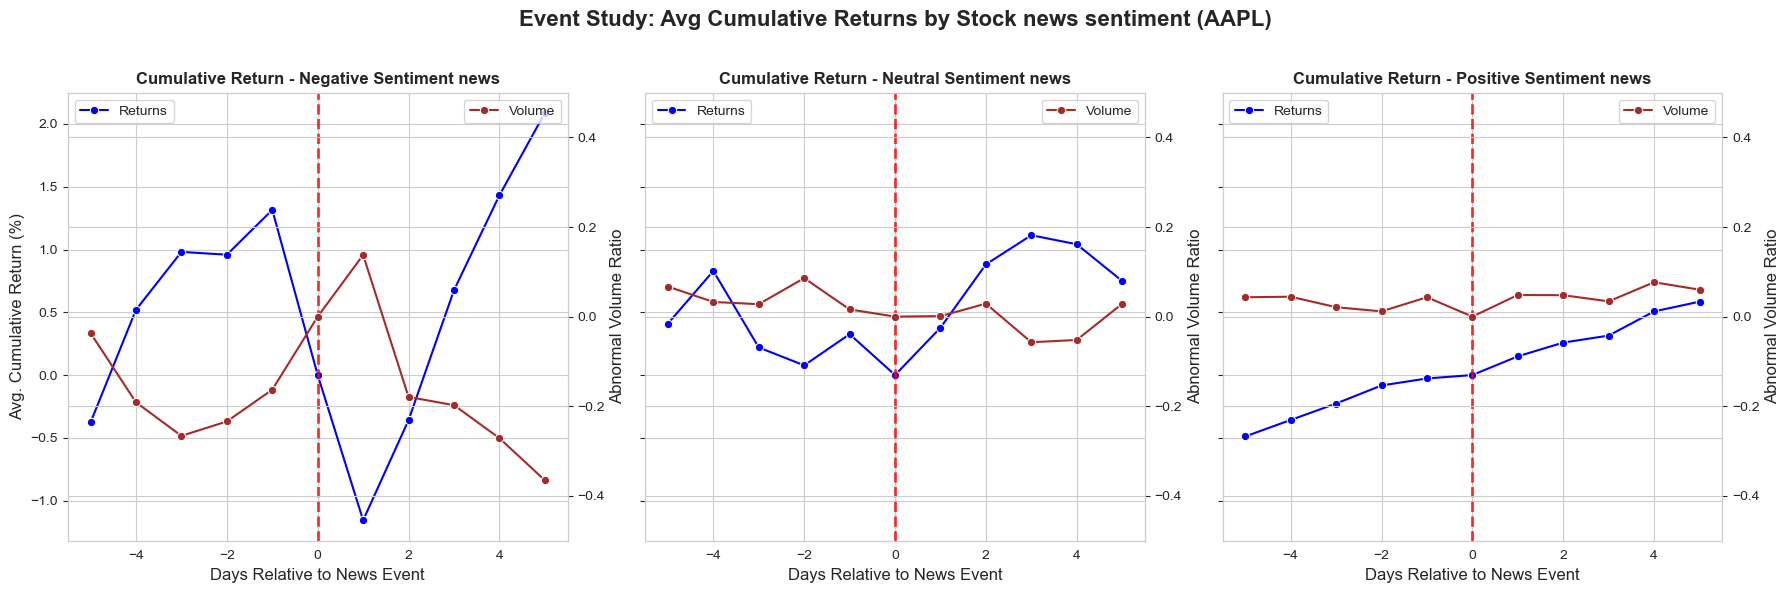

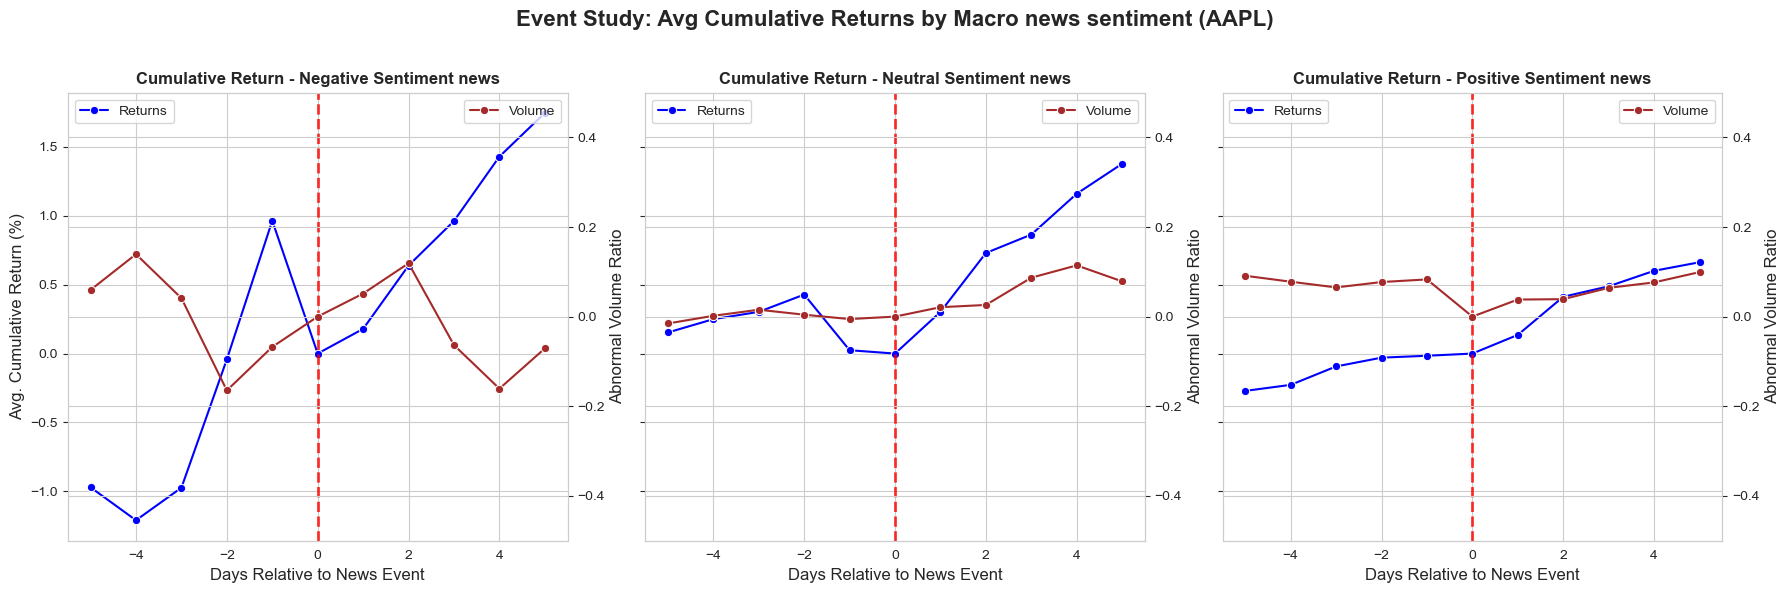

In [68]:
apple_sentiment = apple_merged_df[['Company_weekday-date', 'Company_Fin_senti_score']].dropna(subset=['Company_weekday-date'])
apple_stock = apple_merged_df[['Date','Close','Volume']]
apple_macro = apple_merged_df[['Macro_weekday-date', 'Macro_Fin_senti_score']].dropna(subset=['Macro_weekday-date'])

# --- STEP 1: Define a function to generate event windows and plot results ---
def generate_event_windows_and_plot(sentiment_df, stock_df, sentiment_col, date_col):
    # --- STEP 2: Define the event window ---
    pre_window = 5    # days before the event
    post_window = 5   # days after the event
    window = range(-pre_window, post_window + 1)

    # --- STEP 3: Extract event windows for each news event ---
    event_windows = []

    for idx, event in sentiment_df.iterrows():
        event_date = event[date_col]
        sentiment = event[sentiment_col]
        # Get the index of the event date in the stock data
        event_idx = stock_df[stock_df['Date'] == event_date].index[0]

        # Calculate the start and end index for the event window
        start_idx = max(0, event_idx - pre_window)
        end_idx = min(len(stock_df), event_idx + post_window + 1)

        # Create a list of dates covering the event window
        window_dates = stock_df.iloc[start_idx:end_idx]['Date'].tolist()

        # Get the stock prices on these dates
        event_stock = stock_df[stock_df['Date'].isin(window_dates)].copy()

        # Reindex to the full window so that every relative day is present
        event_stock = event_stock.set_index('Date').reindex(window_dates)

        # Skip this event if the event day price is missing (or handle missing data appropriately)
        base_price = event_stock.loc[event_date, 'Close']
        base_vol = event_stock.loc[event_date, 'Volume']

        # Calculate cumulative return for each day in the window relative to the event day price
        event_stock['cum_return'] = (event_stock['Close'] / base_price - 1) * 100  # in percentage
        event_stock['abn_vol'] = (event_stock['Volume'] / base_vol - 1)

        # Record the results along with the relative day and sentiment
        for rel_day, (date_val, row) in zip(window, event_stock.iterrows()):
            event_windows.append({
                'rel_day': rel_day,
                'cum_return': row['cum_return'],
                'abn_vol_ratio': row['abn_vol'],
                'sentiment': sentiment
            })

    # Create a DataFrame from the event window data
    event_df = pd.DataFrame(event_windows)

    # --- STEP 4: Analyse the Event Study Data ---
    # Option 1: Average across all events
    avg_event = event_df.groupby('rel_day')[['cum_return', 'abn_vol_ratio']].mean().reset_index()

    # Option 2: Alternatively, you might wish to compare groups (e.g. positive vs. negative sentiment)
    event_df['sentiment_label'] = np.where(event_df['sentiment'] > 0.4, 'Positive',
                                           np.where(event_df['sentiment'] < -0.4, 'Negative', 'Neutral'))
    avg_event_by_sentiment = event_df.groupby(['rel_day', 'sentiment_label'])[['cum_return', 'abn_vol_ratio']].mean().reset_index()

    # --- STEP 5: Plot the Results ---
    sns.set_style("whitegrid")
    sns.set_palette("colorblind")  # Use colorblind-friendly colors

    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

    # Define y-axis range adjustments for better scaling
    y_ranges = {'Negative': (-0.5, 0.5), 'Neutral': (-0.5, 0.5), 'Positive': (-0.5, 0.5)}

    for ax, label in zip(axes, avg_event_by_sentiment['sentiment_label'].unique()):
        grp = avg_event_by_sentiment[avg_event_by_sentiment['sentiment_label'] == label]

        # Plot cumulative returns
        sns.lineplot(x=grp['rel_day'], y=grp['cum_return'], marker='o', ax=ax, label='Returns', color='blue')

        # Create secondary y-axis for volume
        ax2 = ax.twinx()
        sns.lineplot(x=grp['rel_day'], y=grp['abn_vol_ratio'], marker='o', ax=ax2, label='Volume', color='brown')

        # Format axes
        ax.set_xlabel('Days Relative to News Event', fontsize=12)
        ax.set_ylabel('Avg. Cumulative Return (%)', fontsize=12)
        ax.set_title(f'Cumulative Return - {label} Sentiment news', fontsize=12, fontweight='bold')

        ax2.set_ylabel('Abnormal Volume Ratio', fontsize=12)

        # Set y-axis limits for better scaling
        if label in y_ranges:
            ax2.set_ylim(y_ranges[label])

        # Add event day vertical line
        ax.axvline(x=0, color='red', linestyle='--', lw=2, alpha=0.8)

        # Improve legend placement
        ax.legend(loc='upper left', fontsize=10, frameon=True)
        ax2.legend(loc='upper right', fontsize=10, frameon=True)

    # Improve spacing & title
        if sentiment_col == 'Company_Fin_senti_score':
            plt.suptitle('Event Study: Avg Cumulative Returns by Stock news sentiment (AAPL)', fontsize=16, fontweight='bold')
        else:
            plt.suptitle('Event Study: Avg Cumulative Returns by Macro news sentiment (AAPL)', fontsize=16, fontweight='bold')
        plt.tight_layout(rect=[0, 0, 1, 0.96])

    plt.show()

# Generate charts for apple_sentiment and apple_stock
generate_event_windows_and_plot(apple_sentiment, apple_stock, 'Company_Fin_senti_score', 'Company_weekday-date')

# Generate charts for apple_macro and apple_stock
generate_event_windows_and_plot(apple_macro, apple_stock, 'Macro_Fin_senti_score', 'Macro_weekday-date')

<div style="
    background-color: #e8f8e8;
    border: 1px solid #efffe8;
    border-left: 20px solid #7dbf7d;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
    <li><b>Apple Event Study Insights:</b></li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Negative news causes a dip (~0.5%) 1 day post article, but gains back by Day 3.</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Overall, consistently positive drift for neutral and positive news.(~1% in 5 days)</li>    
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Negative Macro news causes ~0.5% dip, is otherwise resilient and stable.</li>      
    </ul>
</div>

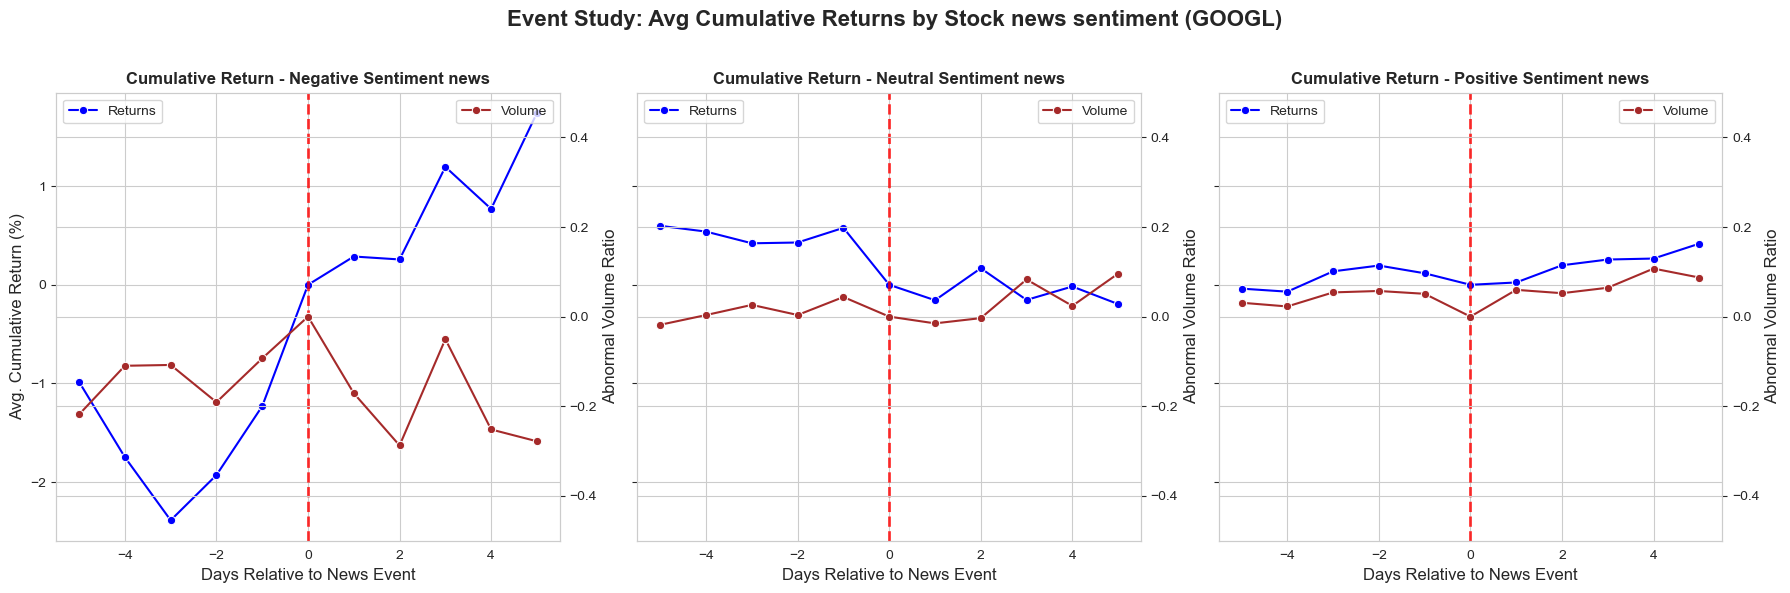

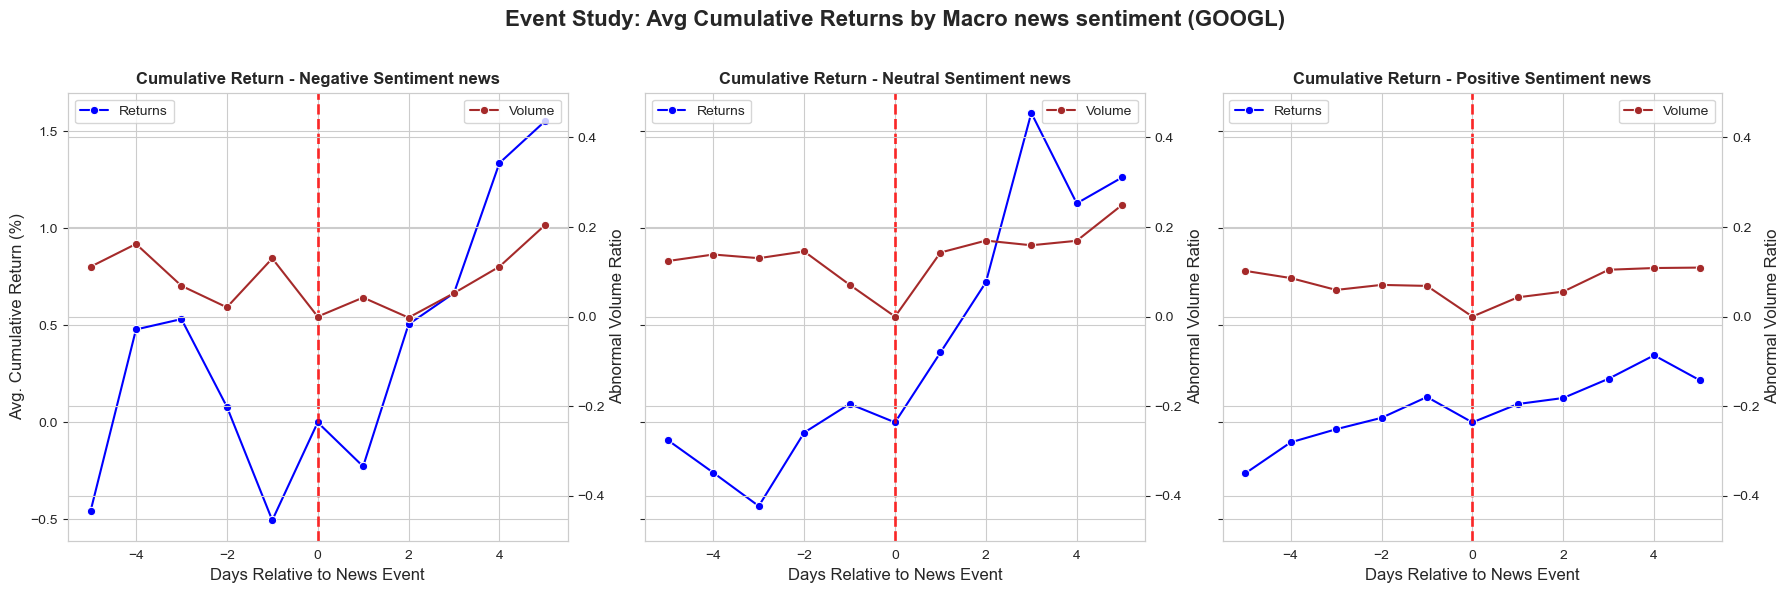

In [69]:
goog_sentiment = goog_merged_df[['Company_weekday-date', 'Company_Fin_senti_score']].dropna(subset=['Company_weekday-date'])
goog_stock = goog_merged_df[['Date','Close','Volume']]
goog_macro = goog_merged_df[['Macro_weekday-date', 'Macro_Fin_senti_score']].dropna(subset=['Macro_weekday-date'])

# --- STEP 1: Define a function to generate event windows and plot results ---
def generate_event_windows_and_plot(sentiment_df, stock_df, sentiment_col, date_col):
    # --- STEP 2: Define the event window ---
    pre_window = 5    # days before the event
    post_window = 5   # days after the event
    window = range(-pre_window, post_window + 1)

    # --- STEP 3: Extract event windows for each news event ---
    event_windows = []

    for idx, event in sentiment_df.iterrows():
        event_date = event[date_col]
        sentiment = event[sentiment_col]
        # Get the index of the event date in the stock data
        event_idx = stock_df[stock_df['Date'] == event_date].index[0]

        # Calculate the start and end index for the event window
        start_idx = max(0, event_idx - pre_window)
        end_idx = min(len(stock_df), event_idx + post_window + 1)

        # Create a list of dates covering the event window
        window_dates = stock_df.iloc[start_idx:end_idx]['Date'].tolist()

        # Get the stock prices on these dates
        event_stock = stock_df[stock_df['Date'].isin(window_dates)].copy()

        # Reindex to the full window so that every relative day is present
        event_stock = event_stock.set_index('Date').reindex(window_dates)

        # Skip this event if the event day price is missing (or handle missing data appropriately)
        base_price = event_stock.loc[event_date, 'Close']
        base_vol = event_stock.loc[event_date, 'Volume']

        # Calculate cumulative return for each day in the window relative to the event day price
        event_stock['cum_return'] = (event_stock['Close'] / base_price - 1) * 100  # in percentage
        event_stock['abn_vol'] = (event_stock['Volume'] / base_vol - 1)

        # Record the results along with the relative day and sentiment
        for rel_day, (date_val, row) in zip(window, event_stock.iterrows()):
            event_windows.append({
                'rel_day': rel_day,
                'cum_return': row['cum_return'],
                'abn_vol_ratio': row['abn_vol'],
                'sentiment': sentiment
            })

    # Create a DataFrame from the event window data
    event_df = pd.DataFrame(event_windows)

    # --- STEP 4: Analyse the Event Study Data ---
    # Option 1: Average across all events
    avg_event = event_df.groupby('rel_day')[['cum_return', 'abn_vol_ratio']].mean().reset_index()

    # Option 2: Alternatively, you might wish to compare groups (e.g. positive vs. negative sentiment)
    event_df['sentiment_label'] = np.where(event_df['sentiment'] > 0.2, 'Positive',
                                           np.where(event_df['sentiment'] < -0.2, 'Negative', 'Neutral'))
    avg_event_by_sentiment = event_df.groupby(['rel_day', 'sentiment_label'])[['cum_return', 'abn_vol_ratio']].mean().reset_index()

    # --- STEP 5: Plot the Results ---
    sns.set_style("whitegrid")
    sns.set_palette("colorblind")  # Use colorblind-friendly colors

    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

    # Define y-axis range adjustments for better scaling
    y_ranges = {'Negative': (-0.5, 0.5), 'Neutral': (-0.5, 0.5), 'Positive': (-0.5, 0.5)}

    for ax, label in zip(axes, avg_event_by_sentiment['sentiment_label'].unique()):
        grp = avg_event_by_sentiment[avg_event_by_sentiment['sentiment_label'] == label]

        # Plot cumulative returns
        sns.lineplot(x=grp['rel_day'], y=grp['cum_return'], marker='o', ax=ax, label='Returns', color='blue')

        # Create secondary y-axis for volume
        ax2 = ax.twinx()
        sns.lineplot(x=grp['rel_day'], y=grp['abn_vol_ratio'], marker='o', ax=ax2, label='Volume', color='brown')

        # Format axes
        ax.set_xlabel('Days Relative to News Event', fontsize=12)
        ax.set_ylabel('Avg. Cumulative Return (%)', fontsize=12)
        ax.set_title(f'Cumulative Return - {label} Sentiment news', fontsize=12, fontweight='bold')

        ax2.set_ylabel('Abnormal Volume Ratio', fontsize=12)

        # Set y-axis limits for better scaling
        if label in y_ranges:
            ax2.set_ylim(y_ranges[label])

        # Add event day vertical line
        ax.axvline(x=0, color='red', linestyle='--', lw=2, alpha=0.8)

        # Improve legend placement
        ax.legend(loc='upper left', fontsize=10, frameon=True)
        ax2.legend(loc='upper right', fontsize=10, frameon=True)

    # Improve spacing & title
        if sentiment_col == 'Company_Fin_senti_score':
            plt.suptitle('Event Study: Avg Cumulative Returns by Stock news sentiment (GOOGL)', fontsize=16, fontweight='bold')
        else:
            plt.suptitle('Event Study: Avg Cumulative Returns by Macro news sentiment (GOOGL)', fontsize=16, fontweight='bold')
        plt.tight_layout(rect=[0, 0, 1, 0.96])

    plt.show()

# Generate charts for goog_sentiment and goog_stock
generate_event_windows_and_plot(goog_sentiment, goog_stock, 'Company_Fin_senti_score', 'Company_weekday-date')

# Generate charts for goog_macro and goog_stock
generate_event_windows_and_plot(goog_macro, goog_stock, 'Macro_Fin_senti_score', 'Macro_weekday-date')

<div style="
    background-color: #e8f8e8;
    border: 1px solid #efffe8;
    border-left: 20px solid #7dbf7d;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
    <li><b>Google Event Study Insights:</b></li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Negative news effect is less and is overall more stable compared to Apple</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Return fluctuations stable – within 1% window for Neutral and Positive news.</li>    
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Negative Macro news improves returns, probably because market is down and Google is considered a safer investment.</li>      
    </ul>
</div>

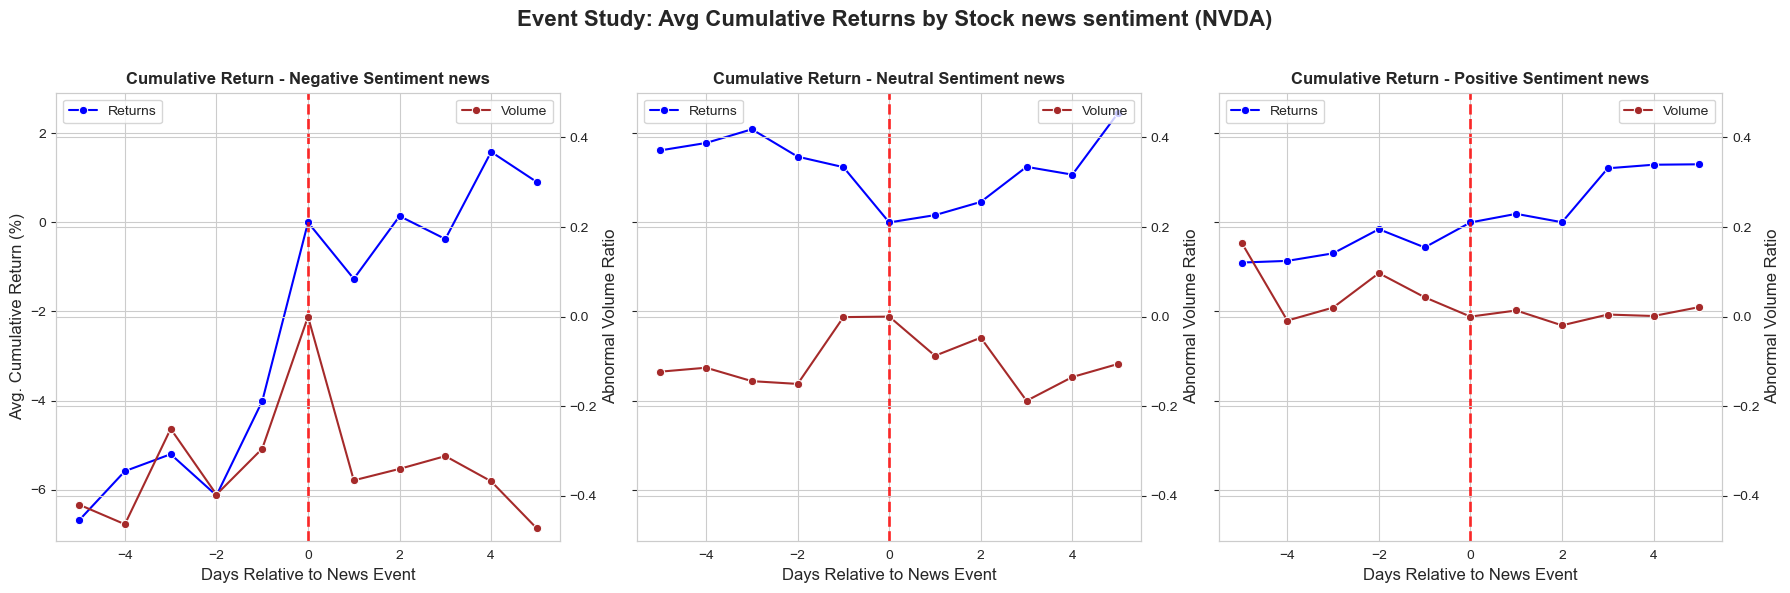

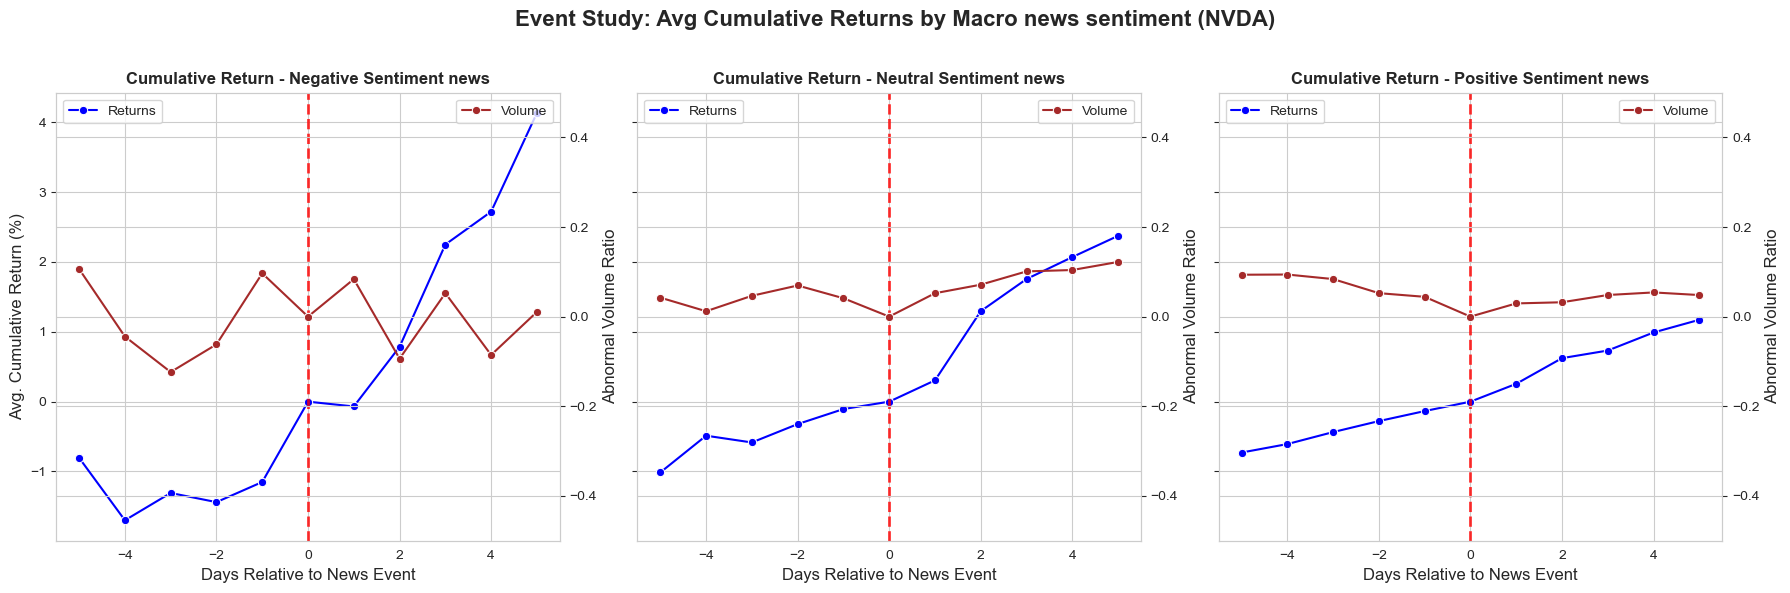

In [70]:
nvda_sentiment = nvda_merged_df[['Company_weekday-date', 'Company_Fin_senti_score']].dropna(subset=['Company_weekday-date'])
nvda_stock = nvda_merged_df[['Date','Close','Volume']]
nvda_macro = nvda_merged_df[['Macro_weekday-date', 'Macro_Fin_senti_score']].dropna(subset=['Macro_weekday-date'])

# --- STEP 1: Define a function to generate event windows and plot results ---
def generate_event_windows_and_plot(sentiment_df, stock_df, sentiment_col, date_col):
    # --- STEP 2: Define the event window ---
    pre_window = 5    # days before the event
    post_window = 5   # days after the event
    window = range(-pre_window, post_window + 1)

    # --- STEP 3: Extract event windows for each news event ---
    event_windows = []

    for idx, event in sentiment_df.iterrows():
        event_date = event[date_col]
        sentiment = event[sentiment_col]
        # Get the index of the event date in the stock data
        event_idx = stock_df[stock_df['Date'] == event_date].index[0]

        # Calculate the start and end index for the event window
        start_idx = max(0, event_idx - pre_window)
        end_idx = min(len(stock_df), event_idx + post_window + 1)

        # Create a list of dates covering the event window
        window_dates = stock_df.iloc[start_idx:end_idx]['Date'].tolist()

        # Get the stock prices on these dates
        event_stock = stock_df[stock_df['Date'].isin(window_dates)].copy()

        # Reindex to the full window so that every relative day is present
        event_stock = event_stock.set_index('Date').reindex(window_dates)

        # Skip this event if the event day price is missing (or handle missing data appropriately)
        base_price = event_stock.loc[event_date, 'Close']
        base_vol = event_stock.loc[event_date, 'Volume']

        # Calculate cumulative return for each day in the window relative to the event day price
        event_stock['cum_return'] = (event_stock['Close'] / base_price - 1) * 100  # in percentage
        event_stock['abn_vol'] = (event_stock['Volume'] / base_vol - 1)

        # Record the results along with the relative day and sentiment
        for rel_day, (date_val, row) in zip(window, event_stock.iterrows()):
            event_windows.append({
                'rel_day': rel_day,
                'cum_return': row['cum_return'],
                'abn_vol_ratio': row['abn_vol'],
                'sentiment': sentiment
            })

    # Create a DataFrame from the event window data
    event_df = pd.DataFrame(event_windows)

    # --- STEP 4: Analyse the Event Study Data ---
    # Option 1: Average across all events
    avg_event = event_df.groupby('rel_day')[['cum_return', 'abn_vol_ratio']].mean().reset_index()

    # Option 2: Alternatively, you might wish to compare groups (e.g. positive vs. negative sentiment)
    event_df['sentiment_label'] = np.where(event_df['sentiment'] > 0.4, 'Positive',
                                           np.where(event_df['sentiment'] < -0.4, 'Negative', 'Neutral'))
    avg_event_by_sentiment = event_df.groupby(['rel_day', 'sentiment_label'])[['cum_return', 'abn_vol_ratio']].mean().reset_index()

    # --- STEP 5: Plot the Results ---
    sns.set_style("whitegrid")
    sns.set_palette("colorblind")  # Use colorblind-friendly colors

    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

    # Define y-axis range adjustments for better scaling
    y_ranges = {'Negative': (-0.5, 0.5), 'Neutral': (-0.5, 0.5), 'Positive': (-0.5, 0.5)}

    for ax, label in zip(axes, avg_event_by_sentiment['sentiment_label'].unique()):
        grp = avg_event_by_sentiment[avg_event_by_sentiment['sentiment_label'] == label]

        # Plot cumulative returns
        sns.lineplot(x=grp['rel_day'], y=grp['cum_return'], marker='o', ax=ax, label='Returns', color='blue')

        # Create secondary y-axis for volume
        ax2 = ax.twinx()
        sns.lineplot(x=grp['rel_day'], y=grp['abn_vol_ratio'], marker='o', ax=ax2, label='Volume', color='brown')

        # Format axes
        ax.set_xlabel('Days Relative to News Event', fontsize=12)
        ax.set_ylabel('Avg. Cumulative Return (%)', fontsize=12)
        ax.set_title(f'Cumulative Return - {label} Sentiment news', fontsize=12, fontweight='bold')

        ax2.set_ylabel('Abnormal Volume Ratio', fontsize=12)

        # Set y-axis limits for better scaling
        if label in y_ranges:
            ax2.set_ylim(y_ranges[label])

        # Add event day vertical line
        ax.axvline(x=0, color='red', linestyle='--', lw=2, alpha=0.8)

        # Improve legend placement
        ax.legend(loc='upper left', fontsize=10, frameon=True)
        ax2.legend(loc='upper right', fontsize=10, frameon=True)

    # Improve spacing & title
        if sentiment_col == 'Company_Fin_senti_score':
            plt.suptitle('Event Study: Avg Cumulative Returns by Stock news sentiment (NVDA)', fontsize=16, fontweight='bold')
        else:
            plt.suptitle('Event Study: Avg Cumulative Returns by Macro news sentiment (NVDA)', fontsize=16, fontweight='bold')
        plt.tight_layout(rect=[0, 0, 1, 0.96])

    plt.show()

# Generate charts for nvda_sentiment and nvda_stock
generate_event_windows_and_plot(nvda_sentiment, nvda_stock, 'Company_Fin_senti_score', 'Company_weekday-date')

# Generate charts for nvda_macro and nvda_stock
generate_event_windows_and_plot(nvda_macro, nvda_stock, 'Macro_Fin_senti_score', 'Macro_weekday-date')

<div style="
    background-color: #e8f8e8;
    border: 1px solid #efffe8;
    border-left: 20px solid #7dbf7d;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
    <li><b>NVIDIA Event Study Insights:</b></li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Most sensitive to News Sentiment (Positive and Negative).</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Sentiment effect seen on Event to Event+2 days.</li>    
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Returns fluctuating at a high level compared to other stocks (+2%-3%)</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Strong positives on negative macro news (~2% over 4 days)</li>         
    </ul>
</div>

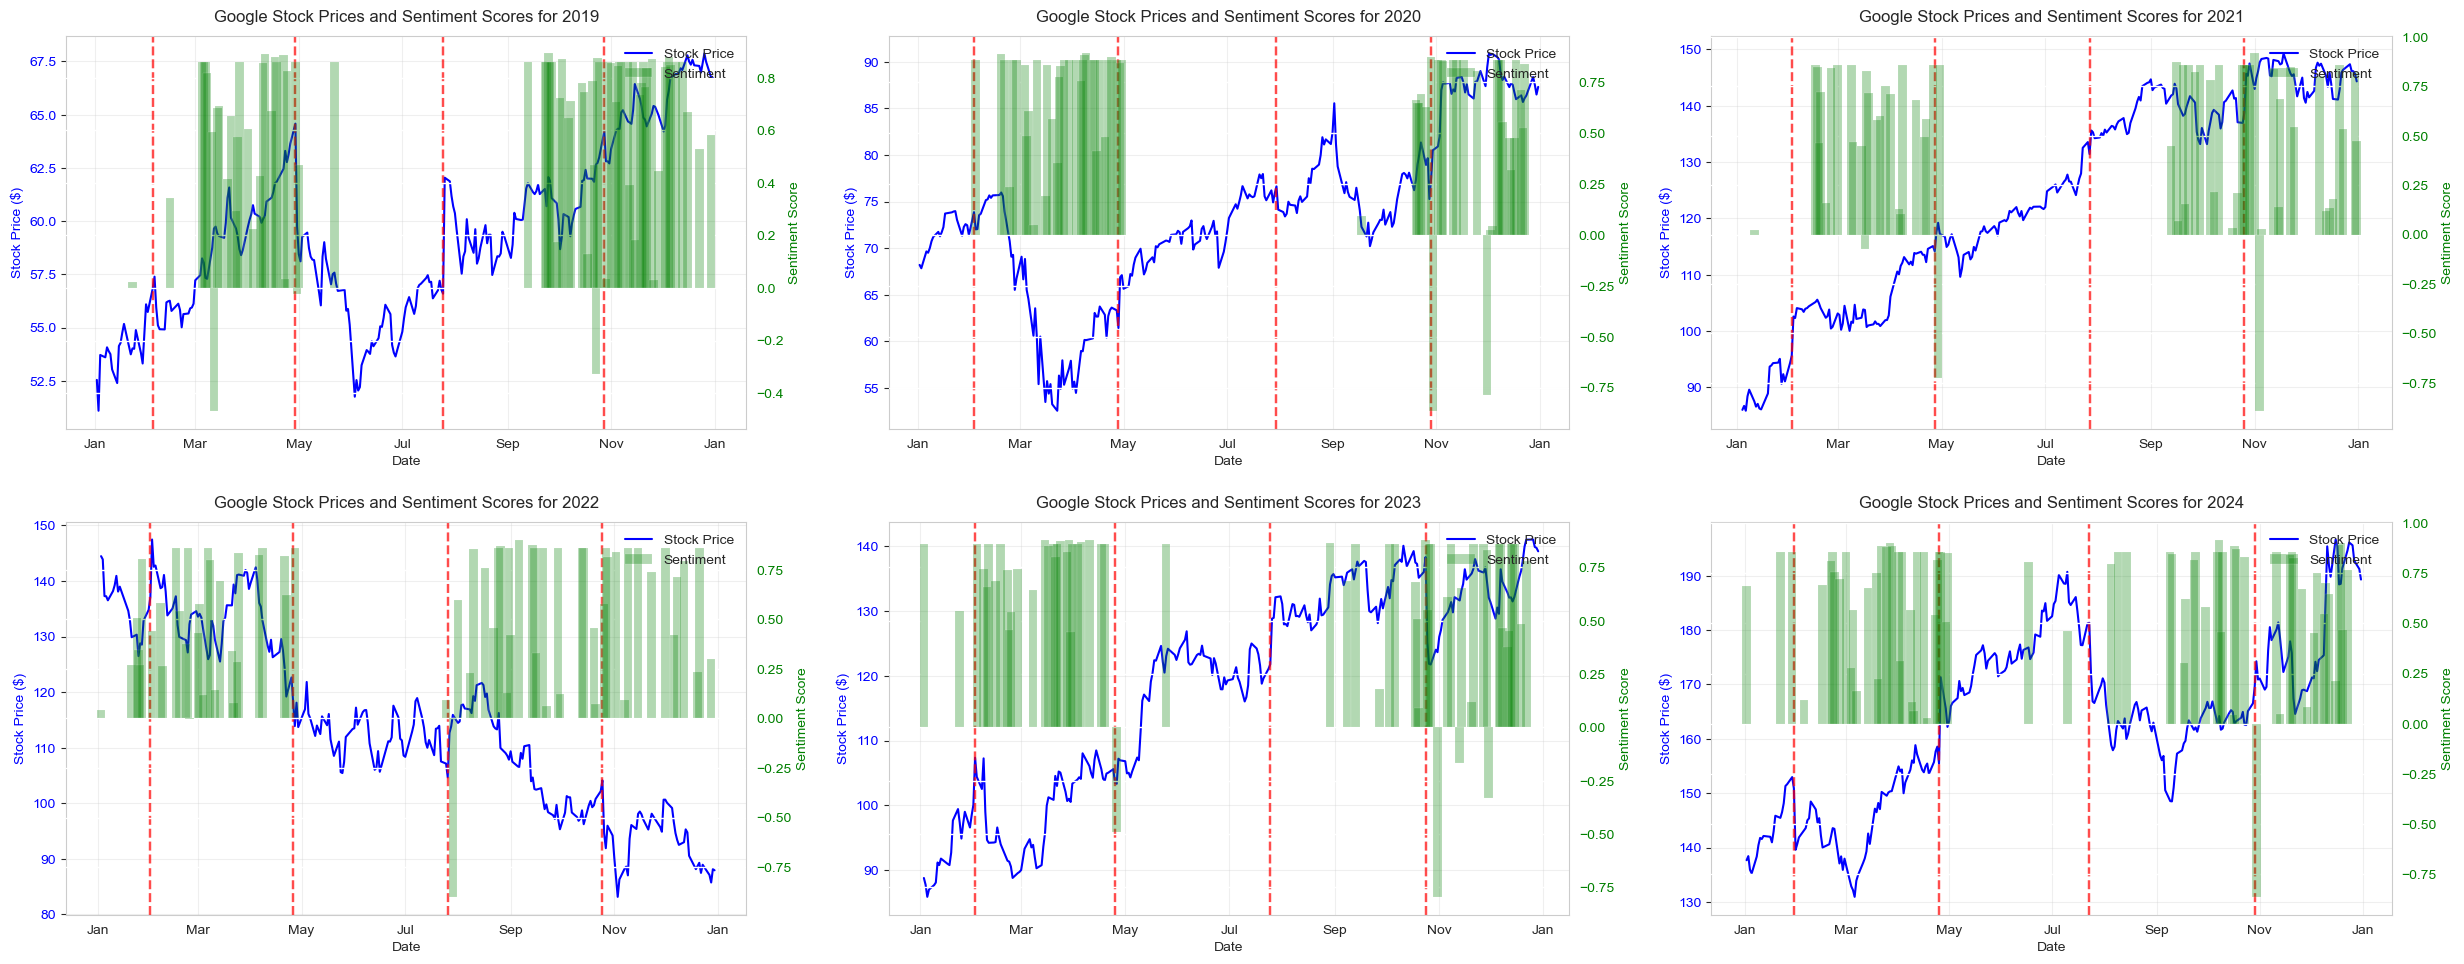

In [71]:
import matplotlib.dates as mdates

# Extract unique years from the data
years = goog_merged_df['Date'].dt.year.unique()

# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(25, 10), sharex=False, sharey=False)
axes = axes.flatten()

# Set style for better visualization
plt.style.use('seaborn')

# Loop through each year and plot the data
for i, year in enumerate(years):
    ax1 = axes[i]
    yearly_data = goog_merged_df[goog_merged_df['Date'].dt.year == year]
    
    # Plot the closing prices
    ax1.plot(yearly_data['Date'], yearly_data['Close'], 
             color='blue', label='Stock Price', linewidth=1.5)
    
    # Create bars for sentiment scores
    ax2 = ax1.twinx()
    ax2.bar(yearly_data['Date'], yearly_data['Company_Fin_senti_score'],
            alpha=0.3, color='green', label='Sentiment', width=5)  # width adjusts bar thickness
    
    # Add vertical lines for earnings report dates
    for idx, row in yearly_data.iterrows():
        if row['earnings_reported_flag'] == 1:
            ax1.axvline(x=row['Date'], color='red', linestyle='--', alpha=0.7)
    
    # Improve formatting and labels
    ax1.set_title(f'Google Stock Prices and Sentiment Scores for {year}', 
                  fontsize=12, pad=10)
    ax1.set_xlabel('Date', fontsize=10)
    ax1.set_ylabel('Stock Price ($)', fontsize=10, color='blue')
    ax2.set_ylabel('Sentiment Score', fontsize=10, color='green')
    
    # Customize tick parameters
    ax1.tick_params(axis='y', labelcolor='blue')
    ax2.tick_params(axis='y', labelcolor='green')
    
    # Format date axis
    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    
    # Add gridlines for better readability
    ax1.grid(True, alpha=0.3)
    
    # Adjust legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Adjust layout to prevent overlapping
plt.tight_layout(pad=2.0)

# Show the plot
plt.show()

In [72]:
apple_df= apple_merged_df.copy()
apple_df.set_index('Date',inplace=True)

google_df = goog_merged_df.copy()
google_df.set_index('Date',inplace=True)

nvidia_df = nvda_merged_df.copy()
nvidia_df.set_index('Date',inplace=True)

<div style="
    background-color: #fffbea;
    border: 1px solid #d6d6d6;
    border-left: 20px solid #ffcc00;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li>Based on the earlier insights from the event study, trialing a representation of sentiment trends in a 5 day window around earnings announcements</li>
    <li><b>Earnings Announcments Event - Sentiment Analysis:</b></li>
    </ul>
</div>

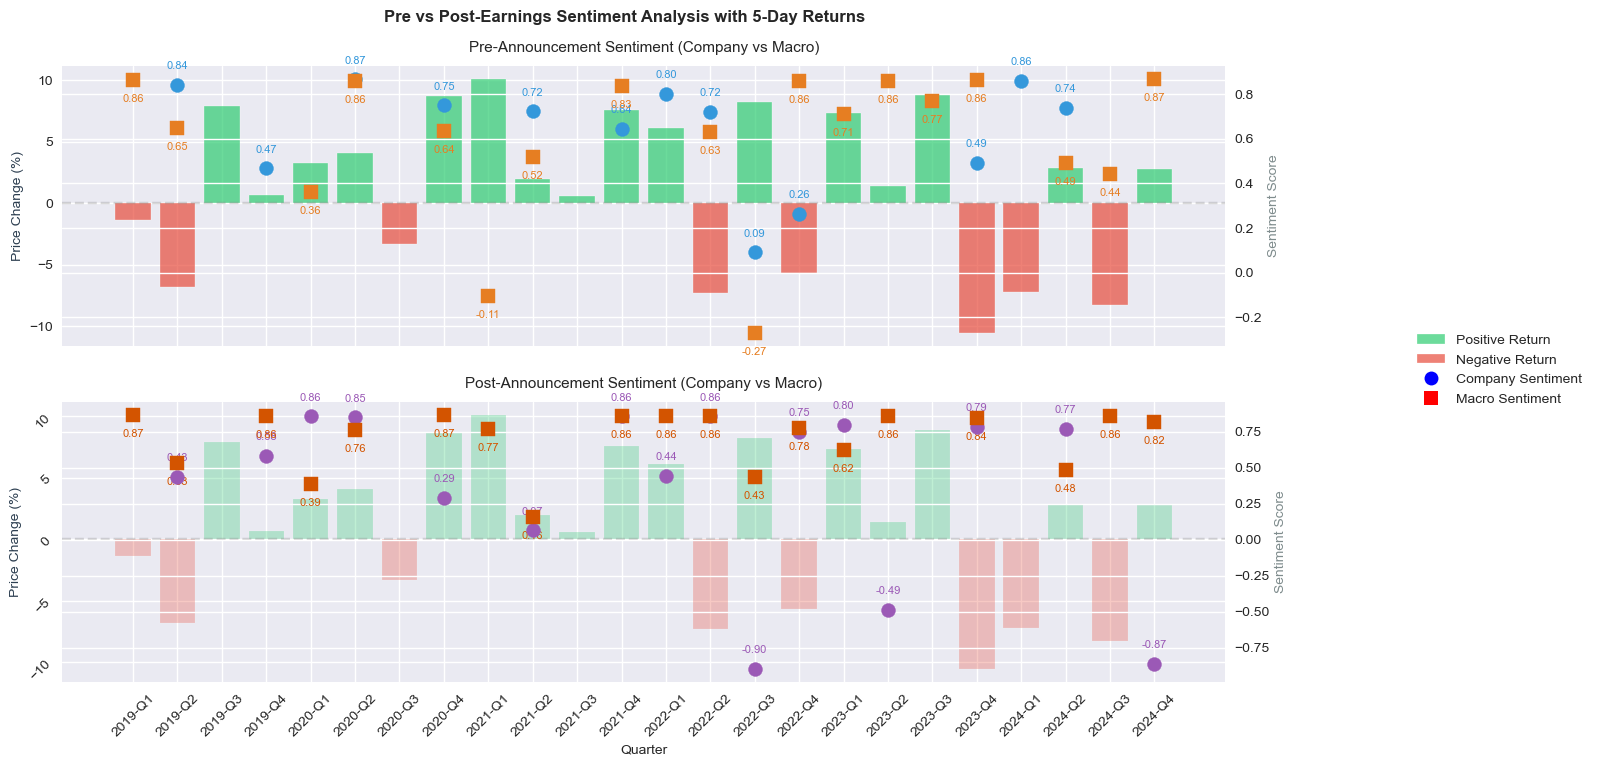

In [73]:
from datetime import timedelta

def process_stock_data(df):
    """
    Process daily stock data to calculate earnings impact and prepare visualization data
    
    Parameters:
    df: pandas DataFrame with columns: 
        - Date (index)
        - Open, High, Low, Close, Volume
        - earnings_reported_flag (boolean/int)
        - Company_Fin_senti_score (float, optional)
        - Macro_Fin_senti_score (float, optional)
    """
    # Create a copy to avoid modifying original data
    df = df.copy()
    
    # Ensure date is index and sorted
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    
    # Calculate daily returns
    df['daily_return'] = df['Close'].pct_change()
    
    # Process earnings announcements
    earnings_dates = df[df['earnings_reported_flag'] == 1].index
    earnings_impact = []
    
    # Calculate price impact around earnings
    for date in earnings_dates:
        try:
            # Get data for 5 days before and after earnings
            start_date = date - timedelta(days=5)
            end_date = date + timedelta(days=5)
            event_window = df.loc[start_date:end_date]
            
            # Calculate cumulative return after announcement
            post_earning_return = event_window.loc[date:end_date, 'daily_return'].cumsum().iloc[-1]
            
            # Initialize sentiment scores
            pre_company_sentiment = 0
            post_company_sentiment = 0
            pre_macro_sentiment = 0
            post_macro_sentiment = 0
            
            # Calculate company sentiment scores if column exists
            if 'Company_Fin_senti_score' in df.columns:
                # Pre-earnings company sentiment
                pre_window = event_window.loc[start_date:date]
                if not pre_window['Company_Fin_senti_score'].empty:
                    pre_company_sentiment = pre_window['Company_Fin_senti_score'].mean()
                
                # Post-earnings company sentiment
                post_window = event_window.loc[date:end_date]
                if not post_window['Company_Fin_senti_score'].empty:
                    post_company_sentiment = post_window['Company_Fin_senti_score'].mean()
            
            # Calculate macro sentiment scores if column exists
            if 'Macro_Fin_senti_score' in df.columns:
                # Pre-earnings macro sentiment
                if not pre_window['Macro_Fin_senti_score'].empty:
                    pre_macro_sentiment = pre_window['Macro_Fin_senti_score'].mean()
                
                # Post-earnings macro sentiment
                if not post_window['Macro_Fin_senti_score'].empty:
                    post_macro_sentiment = post_window['Macro_Fin_senti_score'].mean()
            
            earnings_impact.append({
                'date': date,
                'quarter': date.to_period('Q').strftime('%Y-Q%q'),
                'price_change': post_earning_return * 100,  # Convert to percentage
                'pre_sentiment': pre_company_sentiment,
                'post_sentiment': post_company_sentiment,
                'pre_macro_sentiment': pre_macro_sentiment,
                'post_macro_sentiment': post_macro_sentiment,
                'volume': event_window.loc[date, 'Volume']
            })
            
        except Exception as e:
            print(f"Error processing date {date}: {str(e)}")
            continue
    
    earnings_df = pd.DataFrame(earnings_impact)
    return earnings_df

def create_earnings_impact_plot(earnings_df, figsize=(15, 8)):
    """
    Create visualization with refined styling and improved markers
    """
    # Set the style
    sns.set_style("darkgrid")
    
    # Create figure and axis objects with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize, height_ratios=[1, 1], gridspec_kw={'hspace': 0.2})
    
    # Plot bars for price change in both subplots (faded in second)
    bars1 = ax1.bar(earnings_df['quarter'], earnings_df['price_change'], 
                   color=np.where(earnings_df['price_change'] >= 0, '#2ecc71', '#e74c3c'),
                   alpha=0.7)
    bars2 = ax2.bar(earnings_df['quarter'], earnings_df['price_change'], 
                    color=np.where(earnings_df['price_change'] >= 0, '#2ecc71', '#e74c3c'),
                    alpha=0.3)
    
    # Create second y-axis for sentiment in both subplots
    ax1_sent = ax1.twinx()
    ax2_sent = ax2.twinx()
    
    # Plot Pre-Announcement Sentiments (top subplot)
    scatter_pre_company = ax1_sent.scatter(earnings_df['quarter'], earnings_df['pre_sentiment'], 
                                         color='#3498db', s=100, zorder=5, marker='o', label='Company Pre-Earnings')
    scatter_pre_macro = ax1_sent.scatter(earnings_df['quarter'], earnings_df['pre_macro_sentiment'], 
                                       color='#e67e22', s=100, zorder=5, marker='s', label='Macro Pre-Earnings')
    
    # Plot Post-Announcement Sentiments (bottom subplot) - changed markers
    scatter_post_company = ax2_sent.scatter(earnings_df['quarter'], earnings_df['post_sentiment'], 
                                          color='#9b59b6', s=100, zorder=5, marker='o', label='Company Post-Earnings')
    scatter_post_macro = ax2_sent.scatter(earnings_df['quarter'], earnings_df['post_macro_sentiment'], 
                                        color='#d35400', s=100, zorder=5, marker='s', label='Macro Post-Earnings')
    
    # Add annotations for non-zero values
    for idx, row in earnings_df.iterrows():
        # Pre-announcement sentiment annotations (top subplot)
        if row['pre_sentiment'] != 0:
            ax1_sent.annotate(f'{row["pre_sentiment"]:.2f}', 
                            (row['quarter'], row['pre_sentiment']),
                            xytext=(0, 10), textcoords='offset points',
                            ha='center', va='bottom', color='#3498db', fontsize=8)
        if row['pre_macro_sentiment'] != 0:
            ax1_sent.annotate(f'{row["pre_macro_sentiment"]:.2f}', 
                            (row['quarter'], row['pre_macro_sentiment']),
                            xytext=(0, -10), textcoords='offset points',
                            ha='center', va='top', color='#e67e22', fontsize=8)
        
        # Post-announcement sentiment annotations (bottom subplot)
        if row['post_sentiment'] != 0:
            ax2_sent.annotate(f'{row["post_sentiment"]:.2f}', 
                            (row['quarter'], row['post_sentiment']),
                            xytext=(0, 10), textcoords='offset points',
                            ha='center', va='bottom', color='#9b59b6', fontsize=8)
        if row['post_macro_sentiment'] != 0:
            ax2_sent.annotate(f'{row["post_macro_sentiment"]:.2f}', 
                            (row['quarter'], row['post_macro_sentiment']),
                            xytext=(0, -10), textcoords='offset points',
                            ha='center', va='top', color='#d35400', fontsize=8)
    
    # Set labels and titles
    ax1.set_title('Pre-Announcement Sentiment (Company vs Macro)', pad=10, fontsize=11)
    ax2.set_title('Post-Announcement Sentiment (Company vs Macro)', pad=10, fontsize=11)
    
    ax1.set_ylabel('Price Change (%)', color='#2c3e50', fontsize=10)
    ax2.set_ylabel('Price Change (%)', color='#2c3e50', fontsize=10)
    ax2.set_xlabel('Quarter', fontsize=10)
    
    ax1_sent.set_ylabel('Sentiment Score', color='#7f8c8d', fontsize=10)
    ax2_sent.set_ylabel('Sentiment Score', color='#7f8c8d', fontsize=10)
    
    # Rotate x-axis labels
    ax1.tick_params(labelbottom=False)  # Hide x-labels for top subplot
    ax2.tick_params(rotation=45)
    
    # Add horizontal line at y=0
    ax1.axhline(y=0, color='gray', linestyle='--', alpha=0.3, zorder=1)
    ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.3, zorder=1)
    
    # Add legend with modified markers
    from matplotlib.lines import Line2D
    legend_elements = [
        plt.Rectangle((0,0),1,1, facecolor='#2ecc71', alpha=0.7, label='Positive Return'),
        plt.Rectangle((0,0),1,1, facecolor='#e74c3c', alpha=0.7, label='Negative Return'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Company Sentiment'),
        Line2D([0], [0], marker='s', color='w', markerfacecolor='red', markersize=10, label='Macro Sentiment')
    ]
    
    # Add legend outside the plot but closer
    fig.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=10)
    
    # Add main title closer to the plot
    plt.suptitle('Pre vs Post-Earnings Sentiment Analysis with 5-Day Returns', 
                y=0.95, fontsize=12, fontweight='bold')
    
    # Adjust layout with tighter spacing
    plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # Adjust the rect parameter to accommodate the legend
    
    return fig

earnings_df = process_stock_data(google_df)
fig = create_earnings_impact_plot(earnings_df)
plt.show()


<div style="
    background-color: #e8f8e8;
    border: 1px solid #efffe8;
    border-left: 20px solid #7dbf7d;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
    <li><b>Google Earnings Event Sentiment Trend Insights:</b></li>
    <li><b>Pre-Announcement Sentiment Trends:</b></li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Company Sentiment (blue dots) is generally positive (0.3-0.8), showing optimistic pre-earnings expectations.</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Macro Sentiment (orange squares) largely follows company sentiment but with some notable divergences,(2019-Q2 and 2021-Q4) </li>    
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> There's a consistent pattern of relatively high pre-earnings company sentiment, particularly strong in late 2020 through 2021 (around 0.75-0.80)</li>
    <li><b>Post-Announcement Sentiment Trends:</b></li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Company Sentiment (purple dots) shows a clear pattern of declining after earnings announcements, with some dramatic drops (e.g., 2022-Q2)</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> The magnitude of post-earnings sentiment decline varies significantly quarter to quarter</li>  
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Several instances of sharp negative sentiment after earnings (below -0.50) suggest Google often disappoints relative to pre-earnings expectations.</li>         
    </ul>
</div>

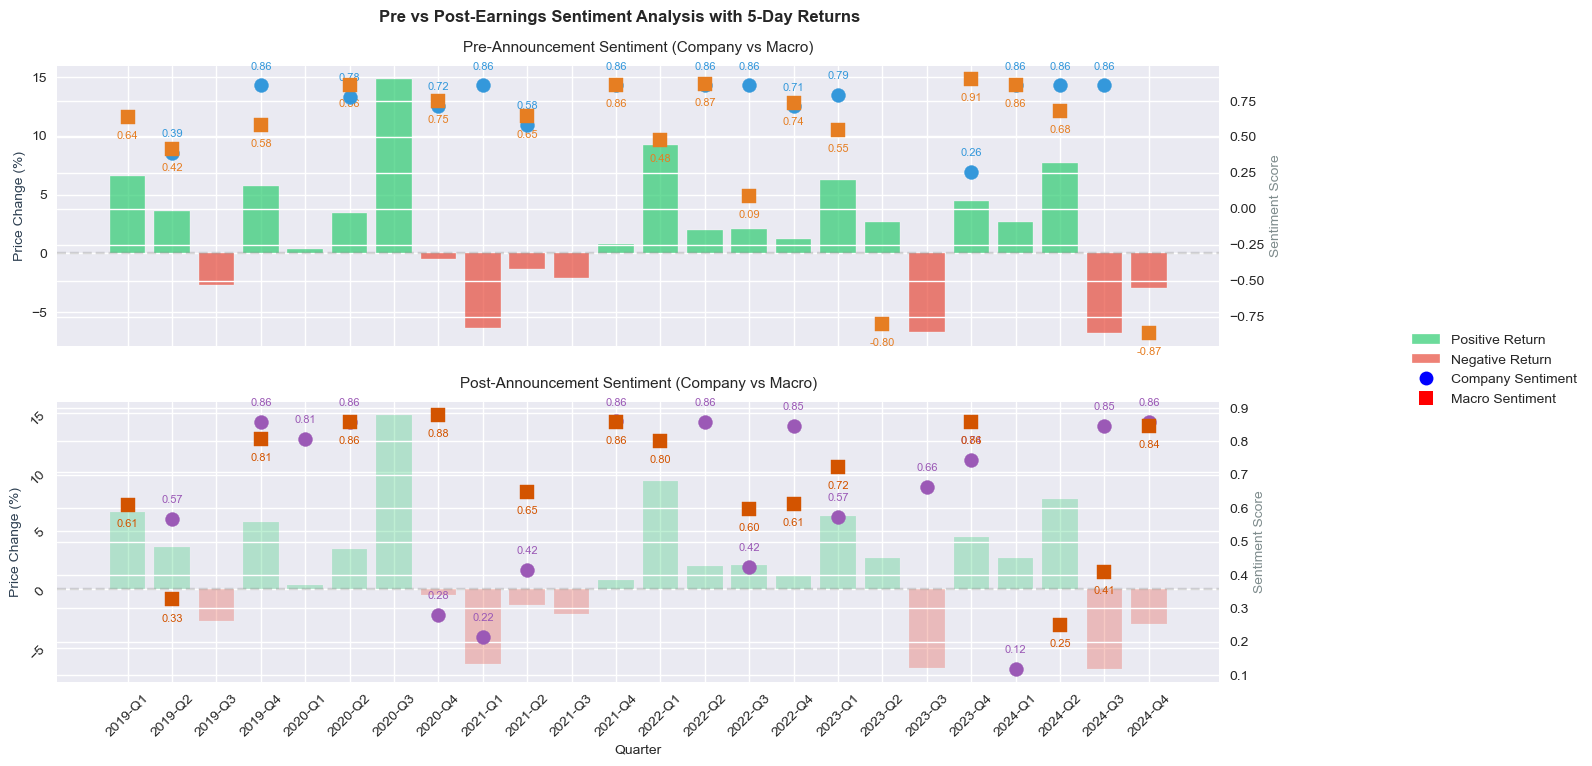

In [74]:
earnings_df = process_stock_data(apple_df)
fig = create_earnings_impact_plot(earnings_df)
plt.show()

<div style="
    background-color: #e8f8e8;
    border: 1px solid #efffe8;
    border-left: 20px solid #7dbf7d;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
    <li><b>Apple Earnings Event Sentiment Trend Insights:</b></li>
    <li><b>Pre-Announcement Sentiment Trends:</b></li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Company Sentiment (dots) around earnings period was not available for all quarters. 9/20 quarters shown here are missing company sentiment factors. Q3 (4 of 6), Q1 (3 of 6).</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Company and Macro Sentiment are mostly in the same trajectory, macro sentiment is more muted that Company. </li>    
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Pre-earnings company sentiment (blue dots) tends to be optimistically biased and it is very rare to see negative pre-earnings sentiment.</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> High pre-earnings sentiment doesn't reliably predict positive returns</li>    
    <li><b>Post-Announcement Sentiment Trends:</b></li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Company Sentiment (dots) 5 days post earnings announcement is mostly seen to go down compared to pre-earnings sentiment. </li>  
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> This reinforces the optimistic bias seen in the pre-earnings sentiments.</li>         
    </ul>
</div>

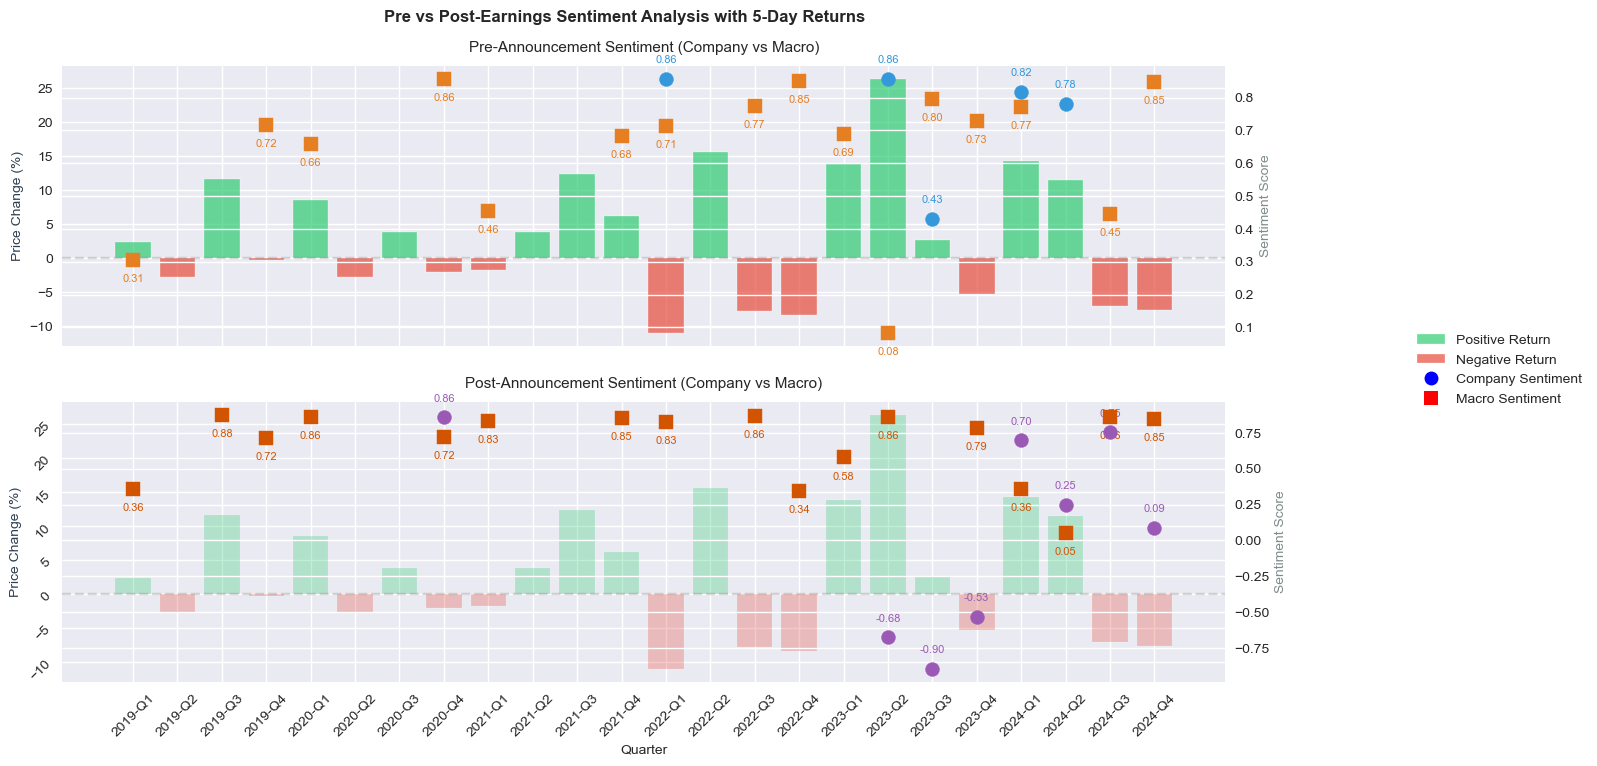

In [75]:
earnings_df = process_stock_data(nvidia_df)
fig = create_earnings_impact_plot(earnings_df)
plt.show()

<div style="
    background-color: #fffbea;
    border: 1px solid #d6d6d6;
    border-left: 20px solid #ffcc00;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
    <li><b>NVIDIA Earnings Event Sentiment Trend Insights:</b></li>
        <li>Extremely less company sentiment around quarterly earnings. Safer to not base analysis around earning announcments for NVIDIA. </li>
        <li><b>- Pre sentiment: Only 5/20 quarters have data</b></li>
        <li><b>- Post sentiment: Only 8/20 quarters have data</b></li>
    </ul>
</div>

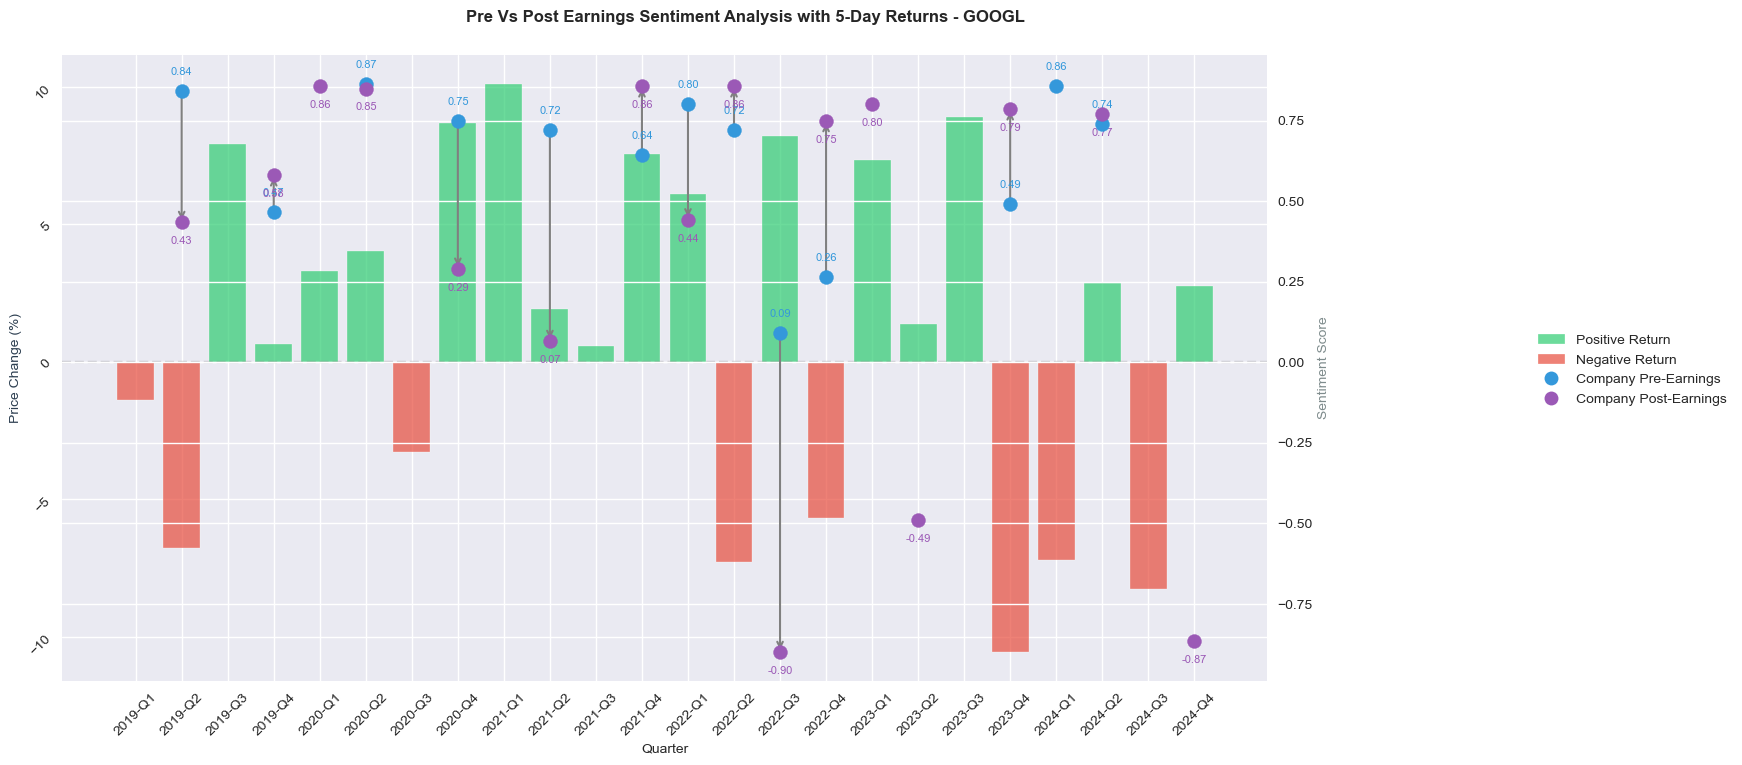

In [76]:
from matplotlib.lines import Line2D

def process_stock_data(df):
    """
    Process daily stock data to calculate earnings impact and prepare visualization data
    
    Parameters:
    df: pandas DataFrame with columns: 
        - Date (index)
        - Open, High, Low, Close, Volume
        - earnings_reported_flag (boolean/int)
        - Company_Fin_senti_score (float, optional)
        - Macro_Fin_senti_score (float, optional)
    """
    # Create a copy to avoid modifying original data
    df = df.copy()
    
    # Ensure date is index and sorted
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    
    # Calculate daily returns
    df['daily_return'] = df['Close'].pct_change()
    
    # Process earnings announcements
    earnings_dates = df[df['earnings_reported_flag'] == 1].index
    earnings_impact = []
    
    # Calculate price impact around earnings
    for date in earnings_dates:
        try:
            # Get data for 5 days before and after earnings
            start_date = date - timedelta(days=5)
            end_date = date + timedelta(days=5)
            event_window = df.loc[start_date:end_date]
            
            # Calculate cumulative return after announcement
            post_earning_return = event_window.loc[date:end_date, 'daily_return'].cumsum().iloc[-1]
            
            # Initialize sentiment scores
            pre_company_sentiment = 0
            post_company_sentiment = 0
            pre_macro_sentiment = 0
            post_macro_sentiment = 0
            
            # Calculate company sentiment scores if column exists
            if 'Company_Fin_senti_score' in df.columns:
                # Pre-earnings company sentiment
                pre_window = event_window.loc[start_date:date]
                if not pre_window['Company_Fin_senti_score'].empty:
                    pre_company_sentiment = pre_window['Company_Fin_senti_score'].mean()
                
                # Post-earnings company sentiment
                post_window = event_window.loc[date:end_date]
                if not post_window['Company_Fin_senti_score'].empty:
                    post_company_sentiment = post_window['Company_Fin_senti_score'].mean()
            
            # Calculate macro sentiment scores if column exists
            if 'Macro_Fin_senti_score' in df.columns:
                # Pre-earnings macro sentiment
                if not pre_window['Macro_Fin_senti_score'].empty:
                    pre_macro_sentiment = pre_window['Macro_Fin_senti_score'].mean()
                
                # Post-earnings macro sentiment
                if not post_window['Macro_Fin_senti_score'].empty:
                    post_macro_sentiment = post_window['Macro_Fin_senti_score'].mean()
            
            earnings_impact.append({
                'date': date,
                'quarter': date.to_period('Q').strftime('%Y-Q%q'),
                'price_change': post_earning_return * 100,  # Convert to percentage
                'pre_sentiment': pre_company_sentiment,
                'post_sentiment': post_company_sentiment,
                'pre_macro_sentiment': pre_macro_sentiment,
                'post_macro_sentiment': post_macro_sentiment,
                'volume': event_window.loc[date, 'Volume']
            })
            
        except Exception as e:
            print(f"Error processing date {date}: {str(e)}")
            continue
    
    earnings_df = pd.DataFrame(earnings_impact)
    return earnings_df


def create_earnings_impact_plot(earnings_df, figsize=(15, 8)):
    """
    Create visualization with refined styling and improved markers
    """
    # Set the style
    sns.set_style("darkgrid")
    
    # Create figure and axis objects
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot bars for price change
    bars = ax.bar(earnings_df['quarter'], earnings_df['price_change'], 
                  color=np.where(earnings_df['price_change'] >= 0, '#2ecc71', '#e74c3c'),
                  alpha=0.7)
    
    # Create second y-axis for sentiment
    ax_sent = ax.twinx()
    
    # Plot Pre-Announcement Sentiments
    scatter_pre_company = ax_sent.scatter(earnings_df['quarter'], earnings_df['pre_sentiment'], 
                                          color='#3498db', s=100, zorder=5, marker='o', label='Company Pre-Earnings')
    
    # Plot Post-Announcement Sentiments
    scatter_post_company = ax_sent.scatter(earnings_df['quarter'], earnings_df['post_sentiment'], 
                                           color='#9b59b6', s=100, zorder=5, marker='o', label='Company Post-Earnings')
    
    # Add trend lines with arrows
    for idx, row in earnings_df.iterrows():
        if not pd.isna(row['pre_sentiment']) and not pd.isna(row['post_sentiment']):
            ax_sent.annotate('', xy=(idx, row['post_sentiment']), xytext=(idx, row['pre_sentiment']),
                             arrowprops=dict(arrowstyle='->', color='gray', lw=1.5))
    
    # Add annotations for non-zero values
    for idx, row in earnings_df.iterrows():
        if row['pre_sentiment'] != 0:
            ax_sent.annotate(f'{row["pre_sentiment"]:.2f}', 
                             (idx, row['pre_sentiment']),
                             xytext=(0, 10), textcoords='offset points',
                             ha='center', va='bottom', color='#3498db', fontsize=8)
        if row['post_sentiment'] != 0:
            ax_sent.annotate(f'{row["post_sentiment"]:.2f}', 
                             (idx, row['post_sentiment']),
                             xytext=(0, -10), textcoords='offset points',
                             ha='center', va='top', color='#9b59b6', fontsize=8)
    
    # Set labels and titles
    #ax.set_title('GOOGL', pad=10, fontsize=11)
    ax.set_ylabel('Price Change (%)', color='#2c3e50', fontsize=10)
    ax.set_xlabel('Quarter', fontsize=10)
    ax_sent.set_ylabel('Sentiment Score', color='#7f8c8d', fontsize=10)
    
    # Rotate x-axis labels
    ax.tick_params(rotation=45)
    
    # Add horizontal line at y=0
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.3, zorder=1)
    
    # Add legend with modified markers
    legend_elements = [
        plt.Rectangle((0,0),1,1, facecolor='#2ecc71', alpha=0.7, label='Positive Return'),
        plt.Rectangle((0,0),1,1, facecolor='#e74c3c', alpha=0.7, label='Negative Return'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='#3498db', markersize=10, label='Company Pre-Earnings'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='#9b59b6', markersize=10, label='Company Post-Earnings')
    ]
    
    # Add legend outside the plot but closer
    fig.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=10)
    
    # Add main title closer to the plot
    plt.suptitle('Pre Vs Post Earnings Sentiment Analysis with 5-Day Returns - GOOGL', 
                 y=0.95, fontsize=12, fontweight='bold')
    
    # Adjust layout with tighter spacing
    plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # Adjust the rect parameter to accommodate the legend
    
    return fig

earnings_df = process_stock_data(google_df)
fig = create_earnings_impact_plot(earnings_df)
plt.show()

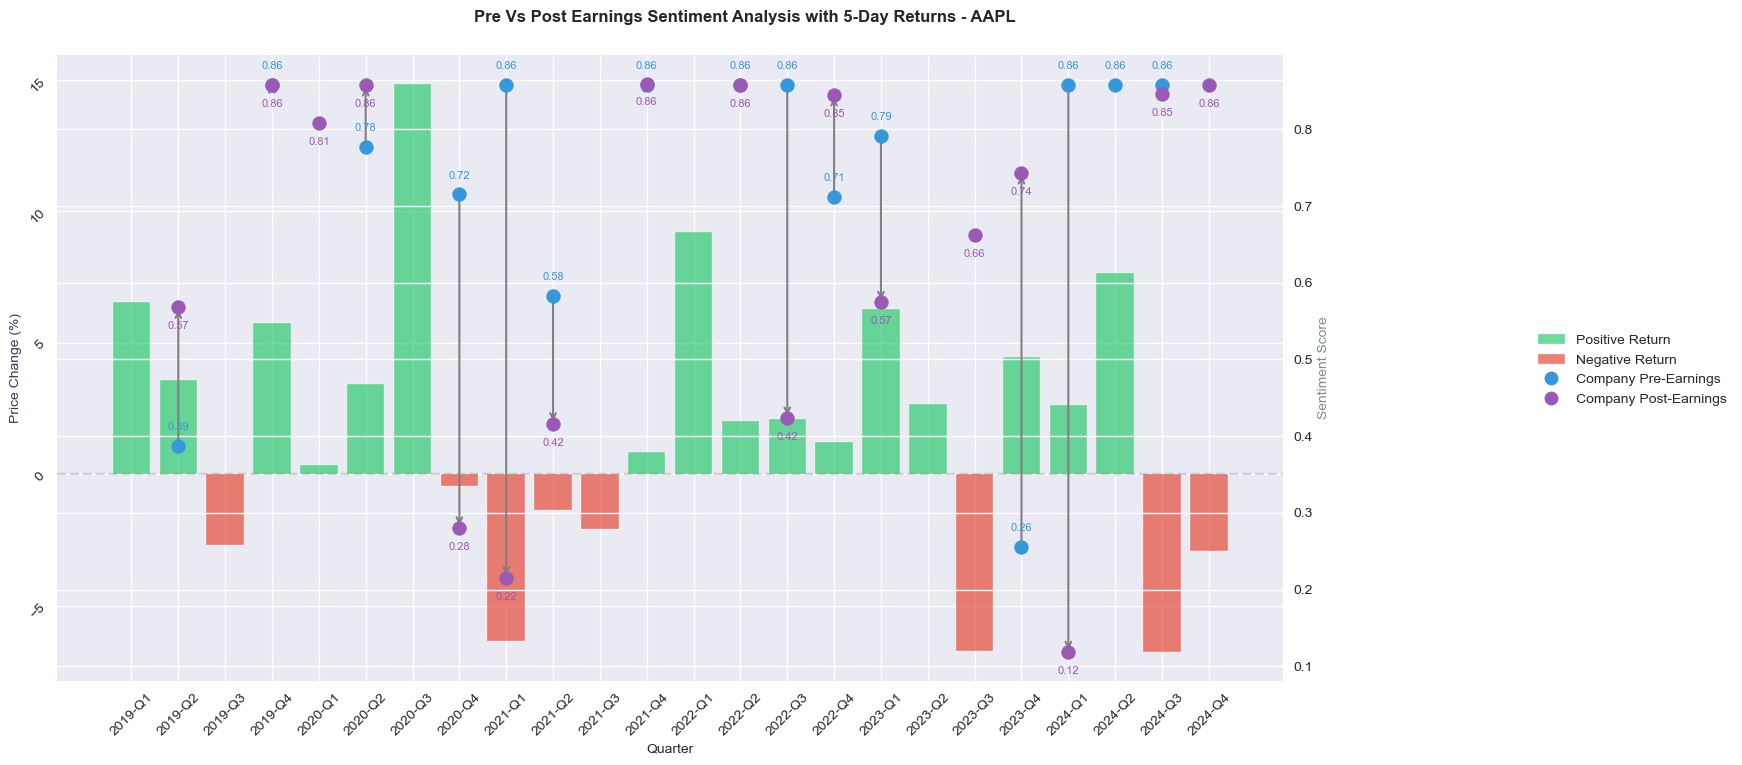

In [77]:
def create_earnings_impact_plot(earnings_df, figsize=(15, 8)):
    """
    Create visualization with refined styling and improved markers
    """
    # Set the style
    sns.set_style("darkgrid")
    
    # Create figure and axis objects
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot bars for price change
    bars = ax.bar(earnings_df['quarter'], earnings_df['price_change'], 
                  color=np.where(earnings_df['price_change'] >= 0, '#2ecc71', '#e74c3c'),
                  alpha=0.7)
    
    # Create second y-axis for sentiment
    ax_sent = ax.twinx()
    
    # Plot Pre-Announcement Sentiments
    scatter_pre_company = ax_sent.scatter(earnings_df['quarter'], earnings_df['pre_sentiment'], 
                                          color='#3498db', s=100, zorder=5, marker='o', label='Company Pre-Earnings')
    
    # Plot Post-Announcement Sentiments
    scatter_post_company = ax_sent.scatter(earnings_df['quarter'], earnings_df['post_sentiment'], 
                                           color='#9b59b6', s=100, zorder=5, marker='o', label='Company Post-Earnings')
    
    # Add trend lines with arrows
    for idx, row in earnings_df.iterrows():
        if not pd.isna(row['pre_sentiment']) and not pd.isna(row['post_sentiment']):
            ax_sent.annotate('', xy=(idx, row['post_sentiment']), xytext=(idx, row['pre_sentiment']),
                             arrowprops=dict(arrowstyle='->', color='gray', lw=1.5))
    
    # Add annotations for non-zero values
    for idx, row in earnings_df.iterrows():
        if row['pre_sentiment'] != 0:
            ax_sent.annotate(f'{row["pre_sentiment"]:.2f}', 
                             (idx, row['pre_sentiment']),
                             xytext=(0, 10), textcoords='offset points',
                             ha='center', va='bottom', color='#3498db', fontsize=8)
        if row['post_sentiment'] != 0:
            ax_sent.annotate(f'{row["post_sentiment"]:.2f}', 
                             (idx, row['post_sentiment']),
                             xytext=(0, -10), textcoords='offset points',
                             ha='center', va='top', color='#9b59b6', fontsize=8)
    
    # Set labels and titles
    #ax.set_title('AAPL', pad=10, fontsize=11)
    ax.set_ylabel('Price Change (%)', color='#2c3e50', fontsize=10)
    ax.set_xlabel('Quarter', fontsize=10)
    ax_sent.set_ylabel('Sentiment Score', color='#7f8c8d', fontsize=10)
    
    # Rotate x-axis labels
    ax.tick_params(rotation=45)
    
    # Add horizontal line at y=0
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.3, zorder=1)
    
    # Add legend with modified markers
    legend_elements = [
        plt.Rectangle((0,0),1,1, facecolor='#2ecc71', alpha=0.7, label='Positive Return'),
        plt.Rectangle((0,0),1,1, facecolor='#e74c3c', alpha=0.7, label='Negative Return'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='#3498db', markersize=10, label='Company Pre-Earnings'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='#9b59b6', markersize=10, label='Company Post-Earnings')
    ]
    
    # Add legend outside the plot but closer
    fig.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=10)
    
    # Add main title closer to the plot
    plt.suptitle('Pre Vs Post Earnings Sentiment Analysis with 5-Day Returns - AAPL', 
                 y=0.95, fontsize=12, fontweight='bold')
    
    # Adjust layout with tighter spacing
    plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # Adjust the rect parameter to accommodate the legend
    
    return fig
earnings_df = process_stock_data(apple_df)
fig = create_earnings_impact_plot(earnings_df)
plt.show()

<div style="
    background-color: #fffbea;
    border: 1px solid #d6d6d6;
    border-left: 20px solid #ffcc00;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
    <li><b>A combined earnings+sentiment dataframe is generated to be fed to be utilized in the final trading strategy.</b></li>
    </ul>
</div>


In [78]:
goog_earnings_df = process_stock_data(google_df)
appl_earnings_df = process_stock_data(apple_df)
nvda_earnings_df = process_stock_data(nvidia_df)

goog_earnings_df['symbol'] = 'GOOGL'
appl_earnings_df['symbol'] = 'AAPL'
nvda_earnings_df['symbol'] = 'NVDA'

earnings_sentiment = pd.concat([goog_earnings_df, appl_earnings_df, nvda_earnings_df])
earnings_sentiment.drop(columns=['price_change', 'volume', 'quarter'], inplace=True)
earnings_sentiment.head()


,date,pre_sentiment,post_sentiment,pre_macro_sentiment,post_macro_sentiment,symbol
0,2019-02-04,NaN,NaN,0.864465,0.866972,GOOGL
1,2019-04-29,0.842163,0.434391,0.650122,0.530292,GOOGL
2,2019-07-25,NaN,NaN,NaN,NaN,GOOGL
3,2019-10-28,0.467464,0.581873,NaN,0.858061,GOOGL
4,2020-02-03,NaN,0.858061,0.363405,0.388627,GOOGL


In [79]:
appl_earnings_df.head(25)

,date,quarter,price_change,pre_sentiment,post_sentiment,pre_macro_sentiment,post_macro_sentiment,volume,symbol
0,2019-01-29,2019-Q1,6.565689,NaN,NaN,0.637670,0.610317,166348800.0,AAPL
1,2019-04-30,2019-Q2,3.570526,0.387434,0.567999,0.417985,0.326618,186139600.0,AAPL
2,2019-07-30,2019-Q3,-2.682961,NaN,NaN,NaN,NaN,135742800.0,AAPL
3,2019-10-30,2019-Q4,5.737489,0.858061,0.858061,0.583118,0.806757,124522000.0,AAPL
4,2020-01-28,2020-Q1,0.349053,NaN,0.807616,NaN,NaN,162234000.0,AAPL
5,2020-04-30,2020-Q2,3.418256,0.776641,0.858061,0.858061,0.858061,183064000.0,AAPL
6,2020-07-30,2020-Q3,14.865235,NaN,NaN,NaN,NaN,158130000.0,AAPL
7,2020-10-29,2020-Q4,-0.442716,0.715160,0.280306,0.749235,0.879890,146129200.0,AAPL
8,2021-01-27,2021-Q1,-6.356912,0.858061,0.215407,NaN,NaN,140843800.0,AAPL
9,2021-04-28,2021-Q2,-1.368022,0.583058,0.416045,0.647666,0.647666,107760100.0,AAPL


In [80]:
earnings_sentiment.to_csv('earnings_sentiment.csv',index=False)

### Prediction Analysis

In [81]:
apple_merged_df.head(10)

,Date,Ticker,Close,High,Low,Open,Volume,earnings_reported_flag,Company_weekday-date,Company,Market,Company_Fin_senti_score,Macro_weekday-date,Macro_Fin_senti_score
0,2019-01-02,AAPL,37.71,37.93,36.83,36.99,148158800.0,0,NaT,NaN,NaN,NaN,NaT,NaN
1,2019-01-03,AAPL,33.95,34.80,33.91,34.38,365248800.0,0,NaT,NaN,NaN,NaN,NaT,NaN
2,2019-01-04,AAPL,35.40,35.47,34.34,34.51,234428400.0,0,NaT,NaN,NaN,NaN,NaT,NaN
3,2019-01-07,AAPL,35.32,35.54,34.84,35.51,219111200.0,0,NaT,NaN,NaN,NaN,NaT,NaN
4,2019-01-08,AAPL,36.00,36.25,35.46,35.71,164101200.0,0,NaT,NaN,NaN,NaN,NaT,NaN
5,2019-01-09,AAPL,36.61,36.90,35.73,36.13,180396400.0,0,NaT,NaN,NaN,NaN,NaT,NaN
6,2019-01-10,AAPL,36.72,36.77,36.02,36.41,143122800.0,0,NaT,NaN,NaN,NaN,NaT,NaN
7,2019-01-11,AAPL,36.36,36.70,36.18,36.51,108092800.0,0,NaT,NaN,NaN,NaN,NaT,NaN
8,2019-01-14,AAPL,35.82,36.12,35.63,36.02,129756800.0,0,NaT,NaN,NaN,NaN,NaT,NaN
9,2019-01-15,AAPL,36.55,36.63,35.83,35.88,114843600.0,0,NaT,NaN,NaN,NaN,NaT,NaN


<div style="
    background-color: #fffbea;
    border: 1px solid #d6d6d6;
    border-left: 20px solid #ffcc00;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> A basic Linear regression model is tried where we try to predict the 3rd day return based on sentiment scores. (3 day window is chosen based on the Event Analysis Insights)</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Since this model is using only sentiment and no other feature (other features are being tested in the combined models - the models here are trying to identify the impact of sentiment), we will also try to measure the directional accuracy as a better barometer of the model's predictive power.</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Directional Accuracy will just check if it's predicting the positive and negative returns.</li>
    </ul>
</div>

In [82]:
#Linear Regression - with Single sentiment factor
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

def prepare_simple_features(df):
    """
    Prepare basic features for regression, handling sparse sentiment data
    """
    # Create a copy of the dataframe
    features_df = df.copy()
    
    # Basic feature: Fill NA sentiment with 0 (indicating no sentiment)
    features_df['sentiment'] = features_df['Company_Fin_senti_score'].fillna(0)
    
    # Add a binary column for presence of sentiment
    features_df['has_sentiment'] = features_df['Company_Fin_senti_score'].notna().astype(int)
    
    # Calculate daily returns
    features_df['return'] = features_df['Close'].pct_change()
    
    # Create next day's return (target variable)
    features_df['next_day_return'] = features_df['return'].shift(-3)
    
    # Drop any remaining NaN values
    features_df = features_df.dropna()
    
    return features_df

def run_simple_regression(df):
    """
    Run a simple linear regression model
    """
    # Prepare features
    processed_df = prepare_simple_features(df)
    
    # Define features and target
    X = processed_df[['sentiment', 'has_sentiment']]
    y = processed_df['next_day_return']
    
    # Split the data (keeping chronological order)
    train_size = int(len(processed_df) * 0.8)
    X_train = X[:train_size]
    X_test = X[train_size:]
    y_train = y[:train_size]
    y_test = y[train_size:]
    
    # Fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    
    # Create coefficient summary
    coef_df = pd.DataFrame({
        'Feature': ['sentiment', 'has_sentiment'],
        'Coefficient': model.coef_
    })
    
    # Print results
    print("\nModel Results:")
    print(f"Training R² Score: {train_r2:.4f}")
    print(f"Test R² Score: {test_r2:.4f}")
    print(f"Training MSE: {train_mse:.6f}")
    print(f"Test MSE: {test_mse:.6f}")
    print("\nCoefficients:")
    print(coef_df)
    print(f"Intercept: {model.intercept_:.6f}")
    
    # Calculate prediction accuracy
    y_pred_direction = np.sign(y_pred_test)
    y_true_direction = np.sign(y_test)
    direction_accuracy = np.mean(y_pred_direction == y_true_direction)
    print(f"\nDirectional Accuracy (Test Set): {direction_accuracy:.2%}")
    
    return {
        'model': model,
        'test_predictions': y_pred_test,
        'test_actual': y_test,
        'metrics': {
            'train_r2': train_r2,
            'test_r2': test_r2,
            'train_mse': train_mse,
            'test_mse': test_mse,
            'direction_accuracy': direction_accuracy
        }
    }

# Function to run the analysis
def analyze_stock_sentiment(stock_df):
    """
    Run the complete analysis for a stock
    """
    print("Dataset Overview:")
    print(f"Total rows: {len(stock_df)}")
    print(f"Number of sentiment scores: {stock_df['Company_Fin_senti_score'].notna().sum()}")
    print(f"Percentage with sentiment: {(stock_df['Company_Fin_senti_score'].notna().sum() / len(stock_df)) * 100:.2f}%")
    
    # Run regression
    results = run_simple_regression(stock_df)
    
    return results

In [83]:
# Load Apple data
apple_df = apple_merged_df.copy()

apple_df.set_index('Date', inplace=True)

# Run the analysis
results = analyze_stock_sentiment(apple_df)

Dataset Overview:
Total rows: 1510
Number of sentiment scores: 413
Percentage with sentiment: 27.35%

Model Results:
Training R² Score: 0.0062
Test R² Score: -0.0407
Training MSE: 0.000411
Test MSE: 0.000135

Coefficients:
         Feature  Coefficient
0      sentiment    -0.004879
1  has_sentiment     0.000000
Intercept: 0.004290

Directional Accuracy (Test Set): 52.50%


In [84]:
# Load Google data
google_df = goog_merged_df.copy()

google_df.set_index('Date', inplace=True)

# Run the analysis
results = analyze_stock_sentiment(google_df)

Dataset Overview:
Total rows: 1510
Number of sentiment scores: 406
Percentage with sentiment: 26.89%

Model Results:
Training R² Score: 0.0003
Test R² Score: -0.0534
Training MSE: 0.000561
Test MSE: 0.000564

Coefficients:
         Feature  Coefficient
0      sentiment     0.001158
1  has_sentiment     0.000000
Intercept: 0.000321

Directional Accuracy (Test Set): 65.00%


<div style="
    background-color: #fffbea;
    border: 1px solid #d6d6d6;
    border-left: 20px solid #ffcc00;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> The Model results in very poor prediction of Day-3 returns (The window shift parameter was tested for other lag days as well 1 to 3)</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> The Directional accuracy for both Apple and Google are relatively decent.</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> The Model can be tried for different window sizes to see if that improves the prediction power </li>
    </ul>
</div>

In [86]:
#Lagged Linear Regression - with Single sentiment factor
def prepare_lagged_features(df, target_shift):
    """
    Prepare features with cumulative returns calculated relative to sentiment publication dates
    """
    features_df = df.copy()
    
    # Basic sentiment features
    features_df['sentiment'] = features_df['Company_Fin_senti_score'].fillna(0)
    features_df['has_sentiment'] = features_df['Company_Fin_senti_score'].notna().astype(int)
    
    # Initialize cumulative return column
    features_df['cum_return'] = np.nan
    
    # Get indices where sentiment is available
    sentiment_dates = features_df[features_df['Company_Fin_senti_score'].notna()].index
    
    # Calculate cumulative returns for each sentiment date
    for date in sentiment_dates:
        base_price = features_df.loc[date, 'Close']
        
        # Get the next target_shift days
        future_dates = features_df.index[features_df.index > date][:target_shift]
        
        if len(future_dates) == target_shift:  # only if we have enough future data
            # Calculate cumulative returns
            features_df.loc[date, 'cum_return'] = (
                features_df.loc[future_dates[-1], 'Close'] / base_price - 1
            ) * 100  # in percentage
    
    # Drop rows without cumulative returns
    features_df = features_df.dropna(subset=['cum_return'])
    
    return features_df

def evaluate_lagged_model(df, target_shift):
    """
    Evaluate model with specified target shift
    """
    # Prepare features
    processed_df = prepare_lagged_features(df, target_shift)
    
    # Define features and targets
    X = processed_df[['sentiment', 'has_sentiment']]
    y = processed_df['cum_return']
    
    # Split data (80% train, 20% test)
    train_size = int(len(processed_df) * 0.8)
    X_train = X[:train_size]
    X_test = X[train_size:]
    y_train = y[:train_size]
    y_test = y[train_size:]
    
    # Fit model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    
    # Calculate directional accuracy
    train_direction_accuracy = np.mean(np.sign(y_pred_train) == np.sign(y_train))
    test_direction_accuracy = np.mean(np.sign(y_pred_test) == np.sign(y_test))
    
    # Create coefficient summary
    coef_df = pd.DataFrame({
        'Feature': ['sentiment', 'has_sentiment'],
        'Coefficient': model.coef_
    })
    
    # Store results
    results = {
        'model': model,
        'metrics': {
            'train_r2': train_r2,
            'test_r2': test_r2,
            'train_mse': train_mse,
            'test_mse': test_mse,
            'train_direction_accuracy': train_direction_accuracy,
            'test_direction_accuracy': test_direction_accuracy
        },
        'coefficients': coef_df,
        'intercept': model.intercept_,
        'processed_data': processed_df
    }
    
    return results

def analyze_multiple_lags(df, max_shift=5):
    """
    Analyze model performance across different time lags and return formatted results
    """
    print("Dataset Overview:")
    print(f"Total rows: {len(df)}")
    print(f"Number of sentiment scores: {df['Company_Fin_senti_score'].notna().sum()}")
    print(f"Percentage with sentiment: {(df['Company_Fin_senti_score'].notna().sum() / len(df)) * 100:.2f}%")
    
    # Initialize lists to store results
    results_list = []
    
    # Evaluate models with different shifts
    for shift in range(1, max_shift + 1):
        model_results = evaluate_lagged_model(df, shift)
        
        # Create results dictionary
        shift_results = {
            'Shift': shift,
            'Train_R2': model_results['metrics']['train_r2'],
            'Test_R2': model_results['metrics']['test_r2'],
            'Train_MSE': model_results['metrics']['train_mse'],
            'Test_MSE': model_results['metrics']['test_mse'],
            'Train_Dir_Acc': model_results['metrics']['train_direction_accuracy'],
            'Test_Dir_Acc': model_results['metrics']['test_direction_accuracy'],
            'Sentiment_Coef': model_results['coefficients'].loc[0, 'Coefficient'],
            'Has_Sentiment_Coef': model_results['coefficients'].loc[1, 'Coefficient'],
            'Intercept': model_results['intercept'],
            'N_Observations': len(model_results['processed_data'])
        }
        
        results_list.append(shift_results)
    
    # Create summary dataframe
    summary_df = pd.DataFrame(results_list)
    
    # Format percentages and decimals
    format_dict = {
        'Train_R2': '{:.4f}',
        'Test_R2': '{:.4f}',
        'Train_MSE': '{:.6f}',
        'Test_MSE': '{:.6f}',
        'Train_Dir_Acc': '{:.2%}',
        'Test_Dir_Acc': '{:.2%}',
        'Sentiment_Coef': '{:.6f}',
        'Has_Sentiment_Coef': '{:.6f}',
        'Intercept': '{:.6f}'
    }
    
    for col, format_str in format_dict.items():
        summary_df[col] = summary_df[col].apply(lambda x: format_str.format(x))
    
    return summary_df

# Load data
apple_df = apple_merged_df.copy()
apple_df.set_index('Date', inplace=True)
apple_df.sort_index(inplace=True)

goog_df = goog_merged_df.copy()
goog_df.set_index('Date', inplace=True)
goog_df.sort_index(inplace=True)

nvda_df = nvda_merged_df.copy()
nvda_df.set_index('Date', inplace=True)
nvda_df.sort_index(inplace=True)

# Run the analysis
apple_results_df = analyze_multiple_lags(apple_df, max_shift=5)
goog_results_df = analyze_multiple_lags(goog_df, max_shift=5)
nvda_results_df = analyze_multiple_lags(nvda_df, max_shift=5)

print("\nAAPL Regression Results Summary:")
display(apple_results_df)

print("\nGOOGL Regression Results Summary:")
display(goog_results_df)

print("\nNVDA Regression Results Summary:")
display(nvda_results_df)

Dataset Overview:
Total rows: 1510
Number of sentiment scores: 413
Percentage with sentiment: 27.35%
Dataset Overview:
Total rows: 1510
Number of sentiment scores: 406
Percentage with sentiment: 26.89%
Dataset Overview:
Total rows: 1510
Number of sentiment scores: 67
Percentage with sentiment: 4.44%

AAPL Regression Results Summary:


,Shift,Train_R2,Test_R2,Train_MSE,Test_MSE,Train_Dir_Acc,Test_Dir_Acc,Sentiment_Coef,Has_Sentiment_Coef,Intercept,N_Observations
0,1,0.0013,-0.0202,3.812037,2.444931,56.06%,56.63%,0.207553,0.000000,0.068657,413
1,2,0.0050,-0.0188,6.132994,4.549945,58.48%,55.42%,-0.519239,0.000000,0.732647,413
2,3,0.0105,-0.0311,9.086709,5.761774,59.39%,55.42%,-0.918228,0.000000,1.120710,413
3,4,0.0030,-0.0127,12.037165,7.627356,59.70%,59.04%,-0.566183,0.000000,1.024643,413
4,5,0.0010,-0.0065,14.444184,8.491225,59.09%,54.22%,-0.352270,0.000000,0.903148,413



GOOGL Regression Results Summary:


,Shift,Train_R2,Test_R2,Train_MSE,Test_MSE,Train_Dir_Acc,Test_Dir_Acc,Sentiment_Coef,Has_Sentiment_Coef,Intercept,N_Observations
0,1,0.0000,0.0001,4.766784,4.103152,52.16%,51.22%,0.040484,0.000000,-0.026130,406
1,2,0.0002,-0.0003,7.015144,8.548330,51.23%,58.54%,0.102032,0.000000,0.112446,406
2,3,0.0005,-0.0375,11.727124,10.474542,55.25%,63.41%,-0.212109,0.000000,0.240329,406
3,4,0.0001,-0.1060,16.199389,12.056213,52.47%,60.98%,-0.107307,0.000000,0.095209,406
4,5,0.0006,-0.1234,18.185588,14.782976,54.94%,63.41%,-0.295222,0.000000,0.302804,406



NVDA Regression Results Summary:


,Shift,Train_R2,Test_R2,Train_MSE,Test_MSE,Train_Dir_Acc,Test_Dir_Acc,Sentiment_Coef,Has_Sentiment_Coef,Intercept,N_Observations
0,1,0.0009,-0.0016,16.428368,5.047992,45.28%,57.14%,0.249070,0.000000,0.044646,67
1,2,0.0088,-0.0762,27.983842,18.775654,47.17%,64.29%,-1.041060,0.000000,0.837971,67
2,3,0.0000,-0.0573,41.019207,26.645120,49.06%,57.14%,-0.003054,0.000000,1.382071,67
3,4,0.0027,-0.0435,45.800995,28.548584,52.83%,50.00%,-0.731311,0.000000,1.792741,67
4,5,0.0051,-0.0268,53.908255,41.874847,54.72%,42.86%,-1.094072,0.000000,2.325841,67


<div style="
    background-color: #fffbea;
    border: 1px solid #d6d6d6;
    border-left: 20px solid #ffcc00;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Trialing Random Forest and XGBoost in place of Linear Regression to see if this improves the accuracy</li>
    </ul>
</div>

In [87]:
# Random Forest and XGBoost trial based on Linear Regression results
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb

def prepare_features_rf(df, target_shift):
    """
    Prepare features - keeping same approach as linear regression
    """
    features_df_rf = df.copy()
    
    # Basic sentiment features
    features_df_rf['sentiment'] = features_df_rf['Company_Fin_senti_score'].fillna(0)
    features_df_rf['has_sentiment'] = features_df_rf['Company_Fin_senti_score'].notna().astype(int)
    
    # Calculate cumulative returns from sentiment dates
    features_df_rf['cum_return'] = np.nan
    sentiment_dates = features_df_rf[features_df_rf['Company_Fin_senti_score'].notna()].index
    
    for date in sentiment_dates:
        base_price = features_df_rf.loc[date, 'Close']
        future_dates = features_df_rf.index[features_df_rf.index > date][:target_shift]
        
        if len(future_dates) == target_shift:
            features_df_rf.loc[date, 'cum_return'] = (
                features_df_rf.loc[future_dates[-1], 'Close'] / base_price - 1
            ) * 100  # in percentage
    
    # Drop rows without cumulative returns
    features_df_rf = features_df_rf.dropna(subset=['cum_return'])
    
    return features_df_rf

def evaluate_models_rf(df, target_shift):
    """
    Evaluate Linear Regression, Random Forest, and XGBoost
    """
    # Prepare features
    processed_df_rf = prepare_features_rf(df, target_shift)
    
    # Define features and target
    X = processed_df_rf[['sentiment', 'has_sentiment']]
    y = processed_df_rf['cum_return']
    
    # Split data (80% train, 20% test)
    train_size = int(len(processed_df_rf) * 0.8)
    X_train = X[:train_size]
    X_test = X[train_size:]
    y_train = y[:train_size]
    y_test = y[train_size:]
    
    # Initialize models
    rf_model = RandomForestRegressor(
        n_estimators=100,
        max_depth=3,
        min_samples_leaf=5,
        random_state=42
    )
    
    xgb_model = xgb.XGBRegressor(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.1,
        random_state=42
    )
    
    # Train and evaluate models
    results = {}
    for name, model in [('RandomForest', rf_model), ('XGBoost', xgb_model)]:
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        # Calculate metrics
        train_r2 = r2_score(y_train, y_pred_train)
        test_r2 = r2_score(y_test, y_pred_test)
        train_mse = mean_squared_error(y_train, y_pred_train)
        test_mse = mean_squared_error(y_test, y_pred_test)
        
        # Calculate directional accuracy
        train_direction_accuracy = np.mean(np.sign(y_pred_train) == np.sign(y_train))
        test_direction_accuracy = np.mean(np.sign(y_pred_test) == np.sign(y_test))
        
        # Store feature importance
        if name == 'RandomForest':
            importance = model.feature_importances_
        else:
            importance = model.feature_importances_
            
        feature_importance = pd.DataFrame({
            'Feature': ['sentiment', 'has_sentiment'],
            'Importance': importance
        })
        
        results[name] = {
            'train_r2': train_r2,
            'test_r2': test_r2,
            'train_mse': train_mse,
            'test_mse': test_mse,
            'train_direction_accuracy': train_direction_accuracy,
            'test_direction_accuracy': test_direction_accuracy,
            'feature_importance': feature_importance,
            'n_observations': len(processed_df_rf)
        }
    
    return results

def analyze_multiple_lags_rf(df, max_shift=5):
    """
    Analyze model performance across different time lags
    """
    print("Dataset Overview:")
    print(f"Total rows: {len(df)}")
    print(f"Number of sentiment scores: {df['Company_Fin_senti_score'].notna().sum()}")
    print(f"Percentage with sentiment: {(df['Company_Fin_senti_score'].notna().sum() / len(df)) * 100:.2f}%")
    
    # Initialize results storage
    all_results = []
    
    # Evaluate models for different shifts
    for shift in range(1, max_shift + 1):
        results = evaluate_models_rf(df, shift)
        
        # Format results for each model
        for model_name, model_results in results.items():
            shift_results = {
                'Shift': shift,
                'Model': model_name,
                'Train_R2': f"{model_results['train_r2']:.4f}",
                'Test_R2': f"{model_results['test_r2']:.4f}",
                'Train_MSE': f"{model_results['train_mse']:.6f}",
                'Test_MSE': f"{model_results['test_mse']:.6f}",
                'Train_Dir_Acc': f"{model_results['train_direction_accuracy']:.2%}",
                'Test_Dir_Acc': f"{model_results['test_direction_accuracy']:.2%}",
                'N_Observations': model_results['n_observations']
            }
            
            # Add feature importance
            for idx, row in model_results['feature_importance'].iterrows():
                shift_results[f'{row["Feature"]}_importance'] = f"{row['Importance']:.6f}"
            
            all_results.append(shift_results)
    
    # Create summary dataframe
    summary_df = pd.DataFrame(all_results)
    
    return summary_df

In [88]:
# Run analysis for each stock
print("AAPL Results:")
aapl_results = analyze_multiple_lags_rf(apple_df, max_shift=5)
print("\nResults Summary:")
display(aapl_results)

print("\nGOOGL Results:")
googl_results = analyze_multiple_lags_rf(goog_df, max_shift=5)
print("\nResults Summary:")
display(googl_results)

print("\nNVDA Results:")
nvda_results = analyze_multiple_lags_rf(nvda_df, max_shift=5)
print("\nResults Summary:")
display(nvda_results)

AAPL Results:
Dataset Overview:
Total rows: 1510
Number of sentiment scores: 413
Percentage with sentiment: 27.35%

Results Summary:


,Shift,Model,Train_R2,Test_R2,Train_MSE,Test_MSE,Train_Dir_Acc,Test_Dir_Acc,N_Observations,sentiment_importance,has_sentiment_importance
0,1,RandomForest,0.0644,-0.0939,3.571081,2.621542,57.88%,56.63%,413,1.000000,0.000000
1,1,XGBoost,0.3146,-0.3113,2.615968,3.142550,69.09%,50.60%,413,1.000000,0.000000
2,2,RandomForest,0.0759,-0.1087,5.696088,4.951231,61.21%,49.40%,413,1.000000,0.000000
3,2,XGBoost,0.3064,-0.2072,4.275328,5.391223,73.03%,49.40%,413,1.000000,0.000000
4,3,RandomForest,0.0858,-0.0871,8.395165,6.074264,63.94%,55.42%,413,1.000000,0.000000
5,3,XGBoost,0.3035,-0.1571,6.396088,6.465636,71.21%,53.01%,413,1.000000,0.000000
6,4,RandomForest,0.0768,-0.0429,11.146637,7.854416,63.03%,59.04%,413,1.000000,0.000000
7,4,XGBoost,0.3016,-0.1636,8.432386,8.763746,73.64%,55.42%,413,1.000000,0.000000
8,5,RandomForest,0.0797,-0.0726,13.305808,9.048982,61.52%,50.60%,413,1.000000,0.000000
9,5,XGBoost,0.2729,-0.1500,10.512571,9.701679,72.12%,51.81%,413,1.000000,0.000000



GOOGL Results:
Dataset Overview:
Total rows: 1510
Number of sentiment scores: 406
Percentage with sentiment: 26.89%

Results Summary:


,Shift,Model,Train_R2,Test_R2,Train_MSE,Test_MSE,Train_Dir_Acc,Test_Dir_Acc,N_Observations,sentiment_importance,has_sentiment_importance
0,1,RandomForest,0.0568,-0.0339,4.496459,4.242652,58.64%,50.00%,406,1.000000,0.000000
1,1,XGBoost,0.2788,-0.3388,3.437782,5.493729,66.36%,46.34%,406,1.000000,0.000000
2,2,RandomForest,0.0500,-0.0165,6.665410,8.686657,61.73%,52.44%,406,1.000000,0.000000
3,2,XGBoost,0.2932,-0.2815,4.959338,10.950484,70.99%,45.12%,406,1.000000,0.000000
4,3,RandomForest,0.0718,-0.0762,10.890523,10.865302,61.11%,47.56%,406,1.000000,0.000000
5,3,XGBoost,0.3376,-0.4290,7.771641,14.427282,70.37%,47.56%,406,1.000000,0.000000
6,4,RandomForest,0.0622,-0.1312,15.193411,12.331229,59.26%,46.34%,406,1.000000,0.000000
7,4,XGBoost,0.3021,-0.4667,11.306211,15.988663,67.90%,52.44%,406,1.000000,0.000000
8,5,RandomForest,0.0787,-0.1440,16.764770,15.054000,60.49%,59.76%,406,1.000000,0.000000
9,5,XGBoost,0.3222,-0.4495,12.332808,19.075115,68.21%,56.10%,406,1.000000,0.000000



NVDA Results:
Dataset Overview:
Total rows: 1510
Number of sentiment scores: 67
Percentage with sentiment: 4.44%

Results Summary:


,Shift,Model,Train_R2,Test_R2,Train_MSE,Test_MSE,Train_Dir_Acc,Test_Dir_Acc,N_Observations,sentiment_importance,has_sentiment_importance
0,1,RandomForest,0.1343,-0.2810,14.233715,6.455954,64.15%,35.71%,67,1.000000,0.000000
1,1,XGBoost,0.8374,-4.2718,2.673105,26.569217,81.13%,71.43%,67,1.000000,0.000000
2,2,RandomForest,0.1225,-0.2844,24.773500,22.407349,56.60%,42.86%,67,1.000000,0.000000
3,2,XGBoost,0.7235,-1.9571,7.807789,51.590378,75.47%,42.86%,67,1.000000,0.000000
4,3,RandomForest,0.0837,-0.1200,37.584546,28.227122,58.49%,28.57%,67,1.000000,0.000000
5,3,XGBoost,0.5258,-1.4941,19.452394,62.857030,75.47%,71.43%,67,1.000000,0.000000
6,4,RandomForest,0.0989,-0.0684,41.384080,29.228308,56.60%,42.86%,67,1.000000,0.000000
7,4,XGBoost,0.5545,-0.5969,20.460049,43.687357,71.70%,64.29%,67,1.000000,0.000000
8,5,RandomForest,0.0769,0.0986,50.015313,36.757975,54.72%,42.86%,67,1.000000,0.000000
9,5,XGBoost,0.4743,-0.0896,28.483368,44.433394,75.47%,57.14%,67,1.000000,0.000000


<div style="
    background-color: #fffbea;
    border: 1px solid #d6d6d6;
    border-left: 20px solid #ffcc00;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Random Forest and XGBOost are marginally improving the directional accuracy when predicting based on Company sentiment</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> Trialing Linear Regression, Random Forest and XGBOost for Company and Macro sentiments for different window sizes</li>
    </ul>
</div>

In [89]:
# Linear, Random Forest and XGBoost with Company and Macro Factors
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb

def prepare_features_wm(df, target_shift):
    """
    Prepare features including both company and macro sentiment
    """
    features_df = df.copy()
    
    # Handle sentiment features
    features_df['company_sentiment'] = features_df['Company_Fin_senti_score'].fillna(0)
    features_df['has_company_sentiment'] = features_df['Company_Fin_senti_score'].notna().astype(int)
    
    # Handle macro sentiment
    features_df['macro_sentiment'] = features_df['Macro_Fin_senti_score'].fillna(0)
    features_df['has_macro_sentiment'] = features_df['Macro_Fin_senti_score'].notna().astype(int)
    
    # Add interaction term between sentiments
    features_df['sentiment_interaction'] = features_df['company_sentiment'] * features_df['macro_sentiment']
    
    # Calculate cumulative returns from sentiment dates
    features_df['cum_return'] = np.nan
    sentiment_dates = features_df[features_df['Company_Fin_senti_score'].notna()].index
    
    for date in sentiment_dates:
        base_price = features_df.loc[date, 'Close']
        future_dates = features_df.index[features_df.index > date][:target_shift]
        
        if len(future_dates) == target_shift:
            features_df.loc[date, 'cum_return'] = (
                features_df.loc[future_dates[-1], 'Close'] / base_price - 1
            ) * 100  # in percentage
    
    # Drop rows without cumulative returns
    features_df = features_df.dropna(subset=['cum_return'])
    
    return features_df

def evaluate_models_wm(df, target_shift):
    """
    Evaluate Linear Regression, Random Forest, and XGBoost with macro sentiment
    """
    # Prepare features
    processed_df = prepare_features_wm(df, target_shift)
    
    # Define features and target
    feature_cols = [
        'company_sentiment',
        'has_company_sentiment',
        'macro_sentiment',
        'has_macro_sentiment',
        'sentiment_interaction'
    ]
    
    X = processed_df[feature_cols]
    y = processed_df['cum_return']
    
    # Split data (80% train, 20% test)
    train_size = int(len(processed_df) * 0.8)
    X_train = X[:train_size]
    X_test = X[train_size:]
    y_train = y[:train_size]
    y_test = y[train_size:]
    
    # Initialize models
    lr_model = LinearRegression()
    rf_model = RandomForestRegressor(
        n_estimators=100,
        max_depth=3,
        min_samples_leaf=5,
        random_state=42
    )
    xgb_model = xgb.XGBRegressor(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.1,
        random_state=42
    )
    
    # Train and evaluate models
    results = {}
    for name, model in [
        ('LinearRegression', lr_model),
        ('RandomForest', rf_model),
        ('XGBoost', xgb_model)
    ]:
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        # Calculate metrics
        train_r2 = r2_score(y_train, y_pred_train)
        test_r2 = r2_score(y_test, y_pred_test)
        train_mse = mean_squared_error(y_train, y_pred_train)
        test_mse = mean_squared_error(y_test, y_pred_test)
        
        # Calculate directional accuracy
        train_direction_accuracy = np.mean(np.sign(y_pred_train) == np.sign(y_train))
        test_direction_accuracy = np.mean(np.sign(y_pred_test) == np.sign(y_test))
        
        # Store feature importance
        if name == 'LinearRegression':
            importance = model.coef_
        else:
            importance = model.feature_importances_
            
        feature_importance = pd.DataFrame({
            'Feature': feature_cols,
            'Importance': importance
        })
        
        results[name] = {
            'train_r2': train_r2,
            'test_r2': test_r2,
            'train_mse': train_mse,
            'test_mse': test_mse,
            'train_direction_accuracy': train_direction_accuracy,
            'test_direction_accuracy': test_direction_accuracy,
            'feature_importance': feature_importance,
            'n_observations': len(processed_df)
        }
        
        if name == 'LinearRegression':
            results[name]['intercept'] = model.intercept_
    
    return results

def analyze_multiple_lags_wm(df, max_shift=5):
    """
    Analyze model performance across different time lags
    """
    print("Dataset Overview:")
    print(f"Total rows: {len(df)}")
    print(f"Number of company sentiment scores: {df['Company_Fin_senti_score'].notna().sum()}")
    print(f"Number of macro sentiment scores: {df['Macro_Fin_senti_score'].notna().sum()}")
    
    # Initialize results storage
    all_results = []
    
    # Evaluate models for different shifts
    for shift in range(1, max_shift + 1):
        results = evaluate_models_wm(df, shift)
        
        # Format results for each model
        for model_name, model_results in results.items():
            shift_results = {
                'Shift': shift,
                'Model': model_name,
                'Train_R2': f"{model_results['train_r2']:.4f}",
                'Test_R2': f"{model_results['test_r2']:.4f}",
                'Train_MSE': f"{model_results['train_mse']:.6f}",
                'Test_MSE': f"{model_results['test_mse']:.6f}",
                'Train_Dir_Acc': f"{model_results['train_direction_accuracy']:.2%}",
                'Test_Dir_Acc': f"{model_results['test_direction_accuracy']:.2%}",
                'N_Observations': model_results['n_observations']
            }
            
            # Add feature importance
            for idx, row in model_results['feature_importance'].iterrows():
                shift_results[f'{row["Feature"]}_importance'] = f"{row['Importance']:.6f}"
            
            # Add intercept for Linear Regression
            if model_name == 'LinearRegression':
                shift_results['Intercept'] = f"{model_results['intercept']:.6f}"
            
            all_results.append(shift_results)
    
    # Create summary dataframe
    summary_df = pd.DataFrame(all_results)
    
    return summary_df

apple_df_all = apple_merged_df.copy()
# Make sure the Date column is the index
apple_df_all = apple_df_all.set_index('Date')

# Run analysis
results_df = analyze_multiple_lags_wm(apple_df_all, max_shift=4)

# Display results
print("\nResults Summary:")
display(results_df)

Dataset Overview:
Total rows: 1510
Number of company sentiment scores: 413
Number of macro sentiment scores: 478

Results Summary:


,Shift,Model,Train_R2,Test_R2,Train_MSE,Test_MSE,Train_Dir_Acc,Test_Dir_Acc,N_Observations,company_sentiment_importance,has_company_sentiment_importance,macro_sentiment_importance,has_macro_sentiment_importance,sentiment_interaction_importance,Intercept
0,1,LinearRegression,0.0082,-0.0558,3.785668,2.530286,56.06%,51.81%,413,0.382592,0.000000,-0.173665,0.423746,-0.672955,-0.060642
1,1,RandomForest,0.0900,-0.0867,3.473310,2.604273,58.79%,53.01%,413,0.308946,0.000000,0.241051,0.006956,0.443047,NaN
2,1,XGBoost,0.4069,-0.3214,2.263917,3.166848,68.18%,50.60%,413,0.225181,0.000000,0.321511,0.107745,0.345563,NaN
3,2,LinearRegression,0.0085,-0.0434,6.111575,4.659888,58.48%,55.42%,413,-0.315449,-0.000000,0.479693,0.235654,-0.776520,0.498911
4,2,RandomForest,0.0882,-0.0731,5.620351,4.792414,60.30%,50.60%,413,0.419355,0.000000,0.211380,0.012754,0.356512,NaN
5,2,XGBoost,0.3836,-0.4344,3.799523,6.405775,73.03%,46.99%,413,0.222515,0.000000,0.290590,0.227808,0.259088,NaN
6,3,LinearRegression,0.0116,-0.0350,9.076860,5.783100,59.39%,55.42%,413,-0.952821,0.000000,0.049430,0.104339,0.123107,1.056544
7,3,RandomForest,0.0952,-0.0693,8.309070,5.975272,62.42%,54.22%,413,0.507521,0.000000,0.135584,0.010526,0.346369,NaN
8,3,XGBoost,0.3575,-0.3361,5.900664,7.465601,74.55%,55.42%,413,0.225210,0.000000,0.352775,0.176044,0.245970,NaN
9,4,LinearRegression,0.0042,-0.0135,12.022943,7.633321,59.70%,59.04%,413,-0.661517,0.000000,-0.044232,0.084399,0.351486,0.992867


<div style="
    background-color: #fffbea;
    border: 1px solid #d6d6d6;
    border-left: 20px solid #ffcc00;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 15px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> With Company and Macro sentiment, R-square is still poor and the Directional accuracy stabilizes at 60% for Test-set across all 3 models</li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span> We can try a classification model where the direction of the returns is the prediction - a signal generated based on returns and predicting the same</li>
    </ul>
</div>

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Initial threshold approach
def calculate_overall_return_thresholds(df):
    """
    Calculate single set of thresholds using all return data
    """
    # Calculate returns for all horizons (1-3 days)
    all_returns = []
    
    for shift in range(1, 4):
        returns = []
        sentiment_dates = df[df['Company_Fin_senti_score'].notna()].index
        
        for date in sentiment_dates:
            if date < df.index[-shift]:  # Ensure we have enough future data
                future_price = df.loc[df.index[df.index.get_loc(date) + shift], 'Close']
                base_price = df.loc[date, 'Close']
                returns.append((future_price / base_price - 1) * 100)
        
        all_returns.extend(returns)
    
    all_returns = pd.Series(all_returns)
    
    # Calculate thresholds using all returns
    lower_threshold = all_returns.quantile(0.33)
    upper_threshold = all_returns.quantile(0.67)
    
    print("\nOverall Return Thresholds (across all horizons):")
    print(f"Lower threshold: {lower_threshold:.2f}%")
    print(f"Upper threshold: {upper_threshold:.2f}%")
    
    return lower_threshold, upper_threshold

def prepare_direction_features(df, target_shift, thresholds):
    """
    Prepare features using consistent thresholds
    """
    features_df = df.copy()
    lower_thresh, upper_thresh = thresholds
    
    # Basic features
    features_df['company_sentiment'] = features_df['Company_Fin_senti_score'].fillna(0)
    features_df['macro_sentiment'] = features_df['Macro_Fin_senti_score'].fillna(0)
    
    # Calculate future returns
    features_df['future_return'] = np.nan
    sentiment_dates = features_df[features_df['Company_Fin_senti_score'].notna()].index
    
    for date in sentiment_dates:
        if date < features_df.index[-target_shift]:
            future_price = features_df.loc[features_df.index[features_df.index.get_loc(date) + target_shift], 'Close']
            base_price = features_df.loc[date, 'Close']
            features_df.loc[date, 'future_return'] = (future_price / base_price - 1) * 100
    
    # Create direction labels using consistent thresholds
    features_df['direction'] = np.where(
        features_df['future_return'] > upper_thresh, 1,
        np.where(features_df['future_return'] < lower_thresh, -1, 0)
    )
    
    # Print class distribution for this horizon
    print(f"\nClass Distribution for {target_shift}-day horizon:")
    print(features_df['direction'].value_counts())
    
    # Select features
    feature_cols = ['company_sentiment', 'macro_sentiment']
    
    return features_df.dropna(subset=['direction']), feature_cols

def evaluate_logistic_model(df, target_shift, thresholds):
    """
    Evaluate logistic regression with consistent thresholds
    """
    # Prepare data
    processed_df, feature_cols = prepare_direction_features(df, target_shift, thresholds)
    
    # Split data (50% train, 50% test)
    train_size = int(len(processed_df) * 0.5)
    
    # Prepare features and target
    X = processed_df[feature_cols]
    y = processed_df['direction']
    
    X_train = X[:train_size]
    X_test = X[train_size:]
    y_train = y[:train_size]
    y_test = y[train_size:]
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train model
    model = LogisticRegression(multi_class='multinomial', random_state=42)
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Print results
    print(f"\nResults for {target_shift}-day prediction:")
    print(f"Number of samples: {len(processed_df)}")
    print(f"Training accuracy: {train_accuracy:.2%}")
    print(f"Test accuracy: {test_accuracy:.2%}")
    print("\nTest Set Classification Report:")
    print(classification_report(y_test, y_pred_test))
    
    # Print coefficients
    coef_df = pd.DataFrame({
        'Feature': feature_cols,
        'Down_Coef': model.coef_[0],
        'Neutral_Coef': model.coef_[1],
        'Up_Coef': model.coef_[2]
    })
    print("\nModel Coefficients:")
    print(coef_df)
    
    return {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'coefficients': coef_df,
        'n_samples': len(processed_df)
    }

def analyze_short_horizons(df):
    """
    Analyze model performance using consistent thresholds
    """
    # Calculate overall thresholds first
    thresholds = calculate_overall_return_thresholds(df)
    
    results = []
    for shift in range(1, 4):
        print(f"\n{'='*50}")
        print(f"Analyzing {shift}-day prediction horizon")
        model_results = evaluate_logistic_model(df, shift, thresholds)
        
        results.append({
            'Shift': shift,
            'Train_Accuracy': f"{model_results['train_accuracy']:.2%}",
            'Test_Accuracy': f"{model_results['test_accuracy']:.2%}",
            'N_Observations': model_results['n_samples']
        })
    
    return pd.DataFrame(results)

# Run analysis
cl_results_df = analyze_short_horizons(apple_df_all)

# Display results
print("\nSummary across prediction horizons:")
display(cl_results_df)


Overall Return Thresholds (across all horizons):
Lower threshold: -0.49%
Upper threshold: 1.24%

Analyzing 1-day prediction horizon

Class Distribution for 1-day horizon:
direction
 0    1286
-1     128
 1      96
Name: count, dtype: int64

Results for 1-day prediction:
Number of samples: 1510
Training accuracy: 87.02%
Test accuracy: 83.18%

Test Set Classification Report:
              precision    recall  f1-score   support

          -1       0.46      0.08      0.13        76
           0       0.84      0.99      0.91       628
           1       0.00      0.00      0.00        51

    accuracy                           0.83       755
   macro avg       0.43      0.36      0.35       755
weighted avg       0.74      0.83      0.77       755


Model Coefficients:
             Feature  Down_Coef  Neutral_Coef   Up_Coef
0  company_sentiment   0.349971     -0.924396  0.574425
1    macro_sentiment   0.106565     -0.097945 -0.008620

Analyzing 2-day prediction horizon

Class Distributi

,Shift,Train_Accuracy,Test_Accuracy,N_Observations
0,1,87.02%,83.18%,1510
1,2,84.77%,79.07%,1510
2,3,87.02%,78.94%,1510


In [94]:
# Quartile Classification (-1/0/1) Prediction - Classification based on Threshold

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

def calculate_quartile_thresholds(df):
    """
    Calculate quartile thresholds using all return data
    """
    all_returns = []
    
    for shift in range(1, 4):
        returns = []
        sentiment_dates = df[df['Company_Fin_senti_score'].notna()].index
        
        for date in sentiment_dates:
            if date < df.index[-shift]:
                future_price = df.loc[df.index[df.index.get_loc(date) + shift], 'Close']
                base_price = df.loc[date, 'Close']
                returns.append((future_price / base_price - 1) * 100)
        
        all_returns.extend(returns)
    
    all_returns = pd.Series(all_returns)
    lower_threshold = all_returns.quantile(0.25)  # 25th percentile
    upper_threshold = all_returns.quantile(0.75)  # 75th percentile
    
    print("\nQuartile Thresholds:")
    print(f"Lower threshold (25th): {lower_threshold:.2f}%")
    print(f"Upper threshold (75th): {upper_threshold:.2f}%")
    
    return lower_threshold, upper_threshold

def print_detailed_results(y_true, y_pred, shift):
    """
    Print confusion matrix and detailed metrics
    """
    print(f"\nConfusion Matrix for {shift}-day prediction:")
    cm = confusion_matrix(y_true, y_pred)
    print("\nConfusion Matrix:")
    print("Predicted  -1    0    1")
    print("Actual")
    for idx, row in enumerate([-1, 0, 1]):
        print(f"{row:>7d}  {cm[idx][0]:>3d}  {cm[idx][1]:>3d}  {cm[idx][2]:>3d}")
    
    # Calculate class-specific accuracies
    for i, label in enumerate([-1, 0, 1]):
        correct = cm[i][i]
        total = sum(cm[i])
        accuracy = correct/total if total > 0 else 0
        print(f"\nClass {label} accuracy: {accuracy:.2%}")

def prepare_quartile_features(df, target_shift, thresholds):
    """
    Prepare features using quartile-based classification
    """
    features_df = df.copy()
    lower_thresh, upper_thresh = thresholds
    
    # Basic features
    features_df['company_sentiment'] = features_df['Company_Fin_senti_score'].fillna(0)
    features_df['macro_sentiment'] = features_df['Macro_Fin_senti_score'].fillna(0)
    
    # Calculate future returns
    features_df['future_return'] = np.nan
    sentiment_dates = features_df[df['Company_Fin_senti_score'].notna()].index
    
    for date in sentiment_dates:
        if date < features_df.index[-target_shift]:
            future_price = features_df.loc[features_df.index[features_df.index.get_loc(date) + target_shift], 'Close']
            base_price = features_df.loc[date, 'Close']
            features_df.loc[date, 'future_return'] = (future_price / base_price - 1) * 100
    
    # Create quartile-based labels
    features_df['direction'] = np.where(
        features_df['future_return'] > upper_thresh, 1,
        np.where(features_df['future_return'] < lower_thresh, -1, 0)
    )
    
    # Print class distribution
    print(f"\nClass Distribution for {target_shift}-day horizon:")
    print(features_df['direction'].value_counts())
    
    # Select features
    feature_cols = ['company_sentiment', 'macro_sentiment']
    
    return features_df.dropna(subset=['direction']), feature_cols

def evaluate_binary_model(df, target_shift, threshold):
    """
    Evaluate binary logistic regression
    """
    # Prepare data
    processed_df, feature_cols = prepare_quartile_features(df, target_shift, threshold)
    
    # Split data (80/20)
    train_size = int(len(processed_df) * 0.8)
    
    # Prepare features and target
    X = processed_df[feature_cols]
    y = processed_df['direction']
    
    X_train = X[:train_size]
    X_test = X[train_size:]
    y_train = y[:train_size]
    y_test = y[train_size:]
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train model
    model = LogisticRegression(random_state=42)
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Print results
    print(f"\nResults for {target_shift}-day prediction:")
    print(f"Number of samples: {len(processed_df)}")
    print(f"Training accuracy: {train_accuracy:.2%}")
    print(f"Test accuracy: {test_accuracy:.2%}")
    print("\nTest Set Classification Report:")
    print(classification_report(y_test, y_pred_test))
    
    # Print coefficients
    coef_df = pd.DataFrame({
        'Feature': feature_cols,
        'Coefficient': model.coef_[0]
    })
    print("\nModel Coefficients:")
    print(coef_df)
    print_detailed_results(y_test, y_pred_test, target_shift)

    return {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'coefficients': coef_df,
        'n_samples': len(processed_df)
    }

def analyze_prediction_horizons(df):
    """
    Analyze binary classification across prediction horizons
    """
    # Calculate overall threshold first
    threshold = calculate_quartile_thresholds(df)
    
    results = []
    for shift in range(1, 4):
        print(f"\n{'='*50}")
        print(f"Analyzing {shift}-day prediction horizon")
        model_results = evaluate_binary_model(df, shift, threshold)
        
        results.append({
            'Shift': shift,
            'Train_Accuracy': f"{model_results['train_accuracy']:.2%}",
            'Test_Accuracy': f"{model_results['test_accuracy']:.2%}",
            'N_Observations': model_results['n_samples']
        })
    
    return pd.DataFrame(results)
# Compare distributions
results = analyze_prediction_horizons(apple_df_all)

print("\nQuartile Approach - Summary across prediction horizons:")
display(results)


Quartile Thresholds:
Lower threshold (25th): -0.96%
Upper threshold (75th): 1.68%

Analyzing 1-day prediction horizon

Class Distribution for 1-day horizon:
direction
 0    1367
-1      88
 1      55
Name: count, dtype: int64

Results for 1-day prediction:
Number of samples: 1510
Training accuracy: 90.40%
Test accuracy: 91.06%

Test Set Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        19
           0       0.91      1.00      0.95       275
           1       0.00      0.00      0.00         8

    accuracy                           0.91       302
   macro avg       0.30      0.33      0.32       302
weighted avg       0.83      0.91      0.87       302


Model Coefficients:
             Feature  Coefficient
0  company_sentiment     0.409770
1    macro_sentiment     0.043734

Confusion Matrix for 1-day prediction:

Confusion Matrix:
Predicted  -1    0    1
Actual
     -1    0   19    0
      0    0  275   

,Shift,Train_Accuracy,Test_Accuracy,N_Observations
0,1,90.40%,91.06%,1510
1,2,85.10%,80.13%,1510
2,3,84.19%,79.14%,1510


In [95]:
# Binary Classification (-1/1) Prediction - Classification based on Threshold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

def calculate_significance_threshold(df):
    """
    Calculate single significance threshold using all return data
    """
    all_returns = []
    
    for shift in range(1, 4):
        returns = []
        sentiment_dates = df[df['Company_Fin_senti_score'].notna()].index
        
        for date in sentiment_dates:
            if date < df.index[-shift]:
                future_price = df.loc[df.index[df.index.get_loc(date) + shift], 'Close']
                base_price = df.loc[date, 'Close']
                returns.append((future_price / base_price - 1) * 100)
        
        all_returns.extend(returns)
    
    all_returns = pd.Series(all_returns)
    threshold = all_returns.std() * 0.5  # Using 0.5 std dev as threshold
    
    print("\nSignificance Threshold:")
    print(f"Threshold: ±{threshold:.2f}%")
    
    return threshold

def prepare_binary_features(df, target_shift, threshold):
    """
    Prepare features for binary classification
    """
    features_df = df.copy()
    
    # Basic features
    features_df['company_sentiment'] = features_df['Company_Fin_senti_score'].fillna(0)
    features_df['macro_sentiment'] = features_df['Macro_Fin_senti_score'].fillna(0)
    
    # Calculate future returns
    features_df['future_return'] = np.nan
    sentiment_dates = features_df[features_df['Company_Fin_senti_score'].notna()].index
    
    for date in sentiment_dates:
        if date < features_df.index[-target_shift]:
            future_price = features_df.loc[features_df.index[features_df.index.get_loc(date) + target_shift], 'Close']
            base_price = features_df.loc[date, 'Close']
            features_df.loc[date, 'future_return'] = (future_price / base_price - 1) * 100
    
    # Create binary labels for significant moves only
    significant_moves = abs(features_df['future_return']) >= threshold
    features_df['direction'] = np.where(
        significant_moves,
        np.where(features_df['future_return'] > 0, 1, -1),
        np.nan
    )
    
    # Print class distribution
    print(f"\nClass Distribution for {target_shift}-day horizon:")
    print(features_df['direction'].value_counts())
    print(f"Total significant moves: {features_df['direction'].notna().sum()}")
    
    # Select features
    feature_cols = ['company_sentiment', 'macro_sentiment']
    
    return features_df.dropna(subset=['direction']), feature_cols

def evaluate_binary_model(df, target_shift, threshold):
    """
    Evaluate binary logistic regression
    """
    # Prepare data
    processed_df, feature_cols = prepare_binary_features(df, target_shift, threshold)
    
    # Split data (80/20)
    train_size = int(len(processed_df) * 0.8)
    
    # Prepare features and target
    X = processed_df[feature_cols]
    y = processed_df['direction']
    
    X_train = X[:train_size]
    X_test = X[train_size:]
    y_train = y[:train_size]
    y_test = y[train_size:]
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train model
    model = LogisticRegression(random_state=42)
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Print results
    print(f"\nResults for {target_shift}-day prediction:")
    print(f"Number of samples: {len(processed_df)}")
    print(f"Training accuracy: {train_accuracy:.2%}")
    print(f"Test accuracy: {test_accuracy:.2%}")
    print("\nTest Set Classification Report:")
    print(classification_report(y_test, y_pred_test))
    
    # Print coefficients
    coef_df = pd.DataFrame({
        'Feature': feature_cols,
        'Coefficient': model.coef_[0]
    })
    print("\nModel Coefficients:")
    print(coef_df)
    
    return {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'coefficients': coef_df,
        'n_samples': len(processed_df)
    }

def analyze_prediction_horizons(df):
    """
    Analyze binary classification across prediction horizons
    """
    # Calculate overall threshold first
    threshold = calculate_significance_threshold(df)
    
    results = []
    for shift in range(1, 4):
        print(f"\n{'='*50}")
        print(f"Analyzing {shift}-day prediction horizon")
        model_results = evaluate_binary_model(df, shift, threshold)
        
        results.append({
            'Shift': shift,
            'Train_Accuracy': f"{model_results['train_accuracy']:.2%}",
            'Test_Accuracy': f"{model_results['test_accuracy']:.2%}",
            'N_Observations': model_results['n_samples']
        })
    
    return pd.DataFrame(results)

results_df = analyze_prediction_horizons(apple_df_all)

# Display summary
print("\nBinary Approach - Summary across prediction horizons:")
display(results_df)


Significance Threshold:
Threshold: ±1.22%

Analyzing 1-day prediction horizon

Class Distribution for 1-day horizon:
direction
 1.0    98
-1.0    76
Name: count, dtype: int64
Total significant moves: 174

Results for 1-day prediction:
Number of samples: 174
Training accuracy: 56.83%
Test accuracy: 65.71%

Test Set Classification Report:
              precision    recall  f1-score   support

        -1.0       0.50      0.17      0.25        12
         1.0       0.68      0.91      0.78        23

    accuracy                           0.66        35
   macro avg       0.59      0.54      0.51        35
weighted avg       0.62      0.66      0.60        35


Model Coefficients:
             Feature  Coefficient
0  company_sentiment     0.137832
1    macro_sentiment    -0.088302

Analyzing 2-day prediction horizon

Class Distribution for 2-day horizon:
direction
 1.0    149
-1.0     90
Name: count, dtype: int64
Total significant moves: 239

Results for 2-day prediction:
Number of sampl

,Shift,Train_Accuracy,Test_Accuracy,N_Observations
0,1,56.83%,65.71%,174
1,2,62.30%,62.50%,239
2,3,62.26%,62.26%,265


<div style="
    background-color: #fffbea;
    border: 1px solid #d6d6d6;
    border-left: 20px solid #ffcc00;
    border-radius: 4px;
    padding: 4px;
    margin: 4px;
    font-family: Calibri, sans-serif;
    font-size: 17px;
    color: #333;">
    <ul style="list-style-type: none; padding-left: 0; line-height: 1.6;margin: 4px 0;">
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span><b> The Quartile model is overfitting to the dataset, the Binary model is underfitting </b></li>
        <li><span style="color: #2c7a7b; font-weight: normal;">&#9679;</span><b> The conclusion derived here is Sentiment alone cannot be used as a good predictor and we will continue to evaluate sentiment's usability along with other financial metric features being pursued </b></li>
    </ul>
</div>